# Download, EDA

## Download, unpack

In [10]:
!kg download -u LOG -p PASS -c data-science-bowl-2018 

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_sample_submission.csv.zip

stage1_sample_submission.csv.zip 100% |#############| Time: 0:00:01   1.8 KiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_train_labels.csv.zip

stage1_train_labels.csv.zip 100% |##################| Time: 0:00:01   2.1 MiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_test.zip

stage1_test.zip 100% |##############################| Time: 0:00:02   4.4 MiB/s

downloading https://www.kaggle.com/c/data-science-bowl-2018/download/stage1_train.zip

stage1_train.zip 100% |#############################| Time: 0:00:08   9.1 MiB/s



In [11]:
!mv stage1_sample_submission.csv.zip ../data/stage1_sample_submission.csv.zip
!mv stage1_train.zip ../data/stage1_train.zip
!mv stage1_test.zip ../data/stage1_test.zip
!mv stage1_train_labels.csv.zip ../data/stage1_train_labels.csv.zip

In [12]:
!unzip -q ../data/stage1_train.zip -d ../data/stage1_train
!unzip -q ../data/stage1_test.zip -d ../data/stage1_test

In [20]:
!unzip -q ../data/stage1_train_labels.csv.zip -d ../data/stage1_train_labels.csv
!unzip -q ../data/stage1_sample_submission.csv.zip -d ../data/stage1_sample_submission.csv

checkdir:  cannot create extraction directory: ../data/stage1_train_labels.csv
           File exists
checkdir:  cannot create extraction directory: ../data/stage1_sample_submission.csv
           File exists


In [21]:
!ls -laht ../data/

total 99M
drwxr-xr-x   4 keras users  80K Mar 19 09:43 .
drwxr-xr-x  67 keras users  12K Mar 19 09:42 stage1_test
drwxr-xr-x 672 keras users  84K Mar 19 09:42 stage1_train
-rw-r--r--   1 keras users  80M Mar 19 09:40 stage1_train.zip
-rw-r--r--   1 keras users 9.2M Mar 19 09:40 stage1_test.zip
-rw-r--r--   1 keras users 2.7M Mar 19 09:40 stage1_train_labels.csv.zip
-rw-r--r--   1 keras users 2.7K Mar 19 09:40 stage1_sample_submission.csv.zip
drwxr-xr-x   6 keras users 4.0K Mar 19 09:24 ..
-rw-r--r--   1 keras users 7.8M Jan 16 02:23 stage1_train_labels.csv
-rw-r--r--   1 keras users 4.5K Jan 16 02:18 stage1_sample_submission.csv


## Basic EDA

In [1]:
!ls -laht ../data

total 99M
drwxr-xr-x   4 keras users  80K Mar 19 09:43 .
drwxr-xr-x  67 keras users  12K Mar 19 09:42 stage1_test
drwxr-xr-x 672 keras users  84K Mar 19 09:42 stage1_train
-rw-r--r--   1 keras users  80M Mar 19 09:40 stage1_train.zip
-rw-r--r--   1 keras users 9.2M Mar 19 09:40 stage1_test.zip
-rw-r--r--   1 keras users 2.7M Mar 19 09:40 stage1_train_labels.csv.zip
-rw-r--r--   1 keras users 2.7K Mar 19 09:40 stage1_sample_submission.csv.zip
drwxr-xr-x   6 keras users 4.0K Mar 19 09:24 ..
-rw-r--r--   1 keras users 7.8M Jan 16 02:23 stage1_train_labels.csv
-rw-r--r--   1 keras users 4.5K Jan 16 02:18 stage1_sample_submission.csv


In [4]:
!ls -ls ../data/stage1_train | wc -l
!ls -ls ../data/stage1_test | wc -l

671
66


In [20]:
import glob 

g_train = list(glob.glob('../data/stage1_train/**/*.*', recursive=True))
g_test = list(glob.glob('../data/stage1_test/**/*.*', recursive=True)) 

In [30]:
train_samples = [(path.split('/')[3]) for path in g_train]
test_samples = [(path.split('/')[3]) for path in g_test]
train_type = [(path.split('/')[4]) for path in g_train]
train_imgs = [(path.split('/')[5]) for path in g_train]

In [31]:
import pandas as pd

train_df = pd.DataFrame()
train_df['path'] = g_train
train_df['sample'] = train_samples
train_df['type'] = train_type
train_df['img'] = train_imgs

In [42]:
train_df.head()

path  \
0  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   
1  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   
2  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   
3  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   
4  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   

                                              sample    type  \
0  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...  images   
1  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...   masks   
2  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...   masks   
3  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...   masks   
4  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...   masks   

                                                 img  size  
0  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...     0  
1  d290821c47f4f5300ce0d16062ce59ce28d7e9aaa9f758...     0  
2  00c27b7893514b72c3cd5eba80975c3642b647acdb05aa...     0  
3  7e2e34a1381fe8cac52a96088521b364adea8b498bdcbf...     0  
4  36ca3e81d2b12404127df7cbe8d1a00c0ef872c38a074a...     0

In [36]:
statinfo

os.stat_result(st_mode=33261, st_ino=56105138, st_dev=66305, st_nlink=1, st_uid=1000, st_gid=100, st_size=38689, st_atime=1516068752, st_mtime=1516068752, st_ctime=1521452531)

In [40]:
import datetime
datetime.datetime.fromtimestamp(statinfo.st_mtime).strftime('%Y-%m-%d %H:%M:%S'),datetime.datetime.fromtimestamp(statinfo.st_ctime).strftime('%Y-%m-%d %H:%M:%S')

('2018-01-16 02:12:32', '2018-03-19 09:42:11')

In [46]:
import os
import datetime

train_df['size'] = 0
       
for path in g_train:
    statinfo = os.stat(path)
    train_df.loc[train_df.path == path,'size'] = statinfo.st_size

In [50]:
import numpy as np

table = pd.pivot_table(train_df,
                       index=["sample"],
                       # columns=["Product"],
                       values=["img","size"],
                       aggfunc={"img":len,"size":[np.mean]},
                       fill_value=0)

table.columns = ['cell_count','mean_size']

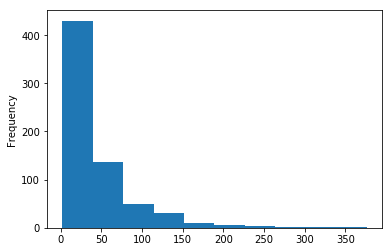

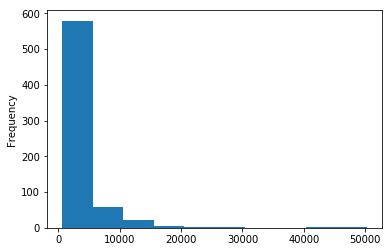

In [52]:
import matplotlib.pyplot as plt

table.cell_count.plot(kind='hist')
plt.show()
table.mean_size.plot(kind='hist')
plt.show()

In [24]:
g_train[0],g_train[1]

('../data/stage1_train/2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb5acb7fb352f7030063/images/2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb5acb7fb352f7030063.png',
 '../data/stage1_train/2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb5acb7fb352f7030063/masks/d290821c47f4f5300ce0d16062ce59ce28d7e9aaa9f758b6667d552757135066.png')

## View images

# EDA + cluster + preprocess

Plan
1. **EDA**
    - Cluster images by colour
    - Look through basic resolutions / clusters
    
2. **Pipeline**
    - Scale preprocessing
    - Augmentations
    - Freeze / unfreeze
    - Fill holes in the masks
    
3. **Model search options** 
    - All LinkNet / Unet based models with heavier decoder
    - GCN
    - Inverse for black images
    - Try feeding several channels
    - Do / not do rescaling



In [2]:
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage import color
import tqdm

In [ ]:
# read images and meta-data to the dataframe
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage import color
import tqdm
from sklearn.cluster import KMeans

TRAIN_DIR = '../data/stage1_train'
TEST_DIR = '../data/stage1_test'

g_train = list(glob.glob(TRAIN_DIR+'/**/*.*', recursive=True))
g_test = list(glob.glob(TEST_DIR+'/**/*.*', recursive=True)) 

train_samples = [(path.split('/')[3]) for path in g_train]
test_samples = [(path.split('/')[3]) for path in g_test]
train_type = [(path.split('/')[4]) for path in g_train]
train_imgs = [(path.split('/')[5]) for path in g_train]

train_df = pd.DataFrame()
train_df['path'] = g_train
train_df['sample'] = train_samples
train_df['type'] = train_type
train_df['img'] = train_imgs

train_df['img_array_rgb'] = np.nan
train_df['img_array_hsv'] = np.nan
train_df['mask_array'] = np.nan
train_df['train_mask'] = np.nan
train_df['width'] = 0
train_df['heigth'] = 0

train_img_paths = train_df[train_df.type == 'images'].path.values
train_mask_paths = train_df[train_df.type == 'masks'].path.values
train_img_samples = list(train_df['sample'].unique())

# read all images and masks into the dataframe
with tqdm.tqdm(total=len(train_img_paths)) as pbar:
    for i,img_path in enumerate(train_img_paths):
        # use only 3 channels of png images
        idx = train_df.loc[train_df.path == img_path].index.values[0]
        img = imread(img_path)[:,:,0:3]
        hsv_img = color.rgb2hsv(imread(img_path)[:,:,0:3])
        
        # a small hack - pass a pd.Series instead of list because of indexing issues
        train_df.loc[train_df.path == img_path,'img_array_rgb'] = pd.Series(data=[img], index=[idx])
        train_df.loc[train_df.path == img_path,'img_array_hsv'] = pd.Series(data=[hsv_img], index=[idx])
        pbar.update(1)

# read all the masks        
with tqdm.tqdm(total=len(train_mask_paths)) as pbar:
    for i,mask_path in enumerate(train_mask_paths):
        idx = train_df.loc[train_df.path == mask_path].index.values[0]
        mask = imread(mask_path)
        
        train_df.loc[train_df.path == mask_path,'mask_array'] = pd.Series(data=[mask], index=[idx])
        pbar.update(1)
        
# create simple masks for semseg networks
with tqdm.tqdm(total=len(train_img_samples)) as pbar:
    for i,img_sample in enumerate(train_img_samples):
        idx = train_df[(train_df['sample'] == img_sample)
                       & (train_df.type == 'images')].index.values[0]
        
        mask_list = list(train_df[(train_df['sample'] == img_sample)
                                  & (train_df.type == 'masks')].mask_array.values)

        train_mask = np.sum(np.stack(mask_list, 0), 0)/255.0

        # a small hack - pass a pd.Series instead of list because of indexing issues
        train_df.loc[(train_df['sample'] == img_sample)
                     & (train_df.type == 'images'),'train_mask'] = pd.Series(data=[train_mask], index=[idx])

        pbar.update(1)       

# drop the nuclei        
train_df = train_df[train_df.type == 'images']

def get_dominant_colors(img, top_colors=1):
    """Return dominant image color"""
    img_l = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    clt = KMeans(n_clusters = top_colors)
    clt.fit(img_l)
    return clt.cluster_centers_

dominant_hsv = []
    
# cluster images by their colour
with tqdm.tqdm(total=len(train_img_samples)) as pbar:
    for i,img_sample in enumerate(train_img_samples):
        cluster_centers = get_dominant_colors(train_df[train_df['sample']==img_sample].img_array_hsv.values[0], top_colors=1)
        dominant_hsv.append(cluster_centers.squeeze())
        pbar.update(1)                  
        
kmeans_final_cluster = KMeans(n_clusters=3).fit(dominant_hsv)
clusters = kmeans_final_cluster.predict(dominant_hsv)
train_df['cluster'] = clusters

del train_df['img_array_hsv'],train_df['mask_array']

del train_df['img_array_rgb']
del train_df['train_mask']

 10%|▉         | 65/670 [00:03<00:36, 16.79it/s]

In [5]:
train_df = train_df[train_df.type == 'images']

In [7]:
train_df.to_pickle('../data/train_df_stage1')

In [3]:
train_df = pd.read_pickle('../data/train_df_stage1')
train_img_samples = list(train_df['sample'].unique())

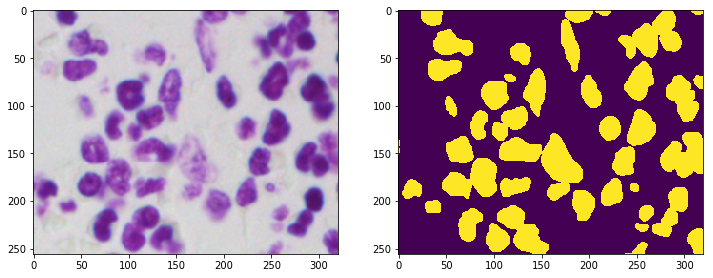

In [21]:
import matplotlib.pyplot as plt
import random

idx = 444

fig=plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)

plt.imshow(train_df[(train_df['sample'] == train_img_samples[idx])
                       & (train_df.type == 'images')].img_array_rgb.values[0])

fig.add_subplot(1, 2, 2)
plt.imshow(train_df[(train_df['sample'] == train_img_samples[idx])
                       & (train_df.type == 'images')].train_mask.values[0])

plt.show()


In [9]:
train_df.columns

Index(['path', 'sample', 'type', 'img', 'img_array_rgb', 'img_array_hsv',
       'mask_array', 'train_mask', 'width', 'heigth'],
      dtype='object')

In [5]:
train_df['width'] = train_df['img_array_rgb'].apply(lambda x: x.shape[0])
train_df['heigth'] = train_df['img_array_rgb'].apply(lambda x: x.shape[1])
train_df['w_h'] = train_df['width'].astype(str) + 'x' + train_df['heigth'].astype(str)

In [8]:
from sklearn.cluster import KMeans

def get_dominant_colors(img, top_colors=1):
    """Return dominant image color"""
    img_l = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    clt = KMeans(n_clusters = top_colors)
    clt.fit(img_l)
    return clt.cluster_centers_

dominant_hsv = []
    
# cluster images by their colour
with tqdm.tqdm(total=len(train_img_samples)) as pbar:
    for i,img_sample in enumerate(train_img_samples):
        cluster_centers = get_dominant_colors(train_df[train_df['sample']==img_sample].img_array_hsv.values[0], top_colors=1)
        dominant_hsv.append(cluster_centers.squeeze())
        pbar.update(1)  
        
kmeans_final_cluster = KMeans(n_clusters=3).fit(dominant_hsv)
clusters = kmeans_final_cluster.predict(dominant_hsv)
train_df['cluster'] = clusters   

del train_df['img_array_hsv'],train_df['mask_array']

100%|██████████| 670/670 [04:41<00:00,  2.84it/s]


In [17]:
train_df.to_pickle('../data/train_df_stage1')

In [16]:
train_df.head(n=1)

path  \
0  ../data/stage1_train/2dd9d8c797fc695665326fc8f...   

                                              sample    type  \
0  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...  images   

                                                 img  \
0  2dd9d8c797fc695665326fc8fd0eb5cd292139fa478ccb...   

                                       img_array_rgb  \
0  [[[14, 14, 14], [14, 14, 14], [15, 15, 15], [1...   

                                          train_mask  width  heigth      w_h  \
0  [[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...    256     256  256x256   

   cluster  
0        0

In [62]:
86*16

1376

In [61]:
1388/16

86.75

In [38]:
train_df['w_h'].value_counts()

256x256      334
256x320      112
520x696       92
360x360       91
1024x1024     16
512x640       13
603x1272       6
260x347        5
1040x1388      1
Name: w_h, dtype: int64

In [68]:
train_df.columns

Index(['path', 'sample', 'type', 'img', 'img_array_rgb', 'img_array_hsv',
       'mask_array', 'train_mask', 'width', 'heigth', 'w_h'],
      dtype='object')

100%|██████████| 670/670 [04:37<00:00,  2.84it/s]


'bf4a61bb81589c9a67e3343408befd3e135af5e88b50c17f998f2131d24bc271'

In [221]:
from PIL import Image
import matplotlib.pyplot as plt

def image_table(picked_items, cols=8, rows=4, width  = 1600, height = 800):
    thumbnail_width  = width //cols
    thumbnail_height = height//rows
    size = thumbnail_width, thumbnail_height
    if len(picked_items[0].shape) == 3:
        collage = Image.new('RGB', (width, height))
    else:
        collage = Image.new('P', (width, height))
    ims = []
    for image in picked_items:
        # im = Image.open(image)
        if len(picked_items[0].shape) == 3:
            im = Image.fromarray(image)
        else:
            im = Image.fromarray(image * 255)
        im.thumbnail(size)
        ims.append(im)
    i = 0
    x = 0
    y = 0
    for col in range(cols):
        for row in range(rows):
            collage.paste(ims[i], (x, y))
            i += 1
            y += thumbnail_height
        x += thumbnail_width
        y = 0
    return collage

3

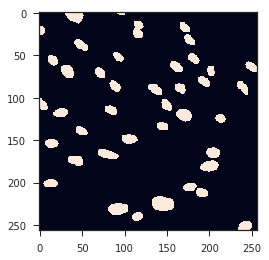

In [204]:
plt.imshow(picked_items_masks[0])
plt.show()

In [195]:
train_df[train_df.cluster == 0].sample(n=4*4).img_array_rgb.values

(16,)

In [202]:
len(picked_items_masks)

16

In [218]:
np.asarray(collage, dtype=np.uint8).max()

1

/opt/conda/lib/python3.5/site-packages/skimage/exposure/exposure.py:63: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  warn("This might be a color image. The histogram will be "
/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


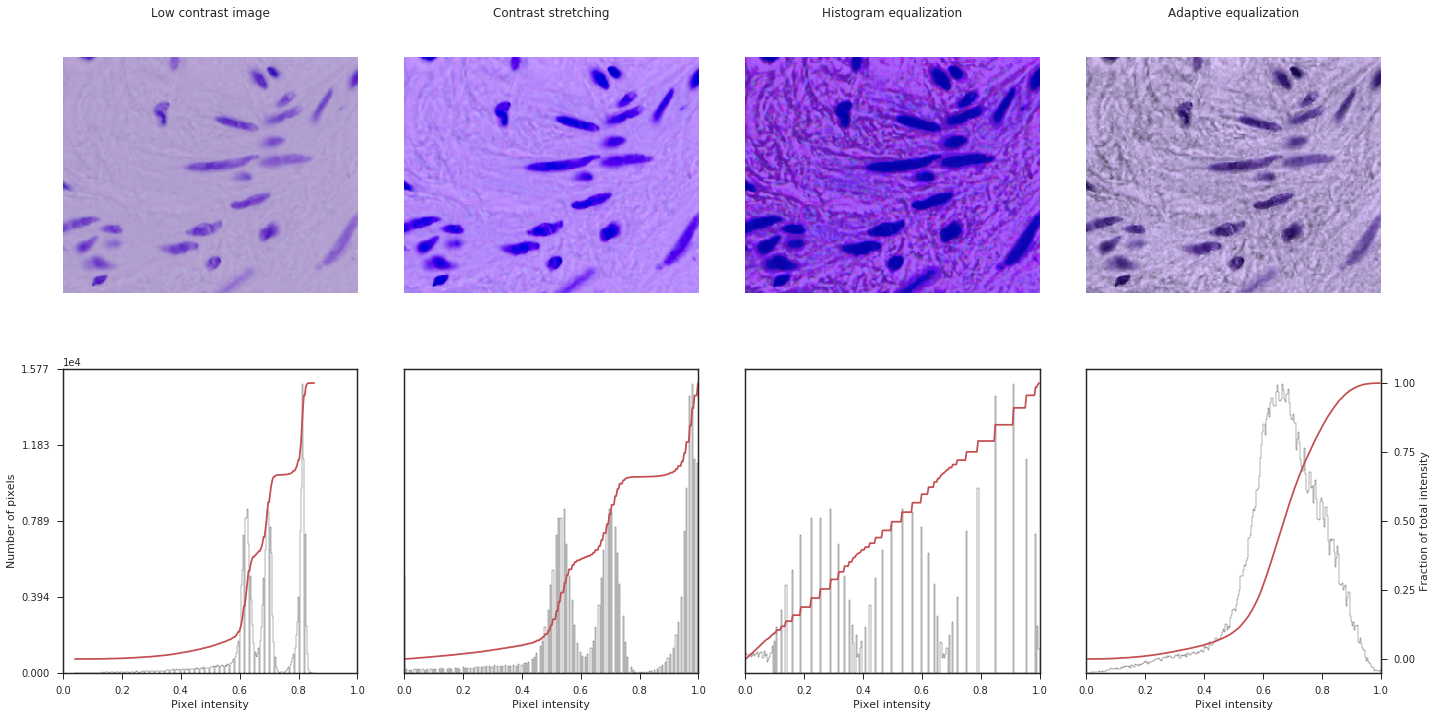

In [284]:
# equalization
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure

matplotlib.rcParams['font.size'] = 8


def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf

cluster = 1
# Load an example image
img = train_df[train_df.cluster == cluster].sample(n=1).img_array_rgb.values[0]

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(20, 10))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()

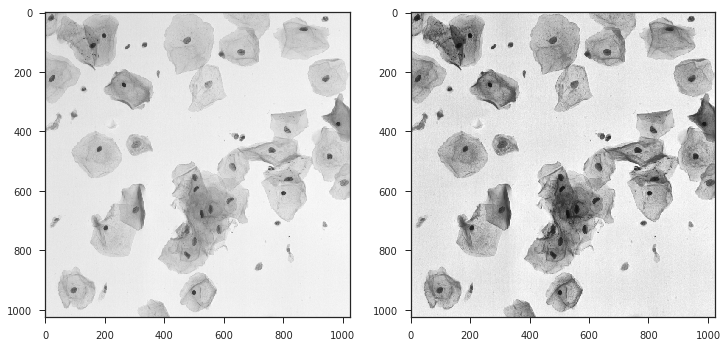

In [322]:
import cv2

cluster = 2
# Load an example image
im = train_df[train_df.cluster == cluster].sample(n=1).img_array_rgb.values[0]

clipLimit=2.0
tileGridSize=(8, 8)        
        
img_yuv = cv2.cvtColor(im, cv2.COLOR_RGB2YUV)
clahe = cv2.createCLAHE(clipLimit=clipLimit, tileGridSize=tileGridSize)
img_yuv[:, :, 0] = clahe.apply(img_yuv[:, :, 0])
img_output = cv2.cvtColor(img_yuv, cv2.COLOR_YUV2RGB)


fig=plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
plt.imshow(im)
fig.add_subplot(1, 2, 2)
plt.imshow(img_output)
plt.show()

Cluster size is 16


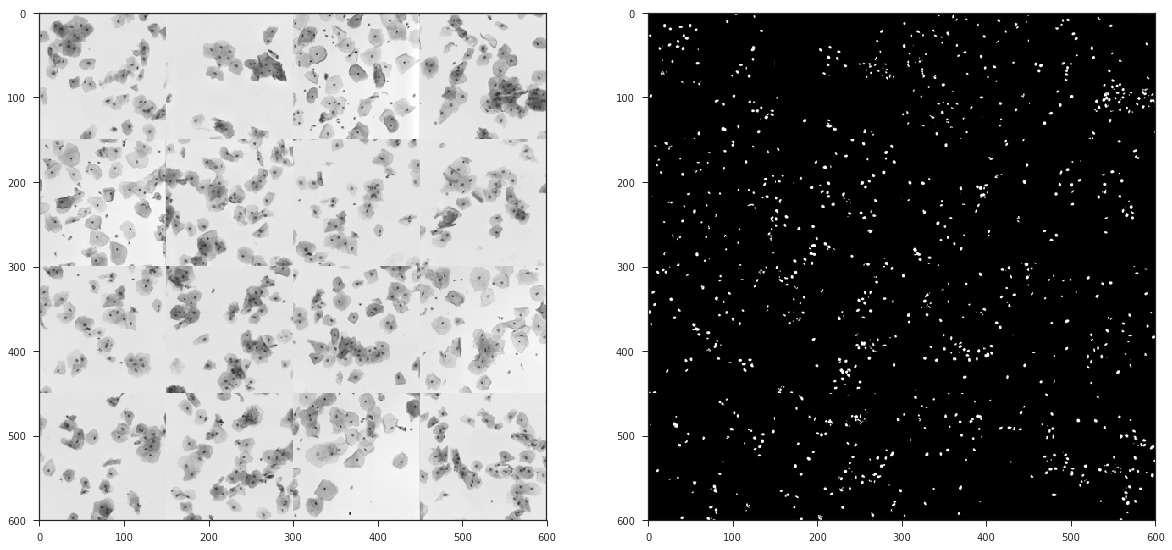

In [333]:
# show clusters
cluster = 2
sample_df = train_df[train_df.cluster == cluster].sample(n=4*4)
picked_items_imgs = list(sample_df.img_array_rgb.values)
picked_items_masks = list(sample_df.train_mask.values)

print('Cluster size is {}'.format(train_df[train_df.cluster == cluster].shape[0]))

fig=plt.figure(figsize=(20, 16))
fig.add_subplot(1, 2, 1)
collage = image_table(picked_items_imgs, cols=4, rows=4, width  = 600, height = 600)
plt.imshow(collage)
fig.add_subplot(1, 2, 2)
collage_mask = image_table(picked_items_masks, cols=4, rows=4, width  = 600, height = 600)
plt.imshow(collage_mask)
plt.show()

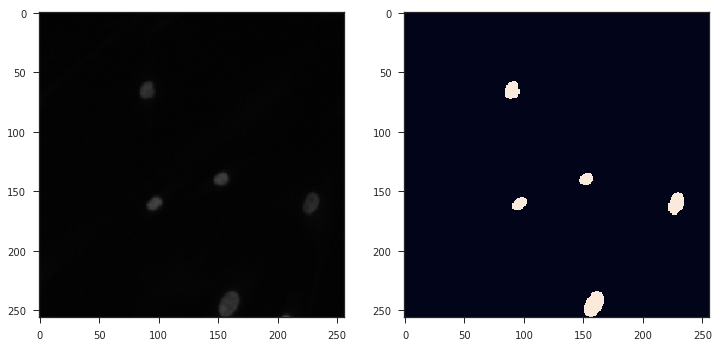

In [174]:
sample_value = train_df[train_df.cluster == 0].sample(n=1)['sample'].values[0]

fig=plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)

plt.imshow(train_df[(train_df['sample'] == sample_value)
                       & (train_df.type == 'images')].img_array_rgb.values[0])

fig.add_subplot(1, 2, 2)
plt.imshow(train_df[(train_df['sample'] == sample_value)
                       & (train_df.type == 'images')].train_mask.values[0])

plt.show()


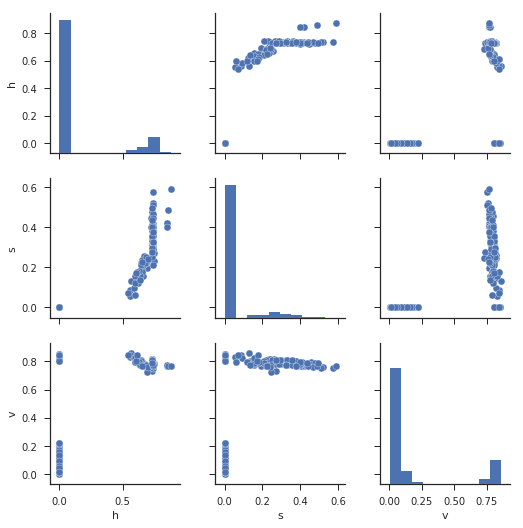

In [99]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)

cluster_df = pd.DataFrame(data=dominant_hsv,columns=['h','s','v'])
g = sns.pairplot(cluster_df)
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(dominant_hsv)

In [65]:
    print('Calculating dominant hsv for each image')
    dominant_hsv = []
    for img in tqdm.tqdm(x_hsv):
        res1, res2 = get_domimant_colors(img,top_colors=1)
        dominant_hsv.append(res1.squeeze())
    print('Calculating clusters')
    kmeans = KMeans(n_clusters=3).fit(dominant_hsv)
    train_df['HSV_CLUSTER'] = kmeans.predict(dominant_hsv[:len(x_train_hsv)])
    test_df['HSV_CLUSTER'] = kmeans.predict(dominant_hsv[len(x_train_hsv):])
    print('Images clustered')

0

In [89]:
train_df.loc[(train_df['sample'] == img_sample)
             & (train_df.type == 'images'),'train_mask'] 

30120    NaN
Name: train_mask, dtype: object

In [85]:
train_img_samples[-1]

'139946af9e2c7ef4f0298e622b831dbef5e5c0cd088eb5bc3382f8df9355443d'

In [ ]:
# Global constants.


IMG_DIR_NAME = 'images'   # Folder name including the image
MASK_DIR_NAME = 'masks'   # Folder name including the masks
    

# Display working/train/test directories.
print('TRAIN_DIR = {}'.format(TRAIN_DIR))
print('TEST_DIR = {}'.format(TEST_DIR))

In [ ]:
# Import necessary modules and set global constants and variables. 
     
import pandas as pd                 
import numpy as np                                       
from sklearn.cluster import KMeans
from scipy.ndimage.morphology import binary_fill_holes
import cv2                         # To read and manipulate images
import os                          # For filepath, directory handling
import sys                         # System-specific parameters and functions
import tqdm                        # Use smart progress meter
import seaborn as sns              # For pairplots
import matplotlib.pyplot as plt    # Python 2D plotting library
import matplotlib.cm as cm         # Color map
%matplotlib inline 

In [ ]:
# Collection of methods for data operations. Implemented are functions to read  
# images/masks from files and to read basic properties of the train/test data sets.

def read_image(filepath, color_mode=cv2.IMREAD_COLOR, target_size=None,space='bgr'):
    """Read an image from a file and resize it."""
    img = cv2.imread(filepath, color_mode)
    if target_size: 
        img = cv2.resize(img, target_size, interpolation = cv2.INTER_AREA)
    if space == 'hsv':
        img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    return img

def read_train_data_properties(train_dir, img_dir_name, mask_dir_name):
    """Read basic properties of training images and masks"""
    tmp = []
    for i,dir_name in enumerate(next(os.walk(train_dir))[1]):

        img_dir = os.path.join(train_dir, dir_name, img_dir_name)
        mask_dir = os.path.join(train_dir, dir_name, mask_dir_name) 
        num_masks = len(next(os.walk(mask_dir))[2])
        img_name = next(os.walk(img_dir))[2][0]
        img_name_id = os.path.splitext(img_name)[0]
        img_path = os.path.join(img_dir, img_name)
        mask_path = os.path.join(train_dir,dir_name,FULL_MASK_DIR_NAME,img_name_id+'_mask.png')
        img_shape = read_image(img_path).shape
        tmp.append(['{}'.format(img_name_id), img_shape[0], img_shape[1],
                    img_shape[0]/img_shape[1], img_shape[2], num_masks,
                    img_path, mask_dir,mask_path])

    train_df = pd.DataFrame(tmp, columns = ['img_id', 'img_height', 'img_width',
                                            'img_ratio', 'num_channels', 
                                            'num_masks', 'image_path', 'mask_dir','mask_path'])
    return train_df


def read_test_data_properties(test_dir, img_dir_name):
    """Read basic properties of test images."""
    tmp = []
    for i,dir_name in enumerate(next(os.walk(test_dir))[1]):

        img_dir = os.path.join(test_dir, dir_name, img_dir_name)
        img_name = next(os.walk(img_dir))[2][0]
        img_name_id = os.path.splitext(img_name)[0]
        img_path = os.path.join(img_dir, img_name)
        img_shape = read_image(img_path).shape
        tmp.append(['{}'.format(img_name_id), img_shape[0], img_shape[1],
                    img_shape[0]/img_shape[1], img_shape[2], img_path])

    test_df = pd.DataFrame(tmp, columns = ['img_id', 'img_height', 'img_width',
                                           'img_ratio', 'num_channels', 'image_path'])
    return test_df

def load_raw_data(image_size=(256, 256), space = 'bgr',load_mask=True):
    """Load raw data."""
    # Python lists to store the training images/masks and test images.
    x_train, y_train, x_test = [],[],[]

    # Read and resize train images/masks. 
    print('Loading and resizing train images and masks ...')
    sys.stdout.flush()
    for i, filename in tqdm.tqdm(enumerate(train_df['image_path']), total=len(train_df)):
        img = read_image(train_df['image_path'].loc[i], target_size=image_size,space = space)
        if load_mask:
            mask = read_image(train_df['mask_path'].loc[i],
                              color_mode=cv2.IMREAD_GRAYSCALE,
                              target_size=image_size)
            #mask = read_mask(train_df['mask_dir'].loc[i], target_size=image_size)
            y_train.append(mask)
        x_train.append(img)
        
    # Read and resize test images. 
    print('Loading and resizing test images ...')
    sys.stdout.flush()
    for i, filename in tqdm.tqdm(enumerate(test_df['image_path']), total=len(test_df)):
        img = read_image(test_df['image_path'].loc[i], target_size=image_size,space=space)
        x_test.append(img)

    # Transform lists into 4-dim numpy arrays.
    x_train = np.array(x_train)
    #if load_mask:
    y_train = np.array(y_train)
    #y_train = np.expand_dims(np.array(y_train), axis=4)
    x_test = np.array(x_test)
    print('Data loaded')
    if load_mask:
        return x_train, y_train, x_test
    else:
        return x_train, x_test

def get_domimant_colors(img, top_colors=1):
    """Return dominant image color"""
    img_l = img.reshape((img.shape[0] * img.shape[1], img.shape[2]))
    clt = KMeans(n_clusters = top_colors)
    clt.fit(img_l)
    # grab the number of different clusters and create a histogram
    # based on the number of pixels assigned to each cluster
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins = numLabels)
    # normalize the histogram, such that it sums to one
    hist = hist.astype("float")
    hist /= hist.sum()
    return clt.cluster_centers_, hist

def cluster_images_by_hsv():
    """Clusterization based on hsv colors. Adds 'hsv_cluster' column to tables"""
    print('Loading data')
    x_train_hsv,x_test_hsv = load_raw_data(image_size=None,space='hsv',load_mask=False)
    x_hsv = np.concatenate([x_train_hsv,x_test_hsv])
    print('Calculating dominant hsv for each image')
    dominant_hsv = []
    for img in tqdm.tqdm(x_hsv):
        res1, res2 = get_domimant_colors(img,top_colors=1)
        dominant_hsv.append(res1.squeeze())
    print('Calculating clusters')
    kmeans = KMeans(n_clusters=3).fit(dominant_hsv)
    train_df['HSV_CLUSTER'] = kmeans.predict(dominant_hsv[:len(x_train_hsv)])
    test_df['HSV_CLUSTER'] = kmeans.predict(dominant_hsv[len(x_train_hsv):])
    print('Images clustered')
    return None

def plot_images(selected_images_df,images_rows=4,images_cols=8,plot_figsize=4):
    """Plot image_rows*image_cols of selected images. Used to visualy check clusterization"""
    f, axarr = plt.subplots(images_rows,images_cols,figsize=(plot_figsize*images_cols,images_rows*plot_figsize))
    for row in range(images_rows):
        for col in range(images_cols):
            if (row*images_cols + col) < selected_images_df.shape[0]:
                image_path = selected_images_df['image_path'].iloc[row*images_cols + col]
            else:
                continue
            img = read_image(image_path)
            height, width, l = img.shape
            ax = axarr[row,col]
            ax.axis('off')
            ax.set_title("%dx%d"%(width, height))
            ax.imshow(img)

# Test models on various resolutions

In [26]:
# standard pytorch imports
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

# basic models
from models.LinkNet import LinkNet34,LinkNet50,LinkNeXt
# inception based models
from models.LinkNet import LinkInceptionResNet,LinkCeption
# heavier models
from models.LinkNet import ResNet34Unet
from models.VggUNet import UNet11
from models.GCN import FCN

In [ ]:
resolutions = [[256,256],[256,320],[1024,1024],[512,640],[288,352],[544,704],[384,384],[608,1280],[1056,1376]] 
model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':1}],
}

for model_name in ['linkception']:
    print('Testing model {}'.format(model_name))
    model = model_params[model_name][0](**model_params[model_name][1])

    for resolution in resolutions:
        inputs = torch.autograd.Variable(torch.randn(1,3,resolution[0],resolution[1]))
        out = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))

In [ ]:
# resize all images to the same size
resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    # resolutions non-divisible by 16
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],
    '603x1272':[[603,1272],[608,1280]],
    '1040x1388':[[1040,1388],[1056,1376]],    
}

In [2]:
resolutions = [[256,256],[256,320],[1024,1024],[512,640],[288,352],[544,704],[384,384],[608,1280],[1056,1376]] 
model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkCeption,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'linkceptionresnet': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':1}],
}

for model_name in ['gcn50']:
    print('Testing model {}'.format(model_name))
    model = model_params[model_name][0](**model_params[model_name][1])

    for resolution in resolutions:
        inputs = torch.autograd.Variable(torch.randn(1,3,resolution[0],resolution[1]))
        out, fs4, fs3, fs2, fs1, gcfm1 = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))

Testing model gcn50
torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 


In [9]:
out.size(),fs4.size(),fs3.size(),fs2.size(),fs1.size(),gcfm1.size()

(torch.Size([1, 1, 1056, 1376]),
 torch.Size([1, 1, 528, 688]),
 torch.Size([1, 1, 264, 344]),
 torch.Size([1, 1, 132, 172]),
 torch.Size([1, 1, 66, 86]),
 torch.Size([1, 1, 33, 43]))

In [ ]:
out, fs4, fs3, fs2, fs1, gcfm1

In [2]:
resolutions = [[256,256],[256,320],[1024,1024],[512,640],[288,352],[544,704],[384,384],[608,1280],[1056,1376]] 
model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'linkceptionresnet': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':1}],
}

for model_name in ['resunet34']:
    print('Testing model {}'.format(model_name))
    model = model_params[model_name][0](**model_params[model_name][1])

    for resolution in resolutions:
        inputs = torch.autograd.Variable(torch.randn(1,3,resolution[0],resolution[1]))
        out = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))

Testing model resunet34
torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 


In [ ]:
unet11
linknet34
linknet50
linknext
linkception
linkceptionresnet
resunet34
gcn50

In [2]:
model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkCeption,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'linkceptionresnet': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':1}],
}

model_name = 'gcn50'
model = model_params[model_name][0](**model_params[model_name][1])

In [3]:
model.require_encoder_grad(False)

In [6]:
model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':1}],
}

for model_name in ['unet11','linknet34','linknet50','linknext','linkception','resunet34']:
    print('Testing model {}'.format(model_name))
    model = model_params[model_name][0](**model_params[model_name][1])

    for resolution in resolutions:
        inputs = torch.autograd.Variable(torch.randn(1,3,resolution[0],resolution[1]))
        out = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))


Testing model unet11
torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 
Testing model linknet34
torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size(

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /home/keras/.torch/models/resnet50-19c8e357.pth
100%|██████████| 102502400/102502400 [00:14<00:00, 6957621.76it/s]


torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 
Testing model linknext


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/resnext101_32x4d-29e315fa.pth" to /home/keras/.torch/models/resnext101_32x4d-29e315fa.pth
100%|██████████| 177332805/177332805 [01:23<00:00, 2120604.20it/s]


torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 
Testing model linkception


Downloading: "http://data.lip6.fr/cadene/pretrainedmodels/inceptionresnetv2-520b38e4.pth" to /home/keras/.torch/models/inceptionresnetv2-520b38e4.pth
100%|██████████| 223774246/223774246 [01:33<00:00, 2392854.57it/s]


RuntimeError: The size of tensor a (8) must match the size of tensor b (14) at non-singleton dimension 3

In [1]:
# standard pytorch imports
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.distributed as dist
import torch.optim
import torch.utils.data
import torch.utils.data.distributed
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

#============ Basic models ============#
from models.LinkNet import LinkNet34,LinkNet50,LinkNeXt

#============ Inception based models ============#
from models.LinkNet import LinkInceptionResNet,LinkCeption

#============ Heavier models ============#
from models.LinkNet import ResNet34Unet
from models.VggUNet import UNet11
from models.GCN import FCN
from models.TernausNet import AlbuNet,UNet16

In [2]:
from utils.BDataset import resolution_dict

In [2]:
model_presets = {
    # no deconv option
    'unet11_3' : [UNet11,{'num_classes':3,'num_channels':3}],
    
    'albunet_3' : [AlbuNet,{'num_classes':3,'is_deconv':False,'pretrained':True,'num_filters':32}],
    'unet16_3' : [UNet16,{'num_classes':3,'is_deconv':False,'pretrained':True,'num_filters':32}],
    'linknet50_3': [LinkNet50,{'num_classes':3,'num_channels':3,'is_deconv':False,'decoder_kernel_size':3,}],
    'resunet34_3': [ResNet34Unet,{'num_classes':3,'num_channels':3,'is_deconv':False,'decoder_kernel_size':3,}],    

    'unet16_3_dc' : [UNet16,{'num_classes':3,'is_deconv':True,'pretrained':True,'num_filters':32}],    
    'albunet_3_dc' : [AlbuNet,{'num_classes':3,'is_deconv':True,'pretrained':True,'num_filters':32}],
    'unet11_3_dc' : [UNet11,{'num_classes':3,'num_channels':3,'is_deconv':True}],
    'linknet50_3_dc': [LinkNet50,{'num_classes':3,'num_channels':3,'is_deconv':True,'decoder_kernel_size':3,}],
    'resunet34_3_dc': [ResNet34Unet,{'num_classes':3,'num_channels':3,'is_deconv':True,'decoder_kernel_size':3,}],     
}



In [3]:
resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],

    # additional test resolutions    
    '512x680':[[512,680],[544,704]], 
    '519x253':[[519,253],[544,256]],     
    '524x348':[[524,348],[544,352]],  
    '520x348':[[520,348],[544,352]],
    '519x162':[[519,162],[544,160]],
    '519x161':[[519,161],[544,160]],
    '390x239':[[390,239],[416,256]],          
}

In [8]:
544/64

8.5

In [17]:
import random

lst = [1,2,3]

lst = random.shuffle(lst)

lst

In [4]:
for model_name in ['albunet_3_dc',
                   'unet16_3_dc',
                   'unet11_3_dc',
                   'linknet50_3_dc',
                   'resunet34_3_dc']:
    
    print('Testing model {}'.format(model_name))
    model = model_presets[model_name][0](**model_presets[model_name][1])
    model.cuda()

    for key,value in resolution_dict.items():
        inputs = torch.autograd.Variable(torch.randn(1,3,value[1][0],value[1][1])).cuda()
        out = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))
        torch.cuda.empty_cache()
        


Testing model unet16_3
torch.Size([1, 3, 256, 320]) => torch.Size([1, 3, 256, 320]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 3, 384, 384]) 
torch.Size([1, 3, 544, 160]) => torch.Size([1, 3, 544, 160]) 
torch.Size([1, 3, 544, 160]) => torch.Size([1, 3, 544, 160]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 3, 512, 640]) 
torch.Size([1, 3, 544, 352]) => torch.Size([1, 3, 544, 352]) 
torch.Size([1, 3, 416, 256]) => torch.Size([1, 3, 416, 256]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 3, 544, 704]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 3, 544, 704]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 3, 1024, 1024]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 3, 288, 352]) 
torch.Size([1, 3, 544, 256]) => torch.Size([1, 3, 544, 256]) 
torch.Size([1, 3, 256, 256]) => torch.Size([1, 3, 256, 256]) 
torch.Size([1, 3, 544, 352]) => torch.Size([1, 3, 544, 352]) 
Testing model unet16_3_dc
torch.Size([1, 3, 256, 320]) => torch.Size([1, 3, 256, 320]) 
torch.Size([1, 3,

RuntimeError: inconsistent tensor sizes at /opt/conda/conda-bld/pytorch_1512383260527/work/torch/lib/THC/generic/THCTensorMath.cu:157

In [2]:
model_params = {
    'linkception': [LinkCeption,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'linkceptionresnet': [LinkInceptionResNet,{'num_classes':1,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
}
resolutions = [[256,256],[256,320],[1024,1024],[512,640],[288,352],[544,704],[384,384],[608,1280],[1056,1376]] 

for model_name in ['linkceptionresnet']:
    print('Testing model {}'.format(model_name))
    model = model_params[model_name][0](**model_params[model_name][1])

    for resolution in resolutions:
        inputs = torch.autograd.Variable(torch.randn(1,3,resolution[0],resolution[1]))
        out = model(inputs)
        print ('{} => {} '.format(inputs.size(), out.size()))


Testing model linkceptionresnet
torch.Size([1, 3, 256, 256]) => torch.Size([1, 1, 256, 256]) 
torch.Size([1, 3, 256, 320]) => torch.Size([1, 1, 256, 320]) 
torch.Size([1, 3, 1024, 1024]) => torch.Size([1, 1, 1024, 1024]) 
torch.Size([1, 3, 512, 640]) => torch.Size([1, 1, 512, 640]) 
torch.Size([1, 3, 288, 352]) => torch.Size([1, 1, 288, 352]) 
torch.Size([1, 3, 544, 704]) => torch.Size([1, 1, 544, 704]) 
torch.Size([1, 3, 384, 384]) => torch.Size([1, 1, 384, 384]) 
torch.Size([1, 3, 608, 1280]) => torch.Size([1, 1, 608, 1280]) 
torch.Size([1, 3, 1056, 1376]) => torch.Size([1, 1, 1056, 1376]) 


# Data loader

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

train_df = pd.read_pickle('../data/train_df_stage1')
train_df = train_df.reset_index()

In [269]:
# augs
from utils.RAugs import *

class BAugs(object):
    def __init__(self,
                 prob=0.5,
                 mean=(0.485, 0.456, 0.406),
                 std=(0.229, 0.224, 0.225)):
        self.prob = prob
        self.mean = mean
        self.std = std
    def __call__(self, img, mask, target_resl):
        return DualCompose([
            Resize(size=target_resl),
            # ImageOnly(Normalize(mean=self.mean, std=self.std)),
            ImageOnly(CLAHE()),
            OneOrOther(
                *(OneOf([
                    Distort1(distort_limit=0.05, shift_limit=0.05),
                    Distort2(num_steps=2, distort_limit=0.05)]),
                  ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.10, rotate_limit=45)), prob=self.prob),
            RandomFlip(prob=0.5),
            ImageOnly(RandomContrast(limit=0.2, prob=self.prob)),
            ImageOnly(RandomFilter(limit=0.5, prob=self.prob/2)),
        ])(img, mask)

train_augs = BAugs(prob=0.5,
                   mean=(0.485, 0.456, 0.406),
                   std=(0.229, 0.224, 0.225))    

In [281]:
train_dataset = BDataset(df = train_df,
                 transforms = train_augs,
                 fold_num = 0,
                 mode = 'train',
                 test_size = 0.25,
                 dset_resl = '1024x1024' 
                 )

In [49]:
import matplotlib.pyplot as plt

In [102]:
img.max()

-1.0936601

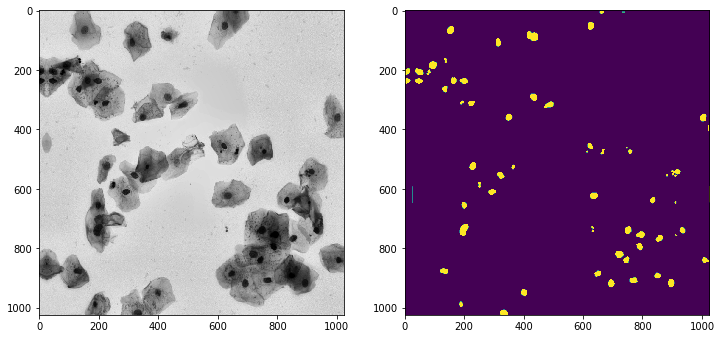

(1024, 1024, 3)


In [294]:
img, mask = train_dataset.__getitem__(10)

fig=plt.figure(figsize=(12, 6))
fig.add_subplot(1, 2, 1)
plt.imshow(img)

fig.add_subplot(1, 2, 2)
plt.imshow(mask)
plt.show()

print(img.shape)

In [51]:
img.shape, mask.shape

((256, 256, 3), (256, 256))

In [39]:
train_df.loc[1,'w_h']

'256x256'

In [61]:
train_df.w_h.value_counts()

256x256      334
256x320      112
520x696       92
360x360       91
1024x1024     16
512x640       13
603x1272       6
260x347        5
1040x1388      1
Name: w_h, dtype: int64

In [3]:
train_df = train_df.reset_index()

'256x256'

In [10]:
or_resl = resolution_dict[train_df.loc[1].w_h][0]
target_resl = resolution_dict[train_df.loc[1].w_h][0]

[256, 256]

In [8]:
resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],
    '603x1272':[[603,1272],[608,1280]],
    '1040x1388':[[1040,1388],[1056,1376]],    
}

Text(0.5,1,'Ground truth masks')

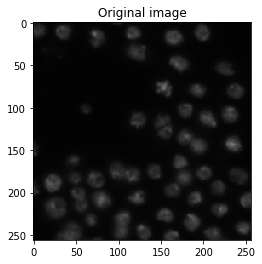

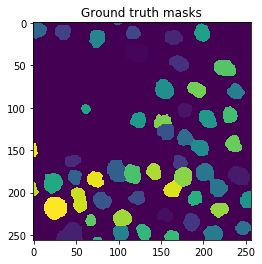

In [230]:
%matplotlib inline
import numpy as np
import skimage.io
import matplotlib.pyplot as plt
import skimage.segmentation
import glob
from skimage.io import imread_collection


g = glob.glob('../data/stage1_train/{}/masks/*.png'.format( train_df.loc[1]['sample']))
masks = imread_collection(g).concatenate()
gt = train_df.loc[1,'train_mask']
image = train_df.loc[1,'img_array_rgb']

height, width, _ = image.shape
num_masks = masks.shape[0]

# Make a ground truth label image (pixel value is index of object label)
labels = np.zeros((height, width), np.uint16)
for index in range(0, num_masks):
    labels[masks[index] > 0] = index + 1

# Show label image
fig = plt.figure()
plt.imshow(image)
plt.title("Original image")
fig = plt.figure()
plt.imshow(labels)
plt.title("Ground truth masks")



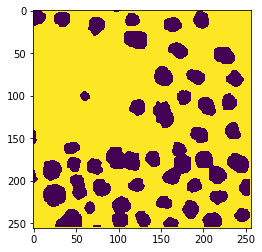

In [235]:
plt.imshow(y_pred==0)

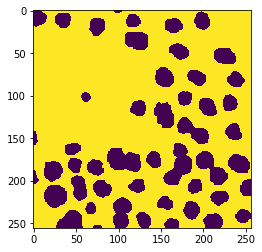

In [234]:
plt.imshow(labels==0)

/opt/conda/lib/python3.5/site-packages/skimage/segmentation/_join.py:118: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if not np.issubdtype(label_field.dtype, np.int):


Text(0.5,1,'Simulated imperfect submission')

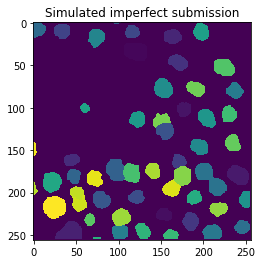

In [231]:
# Simulate an imperfect submission
offset = 1 # offset pixels
y_pred = labels[offset:, offset:]
y_pred = np.pad(y_pred, ((0, offset), (0, offset)), mode="constant")
y_pred[y_pred == 20] = 0 # Remove one object
y_pred, _, _ = skimage.segmentation.relabel_sequential(y_pred) # Relabel objects

# Show simulated predictions
fig = plt.figure()
plt.imshow(y_pred)
plt.title("Simulated imperfect submission")

In [47]:
true_objects = len(np.unique(labels))
pred_objects = len(np.unique(y_pred))
pred_objects

56

In [153]:
gt_masks.shape

(57, 1024, 1024)

In [155]:
np.unique(labels).shape 

(66,)

In [283]:
gt_masks.shape

(140, 520, 696)

Plotting gt nuclei boundaries


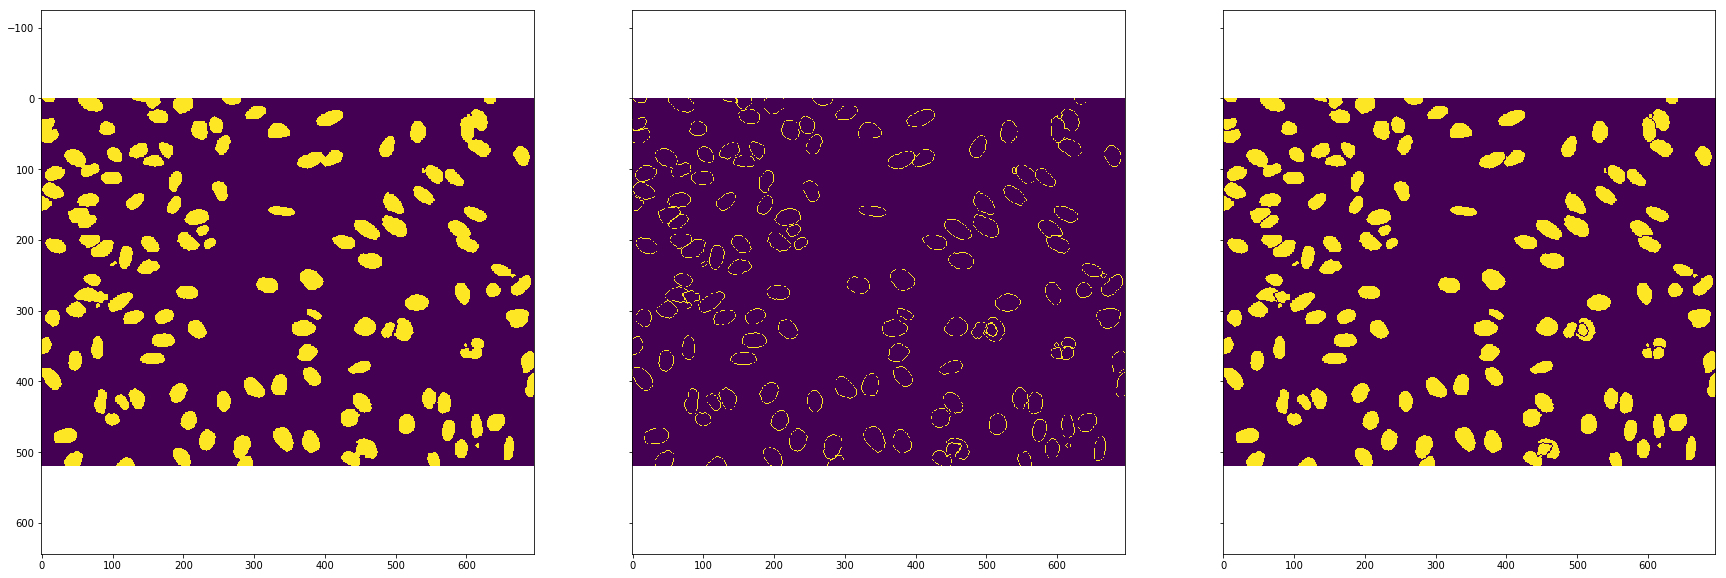

In [293]:
fig, axes = plt.subplots(ncols=3, figsize=(30, 10), sharex=True, sharey=True)
ax = axes.ravel()

gt_mask = np.sum(np.stack(gt_masks, 0), 0)/255.0
plt.figure(figsize=(10, 10))
ax[0].imshow(gt_mask)

gt_labels = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), np.uint16)
for index in range(0, gt_masks.shape[0]):
    gt_labels[gt_masks[index] > 0] = index + 1    

boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0)

print('Plotting gt nuclei boundaries')
plt.figure(figsize=(10, 10))
ax[1].imshow(boundaries)

gt_mask[boundaries] = 0
ax[2].imshow(gt_mask)
plt.show()

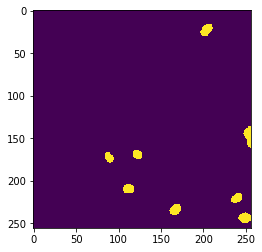

In [463]:
plt.imshow(gt_mask)

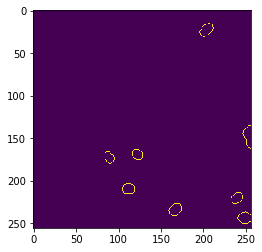

In [464]:
plt.imshow(boundaries)

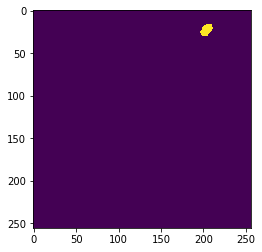

In [462]:
plt.imshow(gt_masks[0])

In [474]:
# approx bench of the plain wt algorithm 
from skimage.morphology import dilation
from skimage.morphology import square
from skimage.segmentation import find_boundaries
import tqdm

threshold = 0.5
# cluster = 2

idx_list = []
avg_precisions = []
gt_nuclei_counts = []
naive_wt_nuclei_counts = []
optimized_wt_nuclei_counts = []

# with tqdm.tqdm(total=len(train_df[train_df.cluster==cluster].index.values)) as pbar:
#     for idx in train_df[train_df.cluster==cluster].index.values:
with tqdm.tqdm(total=len(train_df.index.values)) as pbar:
    for idx in train_df.index.values:
        # idx = train_df[train_df.cluster==cluster].index.values[138]
        image = train_df.loc[idx,'img_array_rgb']
        # idx = 289

        g = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[idx]['sample']))
        gt_masks = imread_collection(g).concatenate()

        # this will sumulate the prediction mask
        # gt_mask = train_df.loc[idx,'train_mask']
        # simulate prediction wo border as if it comes out of the CNN

        gt_mask = np.sum(np.stack(gt_masks, 0), 0)/255.0
        gt_labels = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), np.uint16)
        for index in range(0, gt_masks.shape[0]):
            gt_labels[gt_masks[index] > 0] = index + 1    
        boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0)    
        gt_mask[boundaries] = 0

        # Do a dummy run of wt to estimate approx object size

        # Now we want to separate the two objects in image
        # Generate the markers as local maxima of the distance to the background
        distance = ndi.distance_transform_edt(gt_mask)
        local_maxi = peak_local_max(distance,
                                    indices=False,
                                    footprint=np.ones((5, 5)),
                                    labels=gt_mask)

        markers = ndi.label(local_maxi)[0]
        labels = watershed(-distance,
                           markers,
                           mask=gt_mask)


        gt_nuclei_count = gt_masks.shape[0]
        wt_nuclei_count_naive = np.unique(labels).shape[0]

        # rerun wt with a different footprint estimated from approx nuclei size

        wt_areas = []
        for i,label in enumerate(np.unique(labels)):
            if i == 0:
                # pass the background
                pass
            else:
                wt_areas.append((labels == label).sum())

        try:
            wt_radius = int(np.asarray(wt_areas).mean() ** 0.5 // 3)
        except:
            wt_radius = 3

        gt_mask = skimage.util.pad(array=gt_mask,pad_width=10,mode='constant')

        # Now we want to separate the two objects in image
        # Generate the markers as local maxima of the distance to the background
        distance = ndi.distance_transform_edt(gt_mask)
        local_maxi = peak_local_max(distance,
                                    indices=False,
                                    footprint=np.ones((wt_radius*2, wt_radius*2)),
                                    labels=gt_mask)

        markers = ndi.label(local_maxi)[0]
        labels = watershed(-distance,
                           markers,
                           mask=gt_mask)

        labels = labels[10:-10,10:-10]
        gt_mask = gt_mask[10:-10,10:-10]

        wt_nuclei_count_opt = np.unique(labels).shape[0]

        precs, avg_prec = calculate_ap(labels, gt_masks)

        avg_precisions.append(avg_prec)

        gt_nuclei_counts.append(gt_nuclei_count)
        naive_wt_nuclei_counts.append(wt_nuclei_count_naive)
        optimized_wt_nuclei_counts.append(wt_nuclei_count_opt)
        idx_list.append(idx)
        pbar.update(1)




 25%|██▍       | 166/670 [00:25<01:29,  5.65it/s]/opt/conda/lib/python3.5/site-packages/ipykernel_launcher.py:68: RuntimeWarning: Mean of empty slice.
/opt/conda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 670/670 [01:35<00:00,  6.99it/s]


In [586]:
# approx bench of the plain wt algorithm 
from skimage.morphology import dilation
from skimage.morphology import square
from skimage.segmentation import find_boundaries
import tqdm

threshold = 0.5
# cluster = 2

idx_list = []
avg_precisions = []
gt_nuclei_counts = []
naive_wt_nuclei_counts = []
optimized_wt_nuclei_counts = []

# with tqdm.tqdm(total=len(train_df[train_df.cluster==cluster].index.values)) as pbar:
#     for idx in train_df[train_df.cluster==cluster].index.values:
with tqdm.tqdm(total=len(train_df.index.values)) as pbar:
    for idx in train_df.index.values:
        # idx = train_df[train_df.cluster==cluster].index.values[138]
        image = train_df.loc[idx,'img_array_rgb']

        g = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[idx]['sample']))
        gt_masks = imread_collection(g).concatenate()

        # this will sumulate the prediction mask
        # gt_mask = train_df.loc[idx,'train_mask']
        # simulate prediction wo border as if it comes out of the CNN

        gt_mask = np.sum(np.stack(gt_masks, 0), 0)/255.0
        gt_labels = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), np.uint16)
        for index in range(0, gt_masks.shape[0]):
            gt_labels[gt_masks[index] > 0] = index + 1    
        boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0)    
        gt_mask[boundaries] = 0

        
        # simulate CNN output - nuclei centers
        nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in gt_masks]
        nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]

        nuclei_centers = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), dtype=bool)
        for coord in nuclei_centers_coord:
            nuclei_centers[coord[0],coord[1]] = True
            
    
        # Do a dummy run of wt to estimate approx object size

        # Now we want to separate the two objects in image
        # Generate the markers as local maxima of the distance to the background
        distance = ndi.distance_transform_edt(gt_mask)
        local_maxi = peak_local_max(distance,
                                    indices=False,
                                    footprint=np.ones((5, 5)),
                                    labels=gt_mask)

        markers = ndi.label(local_maxi)[0]
        labels = watershed(-distance,
                           markers,
                           mask=gt_mask)


        gt_nuclei_count = gt_masks.shape[0]
        wt_nuclei_count_naive = np.unique(labels).shape[0]

        # rerun wt with a different footprint estimated from approx nuclei size

        wt_areas = []
        for i,label in enumerate(np.unique(labels)):
            if i == 0:
                # pass the background
                pass
            else:
                wt_areas.append((labels == label).sum())

        try:
            wt_radius = int(np.asarray(wt_areas).max() ** 0.5 // 3)
        except:
            wt_radius = 3

        gt_mask = skimage.util.pad(array=gt_mask,pad_width=10,mode='constant')
        nuclei_centers = skimage.util.pad(array=nuclei_centers,pad_width=10,mode='constant',constant_values=[True])

        # Now we want to separate the two objects in image
        # Generate the markers as local maxima of the distance to the background
        distance = ndi.distance_transform_edt(gt_mask)
        local_maxi = peak_local_max(distance,
                                    indices=False,
                                    footprint=np.ones((wt_radius*2, wt_radius*2)),
                                    labels=gt_mask)

        markers = ndi.label(nuclei_centers)[0]
        # markers = ndi.label(local_maxi)[0]
        
        labels = watershed(-distance,
                           markers,
                           mask=gt_mask,
                          )

        labels = labels[10:-10,10:-10]
        gt_mask = gt_mask[10:-10,10:-10]

        wt_nuclei_count_opt = np.unique(labels).shape[0]

        precs, avg_prec = calculate_ap(labels, gt_masks)

        avg_precisions.append(avg_prec)

        gt_nuclei_counts.append(gt_nuclei_count)
        naive_wt_nuclei_counts.append(wt_nuclei_count_naive)
        optimized_wt_nuclei_counts.append(wt_nuclei_count_opt)
        idx_list.append(idx)
        pbar.update(1)

100%|██████████| 670/670 [02:11<00:00,  3.82it/s]


In [ ]:
multipliers = [1,2]
m_aps = [0,29,0.426542]

# w multiplier 2
thickness = ['outer','thick','inner']
m_aps = [0.426542,0.224762,0.224]

In [517]:
stat_df[stat_df.avg_precisions<0.4].shape

(68, 5)

In [485]:
# sample failure cases
stat_df[stat_df.avg_precisions<0.3].sample(n=1).idx.values[0]

45

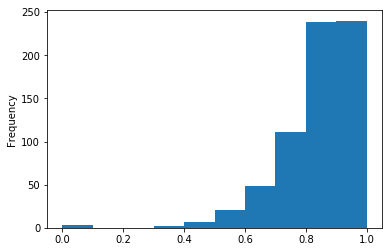

count    670.000000
mean       0.838634
std        0.127623
min        0.000000
25%        0.783815
50%        0.870203
75%        0.922411
max        1.000000
Name: avg_precisions, dtype: float64

In [587]:
# w nuclei center seed
stat_df = pd.DataFrame()
stat_df['idx'] = idx_list
stat_df['avg_precisions'] = avg_precisions
stat_df['gt_nuclei_counts'] = gt_nuclei_counts
stat_df['naive_wt_nuclei_counts'] = naive_wt_nuclei_counts
stat_df['optimized_wt_nuclei_counts'] = optimized_wt_nuclei_counts

stat_df.avg_precisions.plot(kind='hist')
plt.show()
stat_df.avg_precisions.describe()

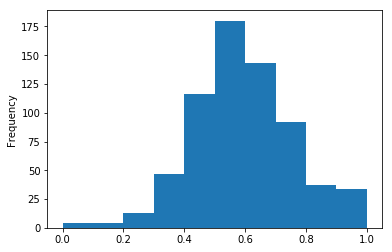

count    670.000000
mean       0.598103
std        0.168469
min        0.000000
25%        0.486556
50%        0.588586
75%        0.695605
max        1.000000
Name: avg_precisions, dtype: float64

In [515]:
# wo nuclei center seed
stat_df = pd.DataFrame()
stat_df['idx'] = idx_list
stat_df['avg_precisions'] = avg_precisions
stat_df['gt_nuclei_counts'] = gt_nuclei_counts
stat_df['naive_wt_nuclei_counts'] = naive_wt_nuclei_counts
stat_df['optimized_wt_nuclei_counts'] = optimized_wt_nuclei_counts

stat_df.avg_precisions.plot(kind='hist')
plt.show()
stat_df.avg_precisions.describe()

In [577]:
nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in gt_masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]

nuclei_centers = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), dtype=bool)
for coord in nuclei_centers_coord:
    nuclei_centers[coord[0],coord[1]] = True

In [ ]:
skimage.morphology.binary_erosion(image, selem=None, out=None)

In [32]:
import glob
import numpy as np

from scipy import ndimage as ndi
import matplotlib.pyplot as plt

import skimage
from skimage.morphology import square
from skimage.morphology import dilation
from skimage.morphology import watershed
from skimage.morphology import binary_erosion
from skimage.feature import peak_local_max
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries

def apply_wt_boundary_center(mask_pred=None,
                             nuclei_pred=None,
                             threshold = 0.5,
                             ):

    mask_pred[mask_pred < threshold] = 0
    nuclei_pred[nuclei_pred < threshold] = 0
    
    # Do a dummy run of wt to estimate approx object size

    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(mask_pred)
    local_maxi = peak_local_max(distance,
                                indices=False,
                                footprint=np.ones((5, 5)),
                                labels=mask_pred)

    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance,
                       markers,
                       mask=mask_pred)

    # Rerun wt with different footprint parameters estimated from approx nuclei size

    wt_areas = []
    for i,label in enumerate(np.unique(labels)):
        if i == 0:
            # pass the background
            pass
        else:
            wt_areas.append((labels == label).sum())
            
    # we assume that all the blobs are circular
    wt_radius = int(np.asarray(wt_areas).max() ** 0.5 // 3)

    # apply threshold
    nuclei_pred = binary_erosion(nuclei_pred, selem=None, out=None)
    
    # padding produces better result for objects located near the borders
    mask_pred = skimage.util.pad(array=mask_pred,pad_width=10,mode='constant')
    nuclei_pred = skimage.util.pad(array=nuclei_pred,pad_width=10,mode='constant',constant_values=[True])

    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(mask_pred)

    local_maxi = peak_local_max(distance,
                                indices=False,
                                footprint=np.ones((wt_radius*2, wt_radius*2)),
                                labels=mask_pred)

    # markers = ndi.label(local_maxi)[0]
    markers = ndi.label(nuclei_pred)[0]

    labels = watershed(-distance,
                       markers,
                       mask=mask_pred)

    labels = labels[10:-10,10:-10]
    
    return labels

def apply_wt_boundary(mask_pred=None,
                     threshold = 0.5,
                     ):
    mask_pred[mask_pred < threshold] = 0
    
    # Do a dummy run of wt to estimate approx object size

    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(mask_pred)
    local_maxi = peak_local_max(distance,
                                indices=False,
                                footprint=np.ones((5, 5)),
                                labels=mask_pred)

    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance,
                       markers,
                       mask=mask_pred)

    # Rerun wt with different footprint parameters estimated from approx nuclei size

    wt_areas = []
    for i,label in enumerate(np.unique(labels)):
        if i == 0:
            # pass the background
            pass
        else:
            wt_areas.append((labels == label).sum())
            
    # we assume that all the blobs are circular
    wt_radius = int(np.asarray(wt_areas).max() ** 0.5 // 3)

    
    # padding produces better result for objects located near the borders
    mask_pred = skimage.util.pad(array=mask_pred,pad_width=10,mode='constant')

    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(mask_pred)

    local_maxi = peak_local_max(distance,
                                indices=False,
                                footprint=np.ones((wt_radius*2, wt_radius*2)),
                                labels=mask_pred)

    markers = ndi.label(local_maxi)[0]

    labels = watershed(-distance,
                       markers,
                       mask=mask_pred)
    
    labels = labels[10:-10,10:-10]
        
    return labels

In [39]:
labels = apply_wt_boundary_center(mask_pred=gt_mask,
                         nuclei_pred=nuclei_centers,
                         threshold = 0.5,
                         )

labels2 = apply_wt_boundary(mask_pred=gt_mask,
                         threshold = 0.5,
                         )

In [46]:
calculate_ap(labels, gt_masks)[1],calculate_ap(labels2, gt_masks)[1]

(0.8950377726848316, 0.6421380787234445)

In [20]:
nuclei_centers[nuclei_centers < threshold] = 0

In [43]:
labels.max()

33

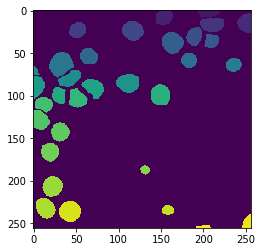

In [41]:
plt.imshow(labels)

In [38]:
from skimage.draw import circle 

idx = 404
g = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[idx]['sample']))

gt_masks = imread_collection(g).concatenate()
gt_mask = np.sum(np.stack(gt_masks, 0), 0)/255.0
gt_labels = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), np.uint16)
for index in range(0, gt_masks.shape[0]):
    gt_labels[gt_masks[index] > 0] = index + 1    
boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0)    
gt_mask[boundaries] = 0

# simulate CNN output - nuclei centers
nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in gt_masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
nuclei_centers = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), dtype=int)

for coord in nuclei_centers_coord: 
    rr, cc = circle(coord[0], coord[1], 2, gt_mask.shape)
    nuclei_centers[rr, cc] = 1

Plotting gt nuclei boundaries


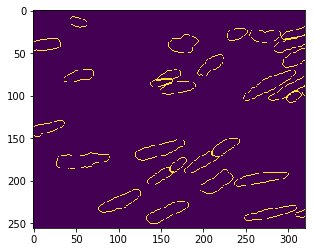

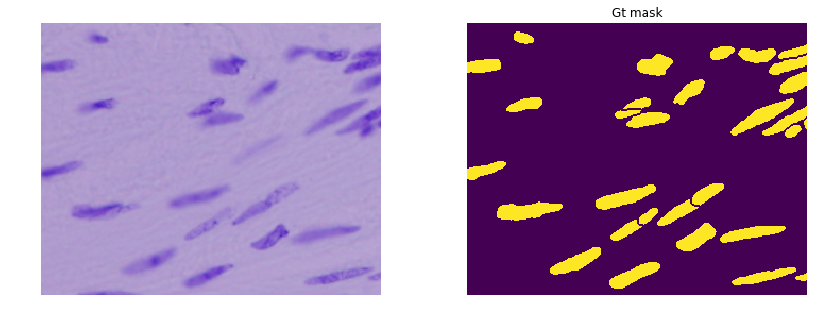

Average gt nuclei area "radius" 6.046483988747362


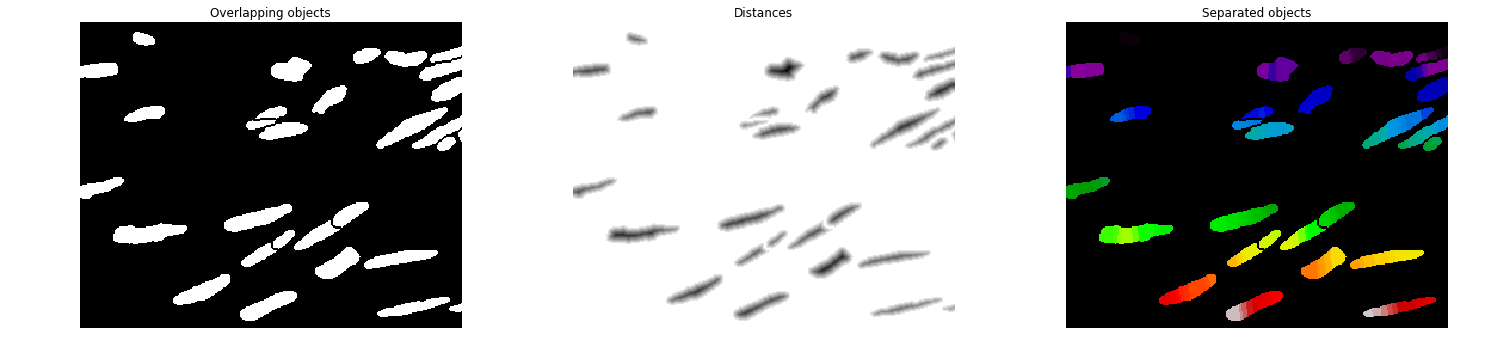

Total count of gt masks 30
Total count of wt masks 175
Average wt nuclei area "radius" 5


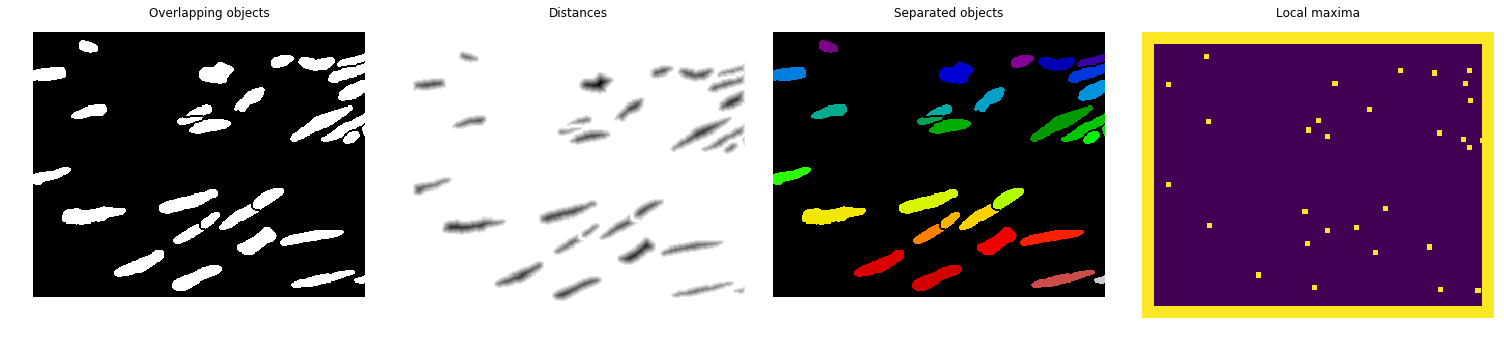

Total count of gt masks 30
Total count of wt masks 31


([0.9354838709677419,
  0.9354838709677419,
  0.9354838709677419,
  0.9354838709677419,
  0.9354838709677419,
  0.9354838709677419,
  0.9354838709677419,
  0.875,
  0.7647058823529411,
  0.6216216216216216],
 0.8809714600748755)

In [10]:
# w pics
import glob
import numpy as np
from skimage.morphology import dilation
from skimage.morphology import square
from skimage.segmentation import find_boundaries
from scipy import ndimage as ndi
from skimage.io import imread,imread_collection
import matplotlib.pyplot as plt
from skimage.morphology import watershed
from skimage.feature import peak_local_max
import skimage

threshold = 0.5
# cluster = 0
# idx = stat_df[stat_df.avg_precisions<0.3].sample(n=1).idx.values[0]
idx = 505

image = train_df.loc[idx,'img_array_rgb']

g = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[idx]['sample']))
gt_masks = imread_collection(g).concatenate()

# this will sumulate the prediction mask
# gt_mask = train_df.loc[idx,'train_mask']
# simulate prediction wo border

gt_mask = np.sum(np.stack(gt_masks, 0), 0)/255.0
gt_labels = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), np.uint16)
for index in range(0, gt_masks.shape[0]):
    gt_labels[gt_masks[index] > 0] = index + 1    
boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0)    
gt_mask[boundaries] = 0

# simulate CNN output - nuclei centers
nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in gt_masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]

nuclei_centers = np.zeros((gt_masks.shape[1], gt_masks.shape[2]), dtype=bool)
for coord in nuclei_centers_coord:
    nuclei_centers[coord[0],coord[1]] = True

print('Plotting gt nuclei boundaries')
plt.imshow(boundaries)
plt.show()


gt_areas = np.sum(gt_masks > 0.5, axis=(1,2))

fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(image)
plt.title("Original image")
ax[1].imshow(gt_mask)
plt.title("Gt mask")
for a in ax:
    a.set_axis_off()
plt.show()

print('Average gt nuclei area "radius" {}'.format(gt_areas.mean()**0.5 / 3.14))

# gt nuclei "radius"
radius = int(gt_areas.mean()**0.5/3.14)


# Do a dummy run of wt to estimate approx object size

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(gt_mask)
local_maxi = peak_local_max(distance,
                            indices=False,
                            footprint=np.ones((5, 5)),
                            labels=gt_mask)

markers = ndi.label(local_maxi)[0]
labels = watershed(-distance,
                   markers,
                   mask=gt_mask)

fig, axes = plt.subplots(ncols=3, figsize=(21, 5), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(gt_mask, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

print('Total count of gt masks {}'.format(gt_masks.shape[0]))
print('Total count of wt masks {}'.format(np.unique(labels).shape[0]))

# calculate_ap(pred_masks = labels,
#              gt_masks = gt_masks)


# rerun wt with a different footprint estimated from approx nuclei size

wt_areas = []
for i,label in enumerate(np.unique(labels)):
    if i == 0:
        # pass the background
        pass
    else:
        wt_areas.append((labels == label).sum())
        
wt_radius = int(np.asarray(wt_areas).max() ** 0.5 // 3)

print('Average wt nuclei area "radius" {}'.format(wt_radius))

gt_mask = skimage.util.pad(array=gt_mask,pad_width=10,mode='constant')
nuclei_centers = skimage.util.pad(array=nuclei_centers,pad_width=10,mode='constant',constant_values=[True])


# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(gt_mask)

local_maxi = peak_local_max(distance,
                            indices=False,
                            footprint=np.ones((wt_radius*2, wt_radius*2)),
                            labels=gt_mask)

# markers = ndi.label(local_maxi)[0]
markers = ndi.label(nuclei_centers)[0]

labels = watershed(-distance,
                   markers,
                   mask=gt_mask)

labels = labels[10:-10,10:-10]
gt_mask = gt_mask[10:-10,10:-10]

fig, axes = plt.subplots(ncols=4, figsize=(21, 5), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(gt_mask, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')
ax[3].imshow(dilation(nuclei_centers, square(5)))
ax[3].set_title('Local maxima')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

print('Total count of gt masks {}'.format(gt_masks.shape[0]))
print('Total count of wt masks {}'.format(np.unique(labels).shape[0]))

calculate_ap(labels, gt_masks)

In [4]:
def calculate_ap(y_pred, gt_masks):
    height, width, num_masks = gt_masks.shape[1],gt_masks.shape[2], gt_masks.shape[0]
    
    # Make a ground truth label image (pixel value is index of object label)
    # Note that labels will contain the background label
    labels = np.zeros((height, width), np.uint16)
    for index in range(0, num_masks):
        labels[gt_masks[index] > 0] = index + 1    
        
    # y_pred should also contain background labels
    # y_pred should contain in if it is taken from wt transform
        
    true_objects = len(np.unique(labels))
    pred_objects = len(np.unique(y_pred)) 
    
    # Compute intersection between all objects
    intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

    # Compute areas (needed for finding the union between all objects)
    area_true = np.histogram(labels, bins = true_objects)[0]
    area_pred = np.histogram(y_pred, bins = pred_objects)[0]
    area_true = np.expand_dims(area_true, -1)
    area_pred = np.expand_dims(area_pred, 0)

    # Compute union
    union = area_true + area_pred - intersection 
    
    # Exclude background from the analysis
    intersection = intersection[1:,1:]
    union = union[1:,1:]
    union[union == 0] = 1e-9

    # Compute the intersection over union
    iou = intersection / union   

    # Loop over IoU thresholds
    prec = []
    # print("Thresh\tTP\tFP\tFN\tPrec.")
    for t in np.arange(0.5, 1.0, 0.05):
        tp, fp, fn = precision_at(t, iou)
        p = tp / (tp + fp + fn)
        # print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
        prec.append(p)
    # print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))
    
    return prec, np.mean(prec)

# Precision helper function
def precision_at(threshold, iou):
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) == 1   # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
    return tp, fp, fn    

In [276]:
calculate_ap(labels, gt_masks)

Thresh	TP	FP	FN	Prec.
0.500	15	4	14	0.455
0.550	14	5	15	0.412
0.600	13	6	16	0.371
0.650	12	7	17	0.333
0.700	12	7	17	0.333
0.750	12	7	17	0.333
0.800	11	8	18	0.297
0.850	11	8	18	0.297
0.900	11	8	18	0.297
0.950	11	8	18	0.297
AP	-	-	-	0.343


([0.45454545454545453,
  0.4117647058823529,
  0.37142857142857144,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  0.2972972972972973,
  0.2972972972972973,
  0.2972972972972973,
  0.2972972972972973],
 0.3426927921045568)

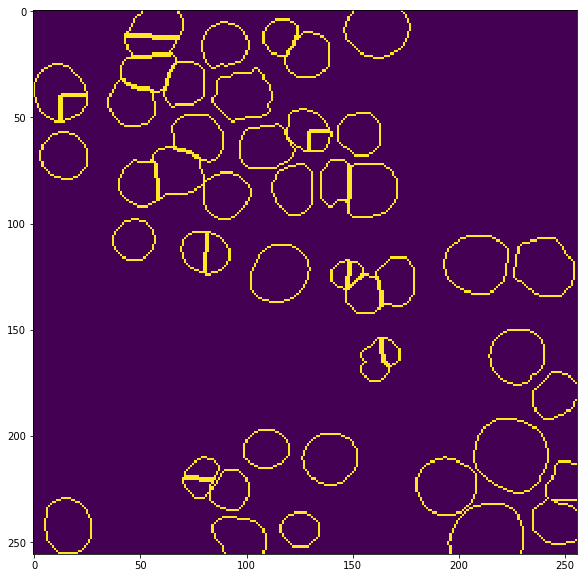

In [253]:
from skimage.segmentation import find_boundaries

boundaries = find_boundaries(labels, connectivity=1, mode='outer', background=0)
plt.figure(figsize=(10, 10))
plt.imshow(boundaries)
plt.show()

In [179]:
(labels == 1).sum()

345

In [191]:
wt_radius

5.0

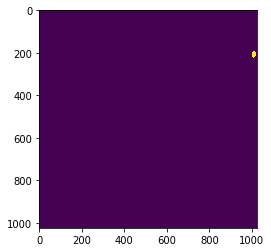

In [171]:
plt.imshow(labels==8)
plt.show()

In [82]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max



g = glob.glob('../data/stage1_train/{}/masks/*.png'.format( train_df.loc[1]['sample']))
gt_masks = imread_collection(g).concatenate()
gt_mask = train_df.loc[1,'train_mask']
image = train_df.loc[1,'img_array_rgb']



# Generate an initial image with two overlapping circles
# x, y = np.indices((80, 80))
# x1, y1, x2, y2 = 28, 28, 44, 52
# r1, r2 = 16, 20
# mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
# mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = gt

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((6, 6)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(20, 10), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()


calculate_ap(pred_masks = labels,
             gt_masks = gt_masks)




NameError: name 'gt_masks' is not defined

In [56]:
# Compute number of objects
true_objects = len(np.unique(labels))
pred_objects = len(np.unique(y_pred))
print("Number of true objects:", true_objects)
print("Number of predicted objects:", pred_objects)

# Compute intersection between all objects
intersection = np.histogram2d(labels.flatten(), y_pred.flatten(), bins=(true_objects, pred_objects))[0]

# Compute areas (needed for finding the union between all objects)
area_true = np.histogram(labels, bins = true_objects)[0]
area_pred = np.histogram(y_pred, bins = pred_objects)[0]
area_true = np.expand_dims(area_true, -1)
area_pred = np.expand_dims(area_pred, 0)

# Compute union
union = area_true + area_pred - intersection

# Exclude background from the analysis
intersection = intersection[1:,1:]
union = union[1:,1:]
union[union == 0] = 1e-9

# Compute the intersection over union
iou = intersection / union

# Precision helper function
def precision_at(threshold, iou):
    matches = iou > threshold
    true_positives = np.sum(matches, axis=1) == 1   # Correct objects
    false_positives = np.sum(matches, axis=0) == 0  # Missed objects
    false_negatives = np.sum(matches, axis=1) == 0  # Extra objects
    tp, fp, fn = np.sum(true_positives), np.sum(false_positives), np.sum(false_negatives)
    return tp, fp, fn

# Loop over IoU thresholds
prec = []
print("Thresh\tTP\tFP\tFN\tPrec.")
for t in np.arange(0.5, 1.0, 0.05):
    tp, fp, fn = precision_at(t, iou)
    p = tp / (tp + fp + fn)
    print("{:1.3f}\t{}\t{}\t{}\t{:1.3f}".format(t, tp, fp, fn, p))
    prec.append(p)
print("AP\t-\t-\t-\t{:1.3f}".format(np.mean(prec)))

Number of true objects: 57
Number of predicted objects: 56
Thresh	TP	FP	FN	Prec.
0.500	54	1	2	0.947
0.550	54	1	2	0.947
0.600	53	2	3	0.914
0.650	53	2	3	0.914
0.700	53	2	3	0.914
0.750	51	4	5	0.850
0.800	41	14	15	0.586
0.850	13	42	43	0.133
0.900	0	55	56	0.000
0.950	0	55	56	0.000
AP	-	-	-	0.620


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max


# Generate an initial image with two overlapping circles
x, y = np.indices((80, 80))
x1, y1, x2, y2 = 28, 28, 44, 52
r1, r2 = 16, 20
mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
image = np.logical_or(mask_circle1, mask_circle2)

# Now we want to separate the two objects in image
# Generate the markers as local maxima of the distance to the background
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()

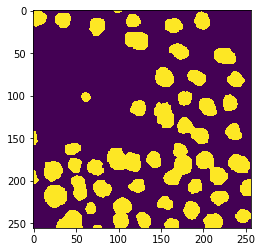

In [83]:
plt.imshow(image)

In [70]:
np.unique(labels )

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78], dtype=int32)

In [62]:
np.unique(labels)

array([0, 1, 2], dtype=int32)

In [29]:
nuclei.shape

(56, 256, 256)

In [79]:
import os
import time
import numpy as np
import pandas as pd
from skimage.io import imread
import torch.utils.data as data

class BDataset(data.Dataset):
    def __init__(self,
                 df = None,
                 transforms = None,
                 fold_num = 0, # which fold to use
                 mode = 'train', # 'train', 'val' or 'test'
                 test_size = 0.25,
                 dset_resl = '256x256'):
        
        self.df = df
        self.df = self.df.reset_index()
        self.transforms = transforms
        self.fold_num = fold_num
        self.mode = mode
        self.resolution_dict = {
            # resolutions divisible by 16
            '256x256':[[256,256],[256,256]],
            '256x320':[[256,320],[256,320]],
            '1024x1024':[[1024,1024],[1024,1024]],
            '512x640':[[512,640],[512,640]],   
            '260x347':[[260,347],[288,352]], 
            '520x696':[[520,696],[544,704]],    
            '360x360':[[360,360],[384,384]],
            '603x1272':[[603,1272],[608,1280]],
            '1040x1388':[[1040,1388],[1056,1376]],    
        }
        if self.mode in ['train','val']:
            # set indices
            skf = StratifiedKFold(n_splits=4,
                                  shuffle = True,
                                  random_state = 42)

            # stratify fold by cluster number
            f1, f2, f3, f4 = skf.split(self.df.index.values,self.df.cluster.values)
            self.folds = [f1, f2, f3, f4]
            # all train images
            self.train_idx = self.folds[self.fold_num][0]
            self.val_idx = self.folds[self.fold_num][1]
            
            # leave only images with particular resolution
            self.train_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.train_idx)))
            self.val_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.val_idx)))
            
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)          
        elif self.mode == 'test':  
            return self.df.shape[0]   

    def __getitem__(self, idx):
        if self.mode == 'train':
            img = self.df.loc[self.train_idx[idx],'img_array_rgb']
            mask = self.df.loc[self.train_idx[idx],'train_mask']
            or_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][1]
        elif self.mode == 'val':
            img = self.df.loc[self.val_idx[idx],'img_array_rgb']
            mask = self.df.loc[self.val_idx[idx],'train_mask']
            or_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][0]            
            target_resl = self.resolution_dict[train_df.loc[self.val_idx[idx],'w_h']][1]
        elif self.mode == 'test':
            img = self.df.loc[idx,'img_array_rgb']
            mask = None
            or_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][0]            
            target_resl = self.resolution_dict[train_df.loc[idx,'w_h']][1]
            
        if self.transforms is not None:
            img, mask = self.transforms(img, mask, target_resl) 

        
        return img,mask,or_resl,target_resl

# Rewrite generator to read from disk

In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

In [ ]:
train_df = pd.read_pickle('../data/train_df_stage1')

In [4]:
del train_df['img_array_rgb']
del train_df['train_mask']

In [5]:
train_df.to_pickle('../data/train_df_stage1_meta')

In [3]:
import pandas as pd
train_df = pd.read_pickle('../data/train_df_stage1_meta')
train_df = train_df.reset_index()

In [66]:
import os
import time
import numpy as np
import pandas as pd
import torch.utils.data as data
from scipy import ndimage
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from skimage.draw import circle


class BDataset(data.Dataset):
    def __init__(self,
                 df = None,
                 transforms = None,
                 fold_num = 0, # which fold to use
                 mode = 'train', # 'train', 'val' or 'test'
                 test_size = 0.25,
                 dset_resl = '256x256'):
        
        self.df = df
        self.df = self.df.reset_index()
        self.transforms = transforms
        self.fold_num = fold_num
        self.mode = mode
        self.resolution_dict = {
            # resolutions divisible by 16
            '256x256':[[256,256],[256,256]],
            '256x320':[[256,320],[256,320]],
            '1024x1024':[[1024,1024],[1024,1024]],
            '512x640':[[512,640],[512,640]],   
            '260x347':[[260,347],[288,352]], 
            '520x696':[[520,696],[544,704]],    
            '360x360':[[360,360],[384,384]],
            '603x1272':[[603,1272],[608,1280]],
            '1040x1388':[[1040,1388],[1056,1376]],    
        }
        if self.mode in ['train','val']:
            # set indices
            skf = StratifiedKFold(n_splits=4,
                                  shuffle = True,
                                  random_state = 42)

            # stratify fold by cluster number
            f1, f2, f3, f4 = skf.split(self.df.index.values,self.df.cluster.values)
            self.folds = [f1, f2, f3, f4]
            # all train images
            self.train_idx = self.folds[self.fold_num][0]
            self.val_idx = self.folds[self.fold_num][1]
            
            # leave only images with particular resolution
            self.train_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.train_idx)))
            self.val_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.val_idx)))
            
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)          
        elif self.mode == 'test':  
            return self.df.shape[0]   

    def __getitem__(self, idx):
        if self.mode == 'train':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(train_df.loc[self.train_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[self.train_idx[idx],'sample']))
            
            or_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][1]            
            
            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 
            # remove boundaries from the mask 
            mask[boundaries] = 0
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], 2, mask.shape)
                nuclei_centers[rr, cc] = 1

        elif self.mode == 'val':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(train_df.loc[self.val_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(train_df.loc[self.val_idx[idx],'sample']))
            
            or_resl = self.resolution_dict[train_df.loc[self.val_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[train_df.loc[self.val_idx[idx],'w_h']][1]            
            
            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 
            # remove boundaries from the mask 
            mask[boundaries] = 0
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], 2, mask.shape)
                nuclei_centers[rr, cc] = 1
        elif self.mode == 'test':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(self.df.loc[idx,'sample']))
            img = imread(img_glob[0])[:,:,0:3]
            
            mask = None
            boundaries = None
            nuclei_centers = None
            or_resl = self.resolution_dict[train_df.loc[self.train_idx[idx],'w_h']][0]            
            target_resl = self.resolution_dict[train_df.loc[idx,'w_h']][1]
            
        if self.transforms is not None:
            msk = np.stack((mask,boundaries,nuclei_centers),axis=2)
            img, msk = self.transforms(img, msk, target_resl) 
        
        return img,msk,or_resl,target_resl

In [4]:
train_df.w_h.value_counts()

256x256      334
256x320      112
520x696       92
360x360       91
1024x1024     16
512x640       13
603x1272       6
260x347        5
1040x1388      1
Name: w_h, dtype: int64

In [62]:
for resl_key,resl_params in train_dataset.resolution_dict.items():
    source_resl = resl_params[0]
    source_resl = resl_params[0]
    print(key,value)

256x320 [[256, 320], [256, 320]]
256x256 [[256, 256], [256, 256]]
1024x1024 [[1024, 1024], [1024, 1024]]
360x360 [[360, 360], [384, 384]]
603x1272 [[603, 1272], [608, 1280]]
260x347 [[260, 347], [288, 352]]
512x640 [[512, 640], [512, 640]]
1040x1388 [[1040, 1388], [1056, 1376]]
520x696 [[520, 696], [544, 704]]


In [176]:
resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],
    '603x1272':[[603,1272],[608,1280]],
    '1040x1388':[[1040,1388],[1056,1376]],    
}

for key,value in resolution_dict.items():
    train_dataset = BDataset(df = train_df,
                     transforms = train_augs,
                     fold_num = 3,
                     mode = 'train',
                     test_size = 0.25,
                     dset_resl = key
                     )
    
    print(len(train_dataset.train_idx))

71
4
4
73
243
84
12
1
11


In [38]:
a=np.array([100,200,100,200])
b=np.array([10,1,1,1])


In [40]:
np.inner(a,b) / b.sum()

115.38461538461539

In [ ]:
>>> np.dot(a,b)
array([[37, 40],
       [85, 92]])
>>> np.inner(a,b)
array([[35, 41],
       [81, 95]])

In [32]:
len(train_dataset)

250

In [11]:
import torch

from utils.BDataset import BDataset
from utils.RAugs import *
from utils.BAugs import BAugs,BAugsVal
import pandas as pd

train_df = pd.read_pickle('../data/train_df_stage1_meta')
train_df = train_df.reset_index()


train_augs = BAugs(prob=0.1,
                   mean=(0.485, 0.456, 0.406),
                   std=(0.229, 0.224, 0.225))    

train_dataset = BDataset(df = train_df,
                 transforms = train_augs,
                 fold_num = 0,
                 mode = 'train',
                 dset_resl = '256x256' 
                 )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=16,        
    shuffle=True,
    num_workers=1,
    pin_memory=False,
    drop_last=False)

In [49]:
np.unique(target[0,0,:,:])

array([0., 1.], dtype=float32)

In [44]:
np.unique(target[0,0,:,:].numpy())

array([0., 1.], dtype=float32)

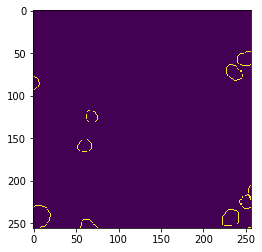

In [32]:
import matplotlib.pyplot as plt
plt.imshow(target[0,1,:,:])
plt.show()

In [34]:
input = input.permute(0,3,1,2).contiguous().float()
target = target[:,:,:,0:2].permute(0,3,1,2).contiguous().float()

In [41]:
target.shape

torch.Size([16, 2, 256, 256])

In [39]:
np.unique(target[])

array([0.        , 0.00585938, 0.00683594, 0.0078125 , 0.00878906,
       0.00976562, 0.01074219, 0.01171875, 0.01269531, 0.01367188,
       0.015625  , 0.01660156, 0.01757812, 0.01953125, 0.02148438,
       0.02246094, 0.0234375 , 0.02441406, 0.02539062, 0.02636719,
       0.02734375, 0.02832031, 0.02929688, 0.03027344, 0.03125   ,
       0.03515625, 0.03710938, 0.04101562, 0.04296875, 0.04394531,
       0.04492188, 0.046875  , 0.04882812, 0.05273438, 0.05566406,
       0.05859375, 0.06054688, 0.06152344, 0.0625    , 0.06347656,
       0.06835938, 0.0703125 , 0.07324219, 0.07617188, 0.078125  ,
       0.08203125, 0.0859375 , 0.08789062, 0.08886719, 0.09082031,
       0.09375   , 0.09570312, 0.09667969, 0.1015625 , 0.10253906,
       0.10546875, 0.1171875 , 0.12109375, 0.12890625, 0.13183594,
       0.140625  , 0.14648438, 0.14941406, 0.15234375, 0.15625   ,
       0.15722656, 0.15820312, 0.1640625 , 0.16503906, 0.16699219,
       0.171875  , 0.17578125, 0.17773438, 0.1796875 , 0.18457

In [13]:
target.size()

torch.Size([16, 256, 256, 3])

In [50]:
#============ Basic models ============#
from models.LinkNet import LinkNet34,LinkNet50,LinkNeXt

#============ Inception based models ============#
from models.LinkNet import LinkInceptionResNet,LinkCeption

#============ Heavier models ============#
from models.LinkNet import ResNet34Unet
from models.VggUNet import UNet11
from models.GCN import FCN


model_params = {
    'unet11' : [UNet11,{'num_classes':1,'num_channels':3,'upsampling':'conv'}],
    'linknet34': [LinkNet34,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknet50': [LinkNet50,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linknext': [LinkNeXt,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'linkception': [LinkCeption,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'linkceptionresnet': [LinkInceptionResNet,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],
    'resunet34': [ResNet34Unet,{'num_classes':2,'num_channels':3,'upsampling':'conv','decoder_kernel_size':3,}],    
    'gcn50' : [FCN,{'num_classes':2}],
}

model = model_params['linknet34'][0](**model_params['linknet34'][1])

In [61]:
target_var.data.size()

torch.Size([16, 2, 256, 256])

In [64]:
np.unique((target_var.data[0,0,:,:]>0.5)*1)

array([0, 1], dtype=uint8)

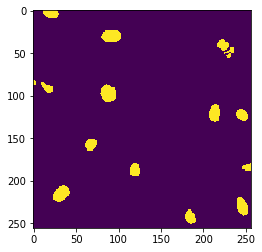

In [62]:
plt.imshow(target_var.data[0,0,:,:])

In [59]:
for i, (input, target, or_resl, target_resl) in enumerate(train_loader):
        
    input = input.permute(0,3,1,2).float()
    target = target[:,:,:,0:2].permute(0,3,1,2).float()

    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output
    output = model(input_var)

    break

In [10]:
type(output.data)

torch.FloatTensor

In [1]:
from utils.BDataset import BDataset

In [42]:
output.size()

torch.Size([16, 2, 256, 256])

In [41]:
output[0,1,:,:].data.numpy().max()

0.15491611

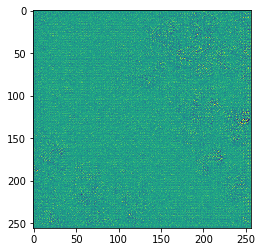

In [39]:
plt.imshow(output[0,1,:,:].data.numpy())
plt.show()

In [35]:
output.size()

torch.Size([16, 2, 256, 256])

In [15]:
target.permute(0,3,1,2).size()

torch.Size([16, 3, 256, 256])

In [25]:
target[:,:,:,0:2].size()

torch.Size([16, 256, 256, 2])

In [21]:
target[1,:,:,:].min()

0.0

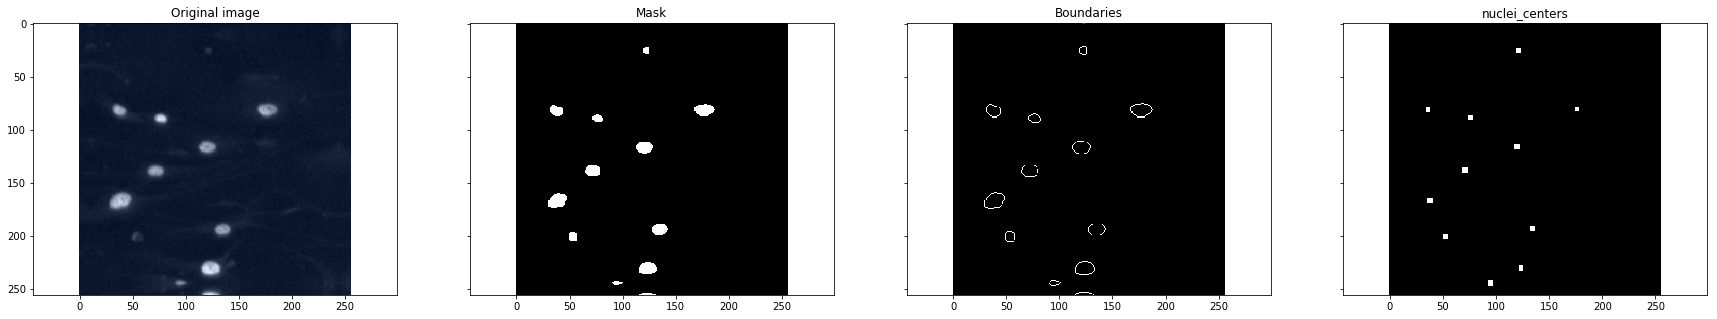

In [11]:
import matplotlib.pyplot as plt

img = input[0,:,:,:].numpy()
msk = target[0,:,:,:].numpy()

fig, axes = plt.subplots(ncols=4, figsize=(30, 5), sharex=True, sharey=True)
ax = axes.ravel()

img += -img.min()
img *= (1/img.max())

ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original image')
ax[1].imshow(msk[:,:,0], cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Mask')
ax[2].imshow(msk[:,:,1], cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('Boundaries')
ax[3].imshow(msk[:,:,2], cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('nuclei_centers')

plt.show()

In [2]:
len(train_dataset.train_idx)

73

In [17]:
img.shape

(320, 256, 3)

((1024, 1024, 3), (1024, 1024, 3))

In [40]:
img.min()

-13.387346

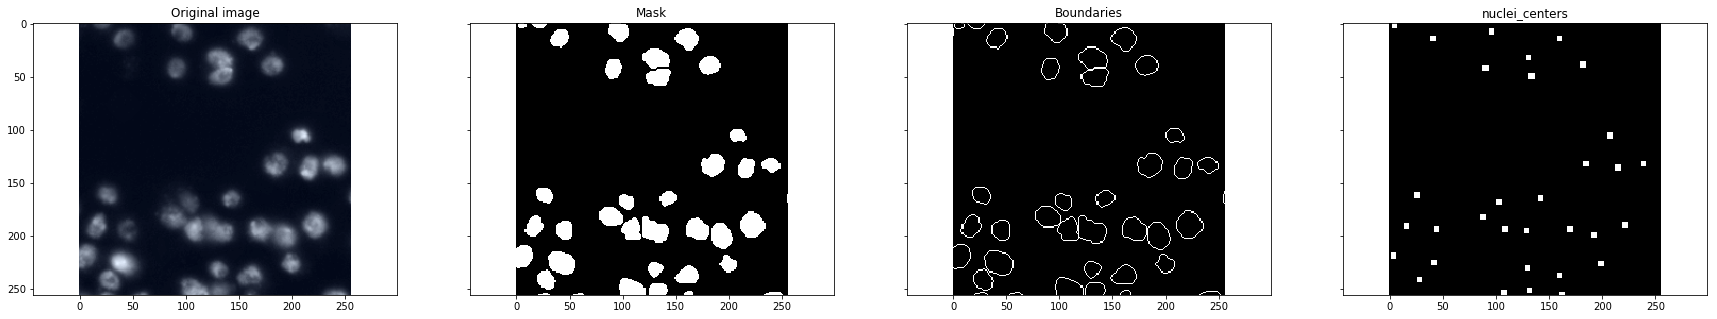

In [31]:
import matplotlib.pyplot as plt

img,msk,or_resl,target_resl = train_dataset.__getitem__(0)

fig, axes = plt.subplots(ncols=4, figsize=(30, 5), sharex=True, sharey=True)
ax = axes.ravel()

img += -img.min()
img *= (1/img.max())

ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original image')
ax[1].imshow(msk[:,:,0], cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Mask')
ax[2].imshow(msk[:,:,1], cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('Boundaries')
ax[3].imshow(msk[:,:,2], cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('nuclei_centers')

plt.show()

In [ ]:
256x256      334
256x320      112
520x696       92
360x360       91
1024x1024     16
512x640       13
603x1272       6
260x347        5
1040x1388      1

In [13]:
import collections

resolution_list = [
    # resolutions divisible by 16
    ['256x256',[256,256],[256,256]],
    ['256x320',[256,320],[256,320]],
    ['520x696',[520,696],[544,704]],   
    ['360x360',[360,360],[384,384]],    
    ['1024x1024',[1024,1024],[1024,1024]],
    ['512x640',[512,640],[512,640]],   
    ['260x347',[260,347],[288,352]], 
    ['1040x1388',[1040,1388],[1056,1376]],      
    ['603x1272',[603,1272],[608,1280]],
]
# resolution_dict = collections.OrderedDict(resolution_dict)


In [15]:
for resl_key,source_resl,target_resl in resolution_list:
    print(resl_key,source_resl,target_resl)

256x256 [256, 256] [256, 256]
256x320 [256, 320] [256, 320]
1024x1024 [1024, 1024] [1024, 1024]
512x640 [512, 640] [512, 640]
260x347 [260, 347] [288, 352]
520x696 [520, 696] [544, 704]
360x360 [360, 360] [384, 384]
603x1272 [603, 1272] [608, 1280]
1040x1388 [1040, 1388] [1056, 1376]


In [4]:
for k, v in resolution_dict.items():
    print(k, v)

256x256 [[256, 256], [256, 256]]
1024x1024 [[1024, 1024], [1024, 1024]]
1040x1388 [[1040, 1388], [1056, 1376]]
603x1272 [[603, 1272], [608, 1280]]
260x347 [[260, 347], [288, 352]]
512x640 [[512, 640], [512, 640]]
360x360 [[360, 360], [384, 384]]
520x696 [[520, 696], [544, 704]]
256x320 [[256, 320], [256, 320]]


# Add thinning

In [7]:
train_df.w_h.value_counts()

256x256      334
256x320      112
520x696       92
360x360       91
1024x1024     16
512x640       13
603x1272       6
260x347        5
1040x1388      1
Name: w_h, dtype: int64

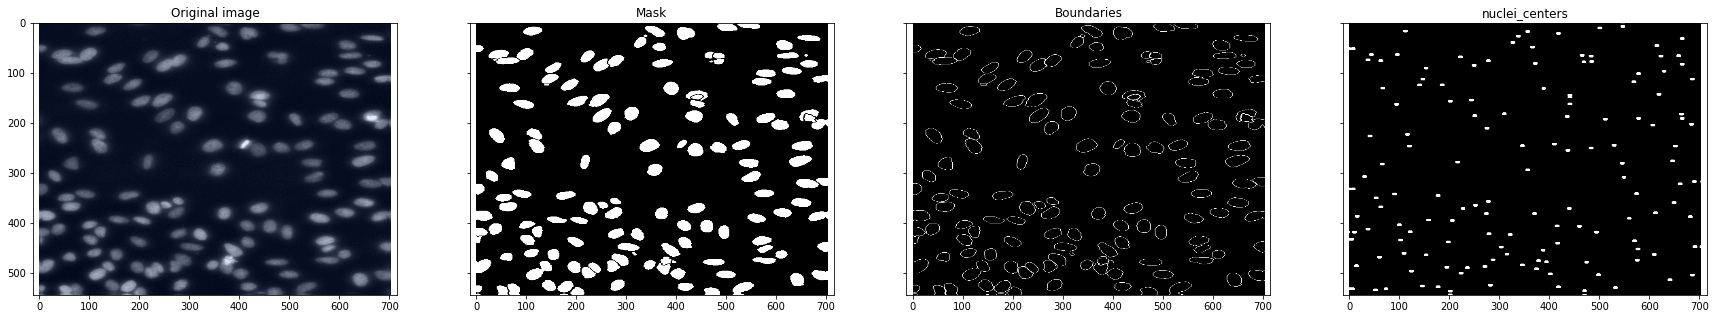

In [129]:
import matplotlib.pyplot as plt

img = input[1,:,:,:].numpy()
msk = target[1,:,:,:].numpy()

fig, axes = plt.subplots(ncols=4, figsize=(30, 5), sharex=True, sharey=True)
ax = axes.ravel()

img += -img.min()
img *= (1/img.max())

ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original image')
ax[1].imshow(msk[:,:,0], cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Mask')
ax[2].imshow(msk[:,:,1], cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('Boundaries')
ax[3].imshow(msk[:,:,2], cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('nuclei_centers')

plt.show()

In [108]:
target.size()

torch.Size([10])

In [128]:
for i, (input, target, or_resl, target_resl) in enumerate(train_loader):
        
    input = input
    target = target[:,:,:,0:3]

    input_var = torch.autograd.Variable(input)
    target_var = torch.autograd.Variable(target)

    # compute output

    break

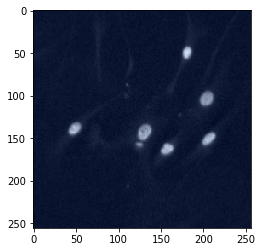

In [119]:
import matplotlib.pyplot as plt

img = input[2,:,:,:].numpy()

img += -img.min()
img *= (1/img.max())
plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')
plt.show()

In [127]:
import torch

from utils.RAugs import *
from utils.BAugs import BAugs,BAugsVal
import pandas as pd

train_df = pd.read_pickle('../data/train_df_stage1_meta')
train_df = train_df.reset_index()

test_df = pd.read_pickle('../data/test_df_stage1_meta')
test_df = test_df.reset_index()


train_augs = BAugs(prob=0.1,
                   mean=(0.485, 0.456, 0.406),
                   std=(0.229, 0.224, 0.225))    

train_dataset = BDataset(df = train_df,
                 transforms = train_augs,
                 fold_num = 0,
                 mode = 'train',
                 dset_resl = '520x696',
                 erosion_type = 'boundary'                         
                 )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=10,        
    shuffle=True,
    num_workers=1,
    pin_memory=False,
    drop_last=False)

In [ ]:
256x256    24
512x680     8
512x640     8
260x347     4
520x696     4
519x253     4
524x348     4
520x348     4
519x162     2
519x161     2
390x239     1

In [121]:
import os
import time
import glob
import numpy as np
import pandas as pd
from scipy import ndimage
import torch.utils.data as data
from skimage.draw import circle
from skimage.morphology import thin
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# for testing
resolution_dict2 = {
    # resolutions divisible by 16
    '1024x1024':[[1024,1024],[1024,1024]],
    '1040x1388':[[1040,1388],[1056,1376]],    
}

resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],
    '603x1272':[[603,1272],[608,1280]],
    '1040x1388':[[1040,1388],[1056,1376]],  

    # additional test resolutions    
    '512x680':[[512,680],[544,704]], 
    '519x253':[[519,253],[544,256]],     
    '524x348':[[524,348],[544,352]],  
    '520x348':[[520,348],[544,352]],
    '519x162':[[519,162],[544,160]],
    '519x161':[[519,161],[544,160]],
    '390x239':[[390,239],[416,256]],          
}

class BDataset(data.Dataset):
    def __init__(self,
                 df = None,
                 transforms = None,
                 fold_num = 0, # which fold to use
                 mode = 'train', # 'train', 'val' or 'test'
                 dset_resl = '256x256',
                 erosion_type = 'boundary', # erode or boundary
                 nuclei_size = 4):
        
        self.df = df
        self.df = self.df.reset_index()
        self.transforms = transforms
        self.fold_num = fold_num
        self.mode = mode
        self.nuclei_size = nuclei_size
        self.erosion_type = erosion_type
        self.resolution_dict = resolution_dict
        if self.mode in ['train','val']:
            # set indices
            skf = StratifiedKFold(n_splits=4,
                                  shuffle = True,
                                  random_state = 42)

            # stratify fold by cluster number
            f1, f2, f3, f4 = skf.split(self.df.index.values,self.df.cluster.values)
            self.folds = [f1, f2, f3, f4]
            # all train images
            self.train_idx = self.folds[self.fold_num][0]
            self.val_idx = self.folds[self.fold_num][1]
            
            # leave only images with particular resolution
            self.train_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.train_idx)))
            self.val_idx = list(set(self.df[self.df.w_h==dset_resl].index.values).intersection(set(self.val_idx)))
        else:
            self.train_idx = list(set(self.df[self.df.w_h==dset_resl].index.values))
            
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)          
        elif self.mode == 'test':  
            return len(self.train_idx) 

    def __getitem__(self, idx):
        if self.mode == 'train':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))
            
            or_resl = self.resolution_dict[self.df.loc[self.train_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[self.df.loc[self.train_idx[idx],'w_h']][1]            
            
            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 
           
            if self.erosion_type == 'erode':
                # erode a few layers
                masks_thin = np.asarray([(thin(image=mask,max_iter=3)) for mask in masks])
                # replace mask with the eroded version
                mask = np.sum(np.stack(masks_thin, 0), 0)/255.0            
            else:
                # just remove the boundaries
                mask[boundaries] = 0
            
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], self.nuclei_size, mask.shape)
                nuclei_centers[rr, cc] = 1
        elif self.mode == 'val':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(self.df.loc[self.val_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(self.df.loc[self.val_idx[idx],'sample']))
            
            or_resl = self.resolution_dict[self.df.loc[self.val_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[self.df.loc[self.val_idx[idx],'w_h']][1]            
            
            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 

            if self.erosion_type == 'erode':
                # erode a few layers
                masks_thin = np.asarray([(thin(image=mask,max_iter=3)) for mask in masks])
                # replace mask with the eroded version
                mask = np.sum(np.stack(masks_thin, 0), 0)/255.0            
            else:
                # just remove the boundaries
                mask[boundaries] = 0            
            
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], self.nuclei_size, mask.shape)
                nuclei_centers[rr, cc] = 1
        elif self.mode == 'test':
            img_glob = glob.glob('../data/stage1_test/{}/images/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))
            img = imread(img_glob[0])[:,:,0:3]
            
            mask = None
            boundaries = None
            nuclei_centers = None
            or_resl = self.resolution_dict[self.df.loc[self.train_idx[idx],'w_h']][0]
            target_resl = self.resolution_dict[self.df.loc[self.train_idx[idx],'w_h']][1]
            
        if self.transforms is not None:
            if mask is not None:            
                msk = np.stack((mask,boundaries,nuclei_centers),axis=2)
                img, msk = self.transforms(img, msk, target_resl)
            else:
                msk = 0
                img, _ = self.transforms(img, None, target_resl)
        
        # if the image gets flipped, flip it back
        if img.shape[0]!=target_resl[0]:
            img = img.transpose(1, 0, 2)
            if mask is not None:
                msk = msk.transpose(1, 0, 2)

        return img,msk,or_resl,target_resl

# Meta data for test

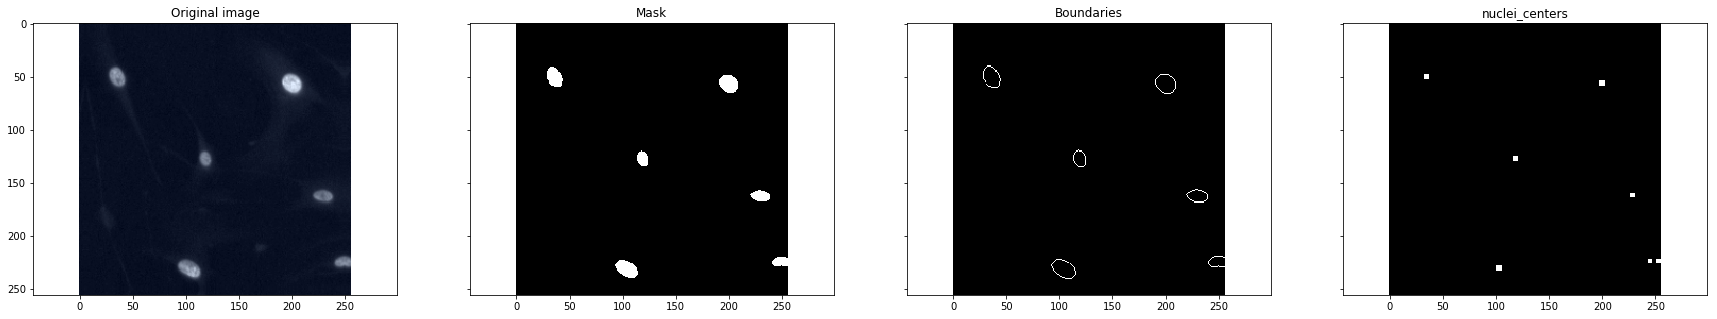

In [54]:
import matplotlib.pyplot as plt

img = input[1,:,:,:].numpy()
msk = target[1,:,:,:].numpy()

fig, axes = plt.subplots(ncols=4, figsize=(30, 5), sharex=True, sharey=True)
ax = axes.ravel()

img += -img.min()
img *= (1/img.max())

ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Original image')
ax[1].imshow(msk[:,:,0], cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Mask')
ax[2].imshow(msk[:,:,1], cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('Boundaries')
ax[3].imshow(msk[:,:,2], cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('nuclei_centers')

plt.show()

In [6]:
# read images and meta-data to the dataframe
import glob
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage import color
import tqdm
from sklearn.cluster import KMeans

TRAIN_DIR = '../data/stage1_train'
TEST_DIR = '../data/stage1_test'

g_test = list(glob.glob(TEST_DIR+'/**/*.*', recursive=True)) 
test_samples = [(path.split('/')[3]) for path in g_test]
test_type = [(path.split('/')[4]) for path in g_test]
test_imgs = [(path.split('/')[5]) for path in g_test]

test_df = pd.DataFrame()
test_df['path'] = g_test
test_df['sample'] = test_samples
test_df['type'] = test_type
test_df['img'] = test_imgs

test_df['width'] = 0
test_df['heigth'] = 0
test_df['img_array_rgb'] = np.nan

test_img_paths = test_df[test_df.type == 'images'].path.values
test_mask_paths = test_df[test_df.type == 'masks'].path.values
test_img_samples = list(test_df['sample'].unique())

# read all images and masks into the dataframe
with tqdm.tqdm(total=len(test_img_paths)) as pbar:
    for i,img_path in enumerate(test_img_paths):
        # use only 3 channels of png images
        idx = test_df.loc[test_df.path == img_path].index.values[0]
        img = imread(img_path)[:,:,0:3]
        # a small hack - pass a pd.Series instead of list because of indexing issues
        test_df.loc[test_df.path == img_path,'img_array_rgb'] = pd.Series(data=[img], index=[idx])
        pbar.update(1)

test_df['width'] = test_df['img_array_rgb'].apply(lambda x: x.shape[0])
test_df['heigth'] = test_df['img_array_rgb'].apply(lambda x: x.shape[1])
test_df['w_h'] = test_df['width'].astype(str) + 'x' + test_df['heigth'].astype(str)


# drop the nuclei        
test_df = test_df[test_df.type == 'images']
del test_df['img_array_rgb']


100%|██████████| 65/65 [00:00<00:00, 125.62it/s]


In [5]:
!ls -ls ../data/stage1_test/*/*/*.png | wc -l

65


In [8]:
test_df.to_pickle('../data/test_df_stage1_meta')

In [11]:
test_df.w_h.value_counts()

256x256    24
512x680     8
512x640     8
260x347     4
520x696     4
519x253     4
524x348     4
520x348     4
519x162     2
519x161     2
390x239     1
Name: w_h, dtype: int64

# RLE + submission loop

In [16]:
import pandas as pd
submit_df = pd.read_csv('../data/stage1_sample_submission.csv')

In [19]:
'53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4' in set(submit_df.ImageId.unique())

True

In [37]:
test_df = pd.read_csv('../submissions/curated_b9_d1_2ch_freeze_nodil_nofill_ths01.csv')

In [38]:
test_df

ImageId  \
0     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
1     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
2     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
3     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
4     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
5     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
6     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
7     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
8     0114f484a16c152baa2d82fdd43740880a762c93f436c8...   
9     0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
10    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
11    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
12    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
13    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
14    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
15    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
16    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
17    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
18    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
19    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
20    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
21    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
22    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
23    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
24    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
25    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
26    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
27    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
28    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
29    0999dab07b11bc85fb8464fc36c947fbd8b5d6ec498173...   
...                                                 ...   
4472  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4473  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4474  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4475  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4476  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4477  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4478  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4479  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4480  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4481  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4482  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4483  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4484  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4485  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4486  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4487  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4488  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4489  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4490  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4491  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4492  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4493  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4494  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4495  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4496  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4497  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4498  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4499  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4500  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   
4501  fe9adb627a6f45747c5a8223b671774791ededf9364f65...   

                                          EncodedPixels  
0                               27992 2 28248 2 28504 2  
1     38564 5 38818 8 39073 9 39327 12 39582 13 3983...  
2     31133 3 31389 4 31644 6 31900 6 32156 6 32413 ...  
3     50842 4 51095 8 51350 10 51605 11 51860 12 521...  
4     52881 7 53136 8 53392 8 53648 8 53904 8 54160 ...  
5     31630 9 31884 13 32138 15 32393 17 

In [18]:
test_df.iloc[0].ImageId

'4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2'

In [22]:
set(submit_df.ImageId.unique()) - set(test_df.ImageId.unique())

set()

{'0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5',
 '0999dab07b11bc85fb8464fc36c947fbd8b5d6ec49817361cb780659ca805eac',
 '0a849e0eb15faa8a6d7329c3dd66aabe9a294cccb52ed30a90c8ca99092ae732',
 '0e132f71c8b4875c3c2dd7a22997468a3e842b46aa9bd47cf7b0e8b7d63f0925',
 '0ed3555a4bd48046d3b63d8baf03a5aa97e523aa483aaa07459e7afa39fb96c6',
 '0f1f896d9ae5a04752d3239c690402c022db4d72c0d2c087d73380896f72c466',
 '1747f62148a919c8feb6d607faeebdf504b5e2ad42b6b1710b1189c37ebcdb2c',
 '17b9bf4356db24967c4677b8376ac38f826de73a88b93a8d73a8b452e399cdff',
 '1879f4f4f05e2bada0ffeb46c128b8df7a79b14c84f38c3e216a69653495153b',
 '191b2b2205f2f5cc9da04702c5d422bc249faf8bca1107af792da63cccfba829',
 '1962d0c5faf3e85cda80e0578e0cb7aca50826d781620e5c1c4cc586bc69f81a',
 '1cdbfee1951356e7b0a215073828695fe1ead5f8b1add119b6645d2fdc8d844e',
 '1d9eacb3161f1e2b45550389ecf7c535c7199c6b44b1c6a46303f7b965e508f1',
 '1ef68e93964c2d9230100c1347c328f6385a7bc027879dc3d4c055e6fe80cb3c',
 '259b35151d4a7a5ffdd7ab7f171b142d

In [12]:
test_df.path.iloc[0]

'../data/stage1_test/4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2/images/4727d94c6a57ed484270fdd8bbc6e3d5f2f15d5476794a4e37a40f2309a091e2.png'

In [6]:
'0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5.png' in list(test_df.img.values)

True

In [10]:
submit_df.ImageId.iloc[0]

'0114f484a16c152baa2d82fdd43740880a762c93f436c8988ac461c5c9dbe7d5'

In [4]:
test_resl_list = list(test_df.w_h.unique())

In [14]:
#============ Custom tensorboard logging ============#
from utils.TbLogger import Logger

#============ Basic imports ============#
import argparse
import os
import cv2
import shutil
import time
import tqdm
from skimage.io import imsave
import pandas as pd
from PIL import Image
import pickle

#============ PyTorch imports ============#
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
from torch.optim.lr_scheduler import ReduceLROnPlateau,MultiStepLR
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.nn import Sigmoid

#============ Metrics ============#
from sklearn.metrics import f1_score

#============ Models with presets ============#
from models.model_params import model_presets

#============ Loss ============#
from Loss import AVDiceLoss

#============ Utils and augs ============#
from utils.BDataset import BDataset,BDatasetResize,resolution_dict
# exclude 1024x1024 as they spoil the training process
from utils.BDataset import resolution_list_wo1024 as resolution_list
from utils.RAugs import *
from utils.BAugs import BAugsNoResize,BAugsValNoResize
from utils.LRScheduler import CyclicLR
from utils.metric import calculate_ap
from utils.watershed import apply_wt_boundary_center,apply_wt_boundary
from utils.utils import str2bool,restricted_float,to_np,rle_encode

parser = argparse.ArgumentParser(description='Kaggle DS Bowl 2018')

#============ basic params ============#
parser.add_argument('--arch', '-a', metavar='ARCH', default='linknet34',
                    help='model architecture')
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
parser.add_argument('--epochs', default=100, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('-b', '--batch-size', default=64, type=int,
                    metavar='N', help='mini-batch size (default: 64)')
parser.add_argument('-nch', '--channels', default=2, type=int,
                    metavar='CN', help='number of mask channels to use (default: 2)')
parser.add_argument('--erosion', metavar='ERSN', default='boundary',
                    help='erosion type - just remove boundary, or erode several pixel layers')

#============ optimization params ============#
parser.add_argument('--lr', '--learning-rate', default=1e-3, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--freeze', default=False, type=str2bool,
                    metavar='FR', help='whether to freeze the encoder')
parser.add_argument('--optimizer', '-o', metavar='OPTIMIZER', default='adam',
                    help='model optimizer')
parser.add_argument('-bcew', '--bce_weight', default=1, type=float,
                    help='weight for BCE part of the loss')
parser.add_argument('-dicew', '--dice_weight', default=1, type=float,
                    help='weight for DICE part of the loss')
parser.add_argument("--ths", default=0.3, type=restricted_float,
                    help='threshold applied before watershed transform')

#============ logging params and utilities ============#
parser.add_argument('--print-freq', '-p', default=10, type=int,
                    metavar='N', help='print frequency (default: 10)')
parser.add_argument('--lognumber', '-log', default='test_model', type=str,
                    metavar='LN', help='text id for saving logs')
parser.add_argument('--tensorboard', default=False, type=str2bool,
                    help='Use tensorboard to for loss visualization')
parser.add_argument('--tensorboard_images', default=False, type=str2bool,
                    help='Use tensorboard to see images')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')

#============ other params ============#
parser.add_argument('-pr', '--predict', dest='predict', action='store_true',
                    help='generate prediction masks')
parser.add_argument('-pr_train', '--predict_train', dest='predict_train', action='store_true',
                    help='generate prediction masks')

#============ Predict / evaluation loop params ============#
parser.add_argument('--dilate', default=False, type=str2bool,
                    metavar='FR', help='whether to dilate masks during test loop')
parser.add_argument('--fill_holes', default=False, type=str2bool,
                    metavar='FR', help='whether to fill holes during test loop')


best_val_f1_score = -1
best_map_score = -1

train_minib_counter = 0
valid_minib_counter = 0
pred_minib_counter = 0

# args = parser.parse_args()

args = type('test', (object,), {})()
args.arch = 'unet11'
args.channels = 2
args.lognumber = 'pred_debug'
args.tensorboard = False
args.tensorboard_images = True
args.resume = 'weights/unet11_2ch_freeze_ths5_curated_b9_d1_checkpoint.pth.tar'
args.predict = True
args.freeze = True
args.ths = 0.5
args.batch_size = 1
args.workers = 1
args.dilate = False
args.fill_holes = False


print(args)
time.sleep(3)

# remove the log file if it exists if we run the script in the training mode
if not (args.predict or args.predict_train):
    print('Folder {} delete triggered'.format(args.lognumber))
    try:
        shutil.rmtree('tb_logs/{}/'.format(args.lognumber))
    except:
        pass

# Set the Tensorboard logger
if args.tensorboard or args.tensorboard_images:
    logger = Logger('./tb_logs/{}'.format(args.lognumber))

# def main():
global logger, args, best_val_f1_score,best_map_score

print('Using parameter preset {}'.format(args.arch))
print('Model parameters:\n {}'.format(model_presets[args.arch][1]))
model = model_presets[args.arch][0](**model_presets[args.arch][1])

# train on all GPUs for speed
# model = model.cuda()
model = torch.nn.DataParallel(model)# .cuda()

# freeze the encoder if required
if args.freeze:
    model.module.require_encoder_grad(False)
else:
    model.module.require_encoder_grad(True)

# optionally resume from a checkpoint
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{}'".format(args.resume))
        checkpoint = torch.load(args.resume)
        args.start_epoch = checkpoint['epoch']
        best_val_f1_score = checkpoint['best_val_f1_score']
        # best_map_score = checkpoint['best_map_score']
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {})"
              .format(False, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(args.resume))

        
model = model.module

# predict loops
if (args.predict or args.predict_train):
    # read the test df    
    test_df = pd.read_pickle('../data/test_df_stage1_meta')
    test_df = test_df.reset_index() 
    print(1)
    
    test_resl_list = list(test_df.w_h.unique())
    submit_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])
    
    for test_resl in test_resl_list:
        
        print('Predicting for the resolution {} ...' .format(test_resl))        
        
        predict_augs = BAugsValNoResize(mean=model.mean,
                                        std=model.std)          
        
        predict_dataset = BDatasetResize(df = test_df,
                         transforms = predict_augs,
                         fold_num = 0,
                         mode = 'test',
                         dset_resl = test_resl 
                         )
        
        predict_loader = torch.utils.data.DataLoader(
            predict_dataset,
            batch_size=args.batch_size,        
            shuffle=False,
            num_workers=args.workers,
            pin_memory=False,
            drop_last=False)
        
        rle_nuclei = predict(predict_loader,
                             model)
        
        submit_df = submit_df.append(rle_nuclei)
        break
        

# train loop
else:
    # read the train df    
    train_df = pd.read_pickle('../data/train_df_stage1_meta')
    train_df = train_df.reset_index()

    criterion = AVDiceLoss(bce_weight=float(args.bce_weight),
                           dice_weight=float(args.dice_weight)).cuda()

    if args.optimizer.startswith('adam'):           
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)
    elif args.optimizer.startswith('rmsprop'):
        optimizer = torch.optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)
    elif args.optimizer.startswith('sgd'):
        optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)        
    else:
        raise ValueError('Optimizer not supported')        

    scheduler = MultiStepLR(optimizer, milestones=[50,120], gamma=0.1)

    # scheduler = CyclicLR(optimizer = optimizer,
    #                                 base_lr = 1e-6,
    #                                 max_lr = 1e-4,
    #                                 step_size = 1200,
    #                                 mode = 'triangular'                                         
    #                                )        

    # resolution is embedded into the augment call itself
    train_augs = BAugsNoResize(prob=0.5,
                       mean=model.module.mean,
                       std=model.module.std)

    val_augs = BAugsValNoResize(mean=model.module.mean,
                        std=model.module.std)          

    for epoch in range(args.start_epoch, args.epochs):
        scheduler.step()
        # loop over each resolution in the dataset

        train_dset_lengths = []
        val_dset_lengths = []

        train_losses = []
        val_losses = []

        train_f1_scores = []
        val_f1_scores = []

        train_map_scores = []
        val_map_scores = []

        # resolution order is shuffled each time
        for resl_key,source_resl,target_resl in resolution_list:

            # rule of thumb - train only on on normal / similar / abundand data 
            # on earlier epochs
            # on later epochs train on all of the data
            if epoch < 25 and resl_key not in ['256x256','520x696','360x360','256x320']:
                print('Passing on {} on earlier epochs'.format(resl_key))
            else:
                # for resl_key,source_resl,target_resl in resolution_list:
                # we will need to resize back to calculate metrics                

                # ready for k-fold training
                train_dataset = BDatasetResize(df = train_df,
                                 transforms = train_augs,
                                 fold_num = 0,
                                 mode = 'train',
                                 dset_resl = resl_key 
                                 )

                val_dataset = BDatasetResize(df = train_df,
                                 transforms = val_augs,
                                 fold_num = 0,
                                 mode = 'val',
                                 dset_resl = resl_key 
                                 )

                print('Training on {} resl\tTrain/val dataset length {}/{}'.format(resl_key,len(train_dataset),len(val_dataset)))                
                train_loader = torch.utils.data.DataLoader(
                    train_dataset,
                    batch_size=args.batch_size,        
                    shuffle=True,
                    num_workers=args.workers,
                    pin_memory=True,
                    drop_last=False)

                val_loader = torch.utils.data.DataLoader(
                    val_dataset,
                    batch_size=args.batch_size,        
                    shuffle=True,
                    num_workers=args.workers,
                    pin_memory=True,
                    drop_last=False)

                if len(train_dataset)>0:
                    # train for one epoch
                    train_loss, train_f1_score, train_map_score = train(train_loader,
                                                                        model,
                                                                        criterion,
                                                                        optimizer,
                                                                        epoch,
                                                                        scheduler,
                                                                        source_resl,
                                                                        target_resl)
                    train_dset_lengths.append(len(train_dataset))
                    train_losses.append(train_loss)
                    train_f1_scores.append(train_f1_score)
                    train_map_scores.append(train_map_score)

                    torch.cuda.empty_cache()

                if len(val_dataset)>0:
                    # evaluate on validation set
                    val_loss, val_f1_score, val_map_score = validate(val_loader,
                                                                     model,
                                                                     criterion,
                                                                     scheduler,
                                                                     source_resl,
                                                                     target_resl)
                    val_dset_lengths.append(len(val_dataset))
                    val_losses.append(val_loss)
                    val_f1_scores.append(val_f1_score)
                    val_map_scores.append(val_map_score)

                    torch.cuda.empty_cache()

        # add code for early stopping here 
        # 
        #

        # calculate averages for the epoch across the resolutions
        # weight by the number of training samples

        train_loss_avg = np.inner(np.asarray(train_losses),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_loss_avg = np.inner(np.asarray(val_losses),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()

        train_f1_avg = np.inner(np.asarray(train_f1_scores),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_f1_avg = np.inner(np.asarray(val_f1_scores),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()

        train_map_avg = np.inner(np.asarray(train_map_scores),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_map_avg = np.inner(np.asarray(val_map_scores),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()


        #============ TensorBoard logging ============#
        # Log the scalar values        
        if args.tensorboard:
            info = {
                'train_epoch_loss': train_loss_avg,
                'valid_epoch_loss': val_loss_avg,
                'train_epoch_f1': train_f1_avg,
                'valid_epoch_f1': val_f1_avg,
                # 'train_epoch_map': train_map_avg,
                # 'valid_epoch_map': val_map_avg,                    
            }
            for tag, value in info.items():
                logger.scalar_summary(tag, value, epoch+1)                     

        # remember best model
        is_best = val_f1_avg > best_val_f1_score
        best_val_f1_score = max(val_f1_avg, best_val_f1_score)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.arch,
            'state_dict': model.state_dict(),
            'best_val_f1_score': val_f1_avg,
        },
        is_best,
        'weights/{}_checkpoint.pth.tar'.format(str(args.lognumber)),
        'weights/{}_best.pth.tar'.format(str(args.lognumber))
        )

        # at first optimize by f1 score                                            
        # scheduler.step(val_f1_avg)                                            



def save_checkpoint(state, is_best, filename, best_filename):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, best_filename)

# if __name__ == '__main__':
#    main()

Using parameter preset unet11
Model parameters:
 {'upsampling': 'bu', 'num_channels': 3, 'num_classes': 2}


  0%|          | 0/24 [00:00<?, ?it/s]

=> loading checkpoint 'weights/unet11_2ch_freeze_ths5_curated_b9_d1_checkpoint.pth.tar'
=> loaded checkpoint 'False' (epoch 166)
1
Predicting for the resolution 256x256 ...


100%|██████████| 24/24 [00:25<00:00,  1.07it/s]


In [3]:
def rle_decode(mask_rle, shape):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape)

In [15]:
submit_df

ImageId  \
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   
0  53df5150ee56253fe5bc91a9230d377bb21f1300f443ba...   

                                       EncodedPixels  
0  602 6 856 9 1111 10 1367 10 1622 11 1878 11 21...  
0  242 11 497 13 752 15 1007 18 1263 18 1519 18 1...  
0  10805 4 11060 7 11315 9 11572 9 11828 10 12084...  
0  17035 4 17290 7 17544 9 17800 10 18055 11 1831...  
0  24407 4 24662 7 24917 9 25172 11 25428 12 2568...  
0    29236 4 29491 5 29746 6 30002 6 30258 6 30514 6  
0  29496 2 29752 3 30008 4 30264 4 30520 5 30771 ...  
0  35537 6 35788 15 36041 19 36296 20 36552 20 36...  
0  36734 1 36987 6 37241 9 37495 11 37751 11 3800...  
0  40204 4 40458 8 40714 9 40969 10 41225 11 4148...  
0  41842 6 42097 9 42352 12 42608 13 42864 14 431...  
0  53074 9 53328 13 53584 14 53839 16 54095 16 54...  
0  54021 4 54275 10 54529 13 54785 14 55041 15 55...  
0  57303 6 57558 8 57813 9 58069 9 58324 10 58580...  
0                                            59357 1  
0  57566 1 57822 2 58078 4 58334 5 58590 6 58846 ...

In [16]:
submit_df.iloc[0].EncodedPixels

'602 6 856 9 1111 10 1367 10 1622 11 1878 11 2134 10 2391 8 2648 6'

In [30]:
!ls ../data/

../data/test_df_stage1_meta


In [31]:
!ls ../data/stage1_test/*/*/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4*

../data/stage1_test/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4/images/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4.png


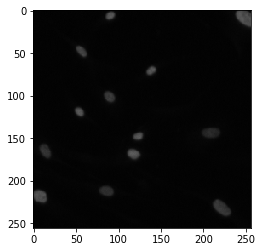

In [33]:
from skimage.io import imread

plt.imshow(imread('../data/stage1_test/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4/images/53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4.png'))
plt.show()

In [25]:
submit_df.iloc[2].ImageId

'53df5150ee56253fe5bc91a9230d377bb21f1300f443ba45a758bcb01a15c0e4'

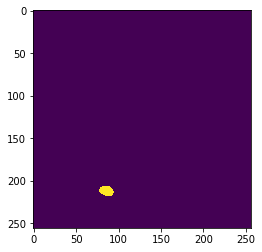

In [54]:
import matplotlib.pyplot as plt
plt.imshow(rle_decode(submit_df.iloc[11].EncodedPixels,[256,256]))
plt.show()

In [6]:
import matplotlib.pyplot as plt

In [9]:
str(np.array([1,2,3]))

'[1 2 3]'

In [13]:
from skimage.morphology import remove_small_holes
from skimage.morphology import binary_dilation

def predict(predict_loader,
            model):
    
    global logger
    global pred_minib_counter
    
    m = nn.Sigmoid()
    model.eval()

    with tqdm.tqdm(total=len(predict_loader)) as pbar:
        for i, (input, target, or_resl, target_resl, img_ids) in enumerate(predict_loader):
            
            temp_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])            
            
            input = input.permute(0,3,1,2).contiguous().float() # .cuda(async=True)
            input_var = torch.autograd.Variable(input, volatile=True)

            # compute output
            output = model(input_var)
            # apply sigmoid to the output
            # because model does not contain one
            output = m(output) 
            
            for i,pred_mask in enumerate(output):

                or_w = or_resl[0][i]
                or_h = or_resl[1][i]
                pred_mask = pred_mask[0,:,:].data.cpu().numpy()
                              
                pred_mask = cv2.resize(pred_mask, (or_h,or_w), interpolation=cv2.INTER_LINEAR)
                pred_mask = (pred_mask>args.ths) * 1
                
                if args.dilate:
                    pred_mask = morphology.binary_dilation(pred_mask, selem=None, out=None)                    
                    
                if args.fill_holes:
                    pred_mask = remove_small_holes(pred_mask, area_threshold=30)                    
                
                labels = apply_wt_boundary(mask_pred=pred_mask,
                                           threshold = args.ths)
                
                
                if args.tensorboard_images:
                    info = {
                        'images': to_np(input),
                        'labels_wt': np.expand_dims(labels,axis=0),
                    }
                    for tag, images in info.items():
                        logger.image_summary(tag, images, pred_minib_counter)
                        
                pred_minib_counter += 1
                
                wt_areas = []
                for j,label in enumerate(np.unique(labels)):
                    if j == 0:
                        # pass the background
                        pass
                    else:
                        wt_areas.append((labels == label) * 1)
               
                for wt_area in wt_areas:
                    append_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])
                    append_df['ImageId'] = [img_ids[i]]
                    append_df['EncodedPixels'] = [' '.join(map(str, rle_encode(wt_area))) ]
                    
                    temp_df = temp_df.append(append_df)
            
            pbar.update(1)            

    return temp_df

# Write auto rescale module

In [43]:
import torch

from utils.RAugs import *
from utils.BAugs import BAugs,BAugsVal,BAugsNoResize,BAugsValNoResize
import pandas as pd
from utils.BDataset import BDatasetResize,BDatasetResizeSeed

train_df = pd.read_pickle('../data/train_df_stage1_meta')
train_df = train_df.reset_index()

test_df = pd.read_pickle('../data/test_df_stage1_meta')
test_df = test_df.reset_index()


train_augs = BAugsNoResize(prob=0.5,
                   mean=(0.485, 0.456, 0.406),
                   std=(0.229, 0.224, 0.225))    

train_dataset = BDatasetResizeSeed(df = train_df,
                 transforms = train_augs,
                 fold_num = 0,
                 mode = 'train',
                 dset_resl = '512x640',
                 erosion_type = 'boundary'                         
                 )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=10,        
    shuffle=True,
    num_workers=1,
    pin_memory=False,
    drop_last=False)

In [44]:
for i, (input, target, or_resl, target_resl) in enumerate(train_loader):
        
    input = input
    target = target[:,:,:,0:3]

    input_var = torch.autograd.Variable(input)
    # target_var = torch.autograd.Variable(target)

    # compute output

    break

In [7]:
input.shape

torch.Size([8, 512, 704, 3])

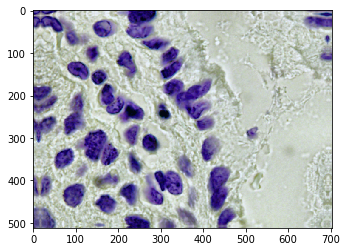

In [9]:
import matplotlib.pyplot as plt

img = input[0,:,:,:].numpy()

img += -img.min()
img *= (1/img.max())

plt.imshow(img, cmap=plt.cm.gray, interpolation='nearest')

plt.show()

In [6]:
msk[:,:,0].sum(),msk[:,:,2].sum()

(4641.33203125, 4616.1171875)

In [21]:
msk[:,:,0].mean()

0.07082110643386841

In [24]:
test_df = pd.DataFrame( data = msk[:,:,0].reshape(-1) )

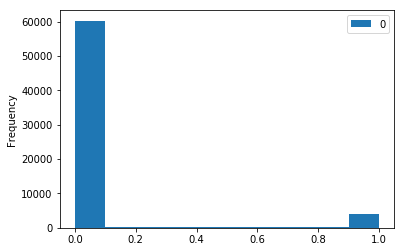

In [26]:
test_df.plot(kind = 'hist')

In [33]:
(msk[:,:,0]<0.00001).sum()

4641.33203125

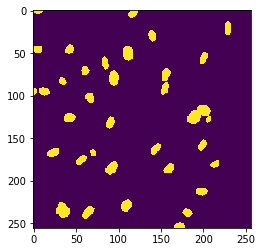

In [39]:
plt.imshow(msk[:,:,0]==1)

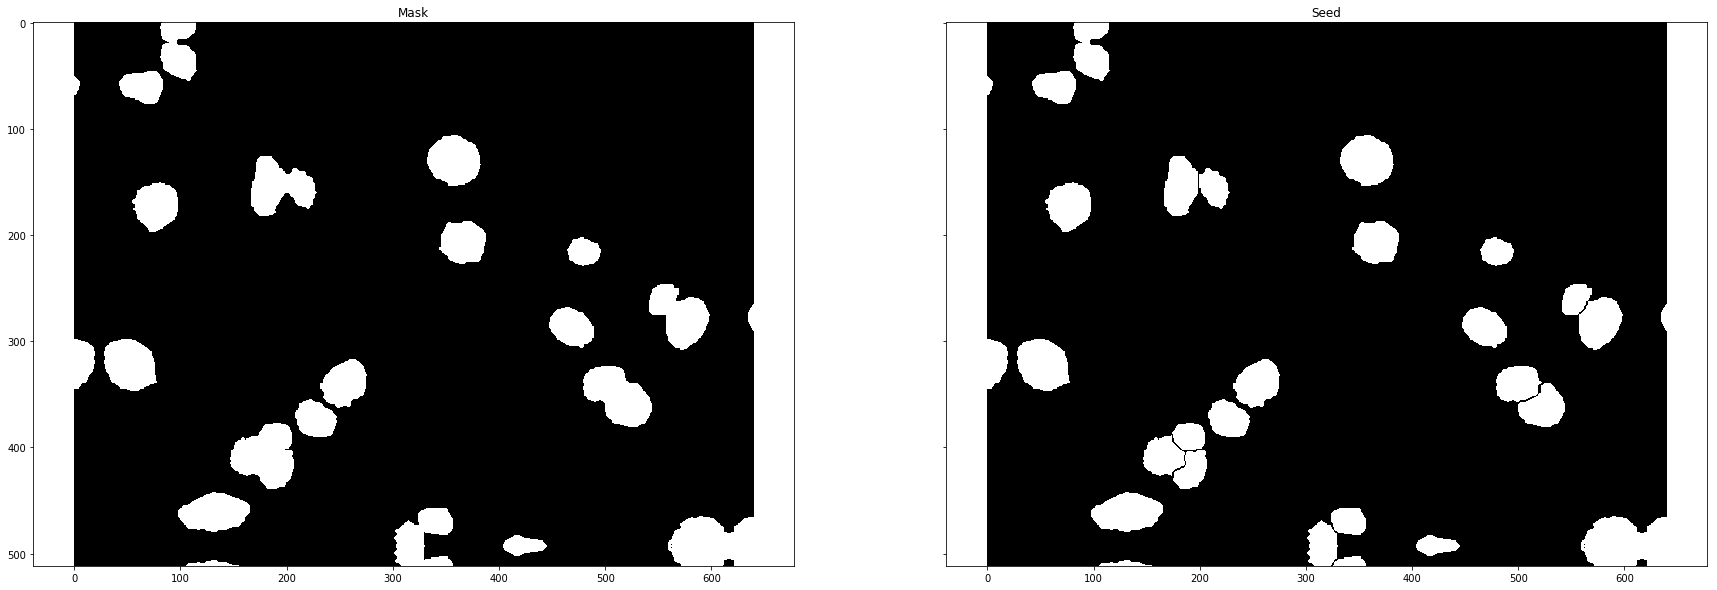

In [47]:
import matplotlib.pyplot as plt

img = input[0,:,:,:].numpy()
msk = target[0,:,:,:].numpy()

fig, axes = plt.subplots(ncols=2, figsize=(30, 10), sharex=True, sharey=True)
ax = axes.ravel()

img += -img.min()
img *= (1/img.max())


# ax[0].imshow(img, cmap=plt.cm.gray, interpolation='nearest')
# ax[0].set_title('Original image')
ax[0].imshow(msk[:,:,0], cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Mask')
# ax[2].imshow(msk[:,:,1], cmap=plt.cm.gray, interpolation='nearest')
# ax[2].set_title('Boundaries')
ax[1].imshow(msk[:,:,2], cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Seed')

plt.show()

In [ ]:
['256x256','520x696','360x360','256x320']

In [46]:
set([53]).remove(52)

KeyError: 52

In [60]:
train_dataset.df[(train_dataset.df.w_h=='260x347')&(~train_dataset.df.index.isin([53]))]

level_0  index                                               path  \
53       53   2506  ../data/stage1_train/7b38c9173ebe69b4c6ba7e703...   

                                               sample    type  \
53  7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46...  images   

                                                  img  width  heigth      w_h  \
53  7b38c9173ebe69b4c6ba7e703c0c27f39305d9b2910f46...    260     347  260x347   

    cluster  
53        0

In [63]:
import os
import cv2
import time
import glob
import numpy as np
import pandas as pd
from scipy import ndimage
import torch.utils.data as data
from skimage.draw import circle
from skimage.morphology import thin
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

# for testing
resolution_dict2 = {
    # resolutions divisible by 16
    '1024x1024':[[1024,1024],[1024,1024]],
    '1040x1388':[[1040,1388],[1056,1376]],    
}

resolution_dict = {
    # resolutions divisible by 16
    '256x256':[[256,256],[256,256]],
    '256x320':[[256,320],[256,320]],
    '1024x1024':[[1024,1024],[1024,1024]],
    '512x640':[[512,640],[512,640]],   
    '260x347':[[260,347],[288,352]], 
    '520x696':[[520,696],[544,704]],    
    '360x360':[[360,360],[384,384]],
    '603x1272':[[603,1272],[608,1280]],
    '1040x1388':[[1040,1388],[1056,1376]],  

    # additional test resolutions    
    '512x680':[[512,680],[544,704]], 
    '519x253':[[519,253],[544,256]],     
    '524x348':[[524,348],[544,352]],  
    '520x348':[[520,348],[544,352]],
    '519x162':[[519,162],[544,160]],
    '519x161':[[519,161],[544,160]],
    '390x239':[[390,239],[416,256]],          
}

class BDatasetResize(data.Dataset):
    def __init__(self,
                 df = None,
                 transforms = None,
                 fold_num = 0, # which fold to use
                 mode = 'train', # 'train', 'val' or 'test'
                 dset_resl = '256x256',
                 erosion_type = 'boundary', # erode or boundary
                 nuclei_size = 4):
        
        bad_idx = [53]
        self.df = df
        self.df = self.df.reset_index()
        self.transforms = transforms
        self.fold_num = fold_num
        self.mode = mode
        self.nuclei_size = nuclei_size
        self.erosion_type = erosion_type
        self.resolution_dict = resolution_dict
        if self.mode in ['train','val']:
            # set indices
            skf = StratifiedKFold(n_splits=4,
                                  shuffle = True,
                                  random_state = 42)

            # stratify fold by cluster number
            f1, f2, f3, f4 = skf.split(self.df.index.values,self.df.cluster.values)
            self.folds = [f1, f2, f3, f4]
            # all train images
            self.train_idx = self.folds[self.fold_num][0]
            self.val_idx = self.folds[self.fold_num][1]
            
            # leave only images with particular resolution
            # also remove idx 53 - broken data there
            self.train_idx = list(set(self.df[(self.df.w_h==dset_resl)&(~self.df.index.isin(bad_idx))].index.values).intersection(set(self.train_idx)))
            self.val_idx = list(set(self.df[(self.df.w_h==dset_resl)&(~self.df.index.isin(bad_idx))].index.values).intersection(set(self.val_idx)))
        else:
            self.train_idx = list(set(self.df[self.df.w_h==dset_resl].index.values))
            
    def __len__(self):
        if self.mode == 'train':
            return len(self.train_idx)
        elif self.mode == 'val':
            return len(self.val_idx)          
        elif self.mode == 'test':  
            return len(self.train_idx) 

    def __getitem__(self, idx):
        if self.mode == 'train':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))

            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 
           
            if self.erosion_type == 'erode':
                # erode a few layers
                masks_thin = np.asarray([(thin(image=mask,max_iter=3)) for mask in masks])
                # replace mask with the eroded version
                mask = np.sum(np.stack(masks_thin, 0), 0)/255.0            
            else:
                # just remove the boundaries
                mask[boundaries] = 0
            
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], self.nuclei_size, mask.shape)
                nuclei_centers[rr, cc] = 1
        elif self.mode == 'val':
            img_glob = glob.glob('../data/stage1_train/{}/images/*.png'.format(self.df.loc[self.val_idx[idx],'sample']))
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(self.df.loc[self.val_idx[idx],'sample']))
            
            masks = imread_collection(mask_glob).concatenate()
            mask = np.sum(np.stack(masks, 0), 0)/255.0
            
            gt_labels = np.zeros((masks.shape[1], masks.shape[2]), np.uint16)
            for index in range(0, masks.shape[0]):
                gt_labels[masks[index] > 0] = index + 1
                
            boundaries = find_boundaries(gt_labels, connectivity=1, mode='outer', background=0) 

            if self.erosion_type == 'erode':
                # erode a few layers
                masks_thin = np.asarray([(thin(image=mask,max_iter=3)) for mask in masks])
                # replace mask with the eroded version
                mask = np.sum(np.stack(masks_thin, 0), 0)/255.0            
            else:
                # just remove the boundaries
                mask[boundaries] = 0            
            
            # boundaries-only mask
            boundaries = boundaries * 1
            img = imread(img_glob[0])[:,:,0:3]
            
            nuclei_centers_coord = [(ndimage.measurements.center_of_mass(_) ) for _ in masks]
            nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
            nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)
            
            for coord in nuclei_centers_coord: 
                rr, cc = circle(coord[0], coord[1], self.nuclei_size, mask.shape)
                nuclei_centers[rr, cc] = 1
        elif self.mode == 'test':
            img_glob = glob.glob('../data/stage1_test/{}/images/*.png'.format(self.df.loc[self.train_idx[idx],'sample']))
            img = imread(img_glob[0])[:,:,0:3]
            
            mask = None
            boundaries = None
            nuclei_centers = None
            
        # estimage image divisibility by 32
        # if the image is not divisible in any of the dimensions, upscale this dimensions
        w,h = img.shape[0],img.shape[1]
        
        if w % 32 != 0:
            target_w = (w//32 + 1) * 32
        else:
            target_w = w
        if h % 32 != 0:
            target_h = (h//32 + 1) * 32
        else:
            target_h = h

        if w != target_w or h != target_h:
            img = cv2.resize(img, (target_h,target_w), interpolation=cv2.INTER_LINEAR)
            
            if mask is not None: 
                msk = np.stack((mask,boundaries,nuclei_centers),axis=2)
                msk = cv2.resize(msk, (target_h,target_w), interpolation=cv2.INTER_LINEAR)
        else:
            msk = np.stack((mask,boundaries,nuclei_centers),axis=2)
        
        if self.transforms is not None:
            if mask is not None:            
                # msk = np.stack((mask,boundaries,nuclei_centers),axis=2)
                img, msk = self.transforms(img, msk)
            else:
                msk = 0
                img, _ = self.transforms(img, None)
        
        # if the image gets flipped, flip it back
        if img.shape[0]!=target_w:
            img = img.transpose(1, 0, 2)
            if mask is not None:
                msk = msk.transpose(1, 0, 2)
        
        return img,msk,(w,h),(target_w,target_h)

In [ ]:
`cv2.findTransformECC(img, ref, np.eye(2, 3, dtype=np.float32), cv2.MOTION_EUCLIDEAN, criteria)` для выравнивания
2. `augment.ScaleAndCrop(scale=0.9858, padding=3)` для исправления кривых данных

# Debug e2e

In [2]:
import numpy as np

np.random.randint(0, 256 - 256)

ValueError: low >= high

In [4]:
#============ Custom tensorboard logging ============#
from utils.TbLogger import Logger

#============ Basic imports ============#
import argparse
import os
import shutil
import time
import tqdm
import glob
from skimage.io import imsave,imread_collection,imread
import pandas as pd
from PIL import Image
import pickle

#============ PyTorch imports ============#
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.backends.cudnn as cudnn
import torch.optim
from torch.optim.lr_scheduler import ReduceLROnPlateau,MultiStepLR
import torch.utils.data
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models
from torch.nn import Sigmoid

#============ Metrics ============#
from sklearn.metrics import f1_score

#============ Models with presets ============#
from models.model_params import model_presets

#============ Loss ============#
from Loss import AVDiceLoss

#============ Utils and augs ============#
from utils.BDataset import BDataset,BDatasetResize,resolution_dict,BDatasetResizeSeed
# exclude 1024x1024 as they spoil the training process
from utils.BDataset import resolution_list as resolution_list
from utils.RAugs import *
from utils.BAugs import BAugsNoResize,BAugsValNoResize
from utils.LRScheduler import CyclicLR
from utils.metric import calculate_ap
from utils.watershed import wt_baseline,wt_seeds
from utils.utils import str2bool,restricted_float,to_np,rle_encode,rle_encoding

from skimage.morphology import remove_small_holes
from skimage.morphology import dilation
from skimage.morphology import reconstruction

parser = argparse.ArgumentParser(description='Kaggle DS Bowl 2018')

#============ basic params ============#
parser.add_argument('--arch', '-a', metavar='ARCH', default='linknet34',
                    help='model architecture')
parser.add_argument('-j', '--workers', default=4, type=int, metavar='N',
                    help='number of data loading workers (default: 4)')
parser.add_argument('--epochs', default=100, type=int, metavar='N',
                    help='number of total epochs to run')
parser.add_argument('--start-epoch', default=0, type=int, metavar='N',
                    help='manual epoch number (useful on restarts)')
parser.add_argument('-b', '--batch-size', default=64, type=int,
                    metavar='N', help='mini-batch size (default: 64)')
parser.add_argument('-nch', '--channels', default=2, type=int,
                    metavar='CN', help='number of mask channels to use (default: 2)')
parser.add_argument('--erosion', metavar='ERSN', default='boundary',
                    help='erosion type - just remove boundary, or erode several pixel layers')
parser.add_argument('--boundary', metavar='THCK', default='outer',
                    help='boundary mode - inner outer or thick')

#============ optimization params ============#
parser.add_argument('--lr', '--learning-rate', default=1e-3, type=float,
                    metavar='LR', help='initial learning rate')
parser.add_argument('--freeze', default=False, type=str2bool,
                    metavar='FR', help='whether to freeze the encoder')
parser.add_argument('--optimizer', '-o', metavar='OPTIMIZER', default='adam',
                    help='model optimizer')
parser.add_argument('-bcew', '--bce_weight', default=1, type=float,
                    help='weight for BCE part of the loss')
parser.add_argument('-dicew', '--dice_weight', default=1, type=float,
                    help='weight for DICE part of the loss')
parser.add_argument("--ths", default=0.3, type=restricted_float,
                    help='threshold applied before watershed transform')

#============ logging params and utilities ============#
parser.add_argument('--print-freq', '-p', default=10, type=int,
                    metavar='N', help='print frequency (default: 10)')
parser.add_argument('--lognumber', '-log', default='test_model', type=str,
                    metavar='LN', help='text id for saving logs')
parser.add_argument('--tensorboard', default=False, type=str2bool,
                    help='Use tensorboard to for loss visualization')
parser.add_argument('--tensorboard_images', default=False, type=str2bool,
                    help='Use tensorboard to see images')
parser.add_argument('--resume', default='', type=str, metavar='PATH',
                    help='path to latest checkpoint (default: none)')

#============ other params ============#
parser.add_argument('-pr', '--predict', dest='predict', action='store_true',
                    help='generate prediction masks')
parser.add_argument('-pr_train', '--predict_train', dest='predict_train', action='store_true',
                    help='generate prediction masks')


#============ Predict / evaluation loop params ============#
parser.add_argument('--dilate', default=False, type=str2bool,
                    metavar='FR', help='whether to dilate masks during test loop')
parser.add_argument('--fill_holes', default=False, type=str2bool,
                    metavar='FR', help='whether to fill holes during test loop')


best_val_f1_score = -1
best_map_score = -1

train_minib_counter = 0
valid_minib_counter = 0
pred_minib_counter = 0

# args = parser.parse_args()

args = type('test', (object,), {})()
args.arch = 'unet11_3'
args.channels = 3
args.lognumber = 'test_postprocessing'
args.tensorboard = False
args.tensorboard_images = False
args.resume = 'weights/unet11_3ch_freeze_ths5_curated_b9_d1_bthick_checkpoint.pth.tar'
args.predict = False
args.predict_train = False
args.freeze = True
args.ths = 0.9
args.batch_size = 6
args.workers = 0
args.dilate = False
args.fill_holes = False
args.reconstruct = False
args.boundary = 'thick'
args.epochs = 301
args.bce_weight = 0.9
args.dice_weight = 0.1
args.optimizer = 'adam'
args.lr = 1e-4
args.validate = False
args.print_freq = 1

print(args)
time.sleep(3)

# remove the log file if it exists if we run the script in the training mode
if not (args.predict or args.predict_train):
    print('Folder {} delete triggered'.format(args.lognumber))
    try:
        shutil.rmtree('tb_logs/{}/'.format(args.lognumber))
    except:
        pass

# Set the Tensorboard logger
if args.tensorboard or args.tensorboard_images:
    logger = Logger('./tb_logs/{}'.format(args.lognumber))

# def main():
global logger, args, best_val_f1_score,best_map_score

print('Using parameter preset {}'.format(args.arch))
print('Model parameters:\n {}'.format(model_presets[args.arch][1]))
model = model_presets[args.arch][0](**model_presets[args.arch][1])

# train on all GPUs for speed
# model = model.cuda()
model = torch.nn.DataParallel(model).cuda()

# freeze the encoder if required
if args.freeze:
    model.module.require_encoder_grad(False)
else:
    model.module.require_encoder_grad(True)

# optionally resume from a checkpoint
if args.resume:
    if os.path.isfile(args.resume):
        print("=> loading checkpoint '{}'".format(args.resume))
        checkpoint = torch.load(args.resume)
        args.start_epoch = checkpoint['epoch']
        best_val_f1_score = checkpoint['best_val_f1_score']
        # best_map_score = checkpoint['best_map_score']
        model.load_state_dict(checkpoint['state_dict'])
        print("=> loaded checkpoint '{}' (epoch {})"
              .format(False, checkpoint['epoch']))
    else:
        print("=> no checkpoint found at '{}'".format(args.resume))
                         
def train(train_loader,
          model,
          criterion,
          optimizer,
          epoch,
          scheduler,
          source_resl,
          target_resl):
                                            
    global train_minib_counter
    global logger
        
    # scheduler.batch_step()
    
    batch_time = AverageMeter()
    data_time = AverageMeter()
    losses = AverageMeter()
    f1_scores = AverageMeter()

    # switch to train mode
    model.train()

    # sigmoid for f1 calculation and illustrations
    m = nn.Sigmoid()    

    end = time.time()
    
    for i, (input, target, or_resl, target_resl,img_sample) in enumerate(train_loader):
        # measure data loading time
        data_time.update(time.time() - end)

        # permute to pytorch format
        input = input.permute(0,3,1,2).contiguous().float().cuda(async=True)
        # take only mask and boundary at first
        target = target[:,:,:,0:args.channels].permute(0,3,1,2).contiguous().float().cuda(async=True)

        input_var = torch.autograd.Variable(input)
        target_var = torch.autograd.Variable(target)

        # compute output
        output = model(input_var)
                                            
        loss = criterion(output, target_var)
 
        # calcuale f1 scores only on inner cell masks
        # weird pytorch numerical issue when converting to float
        target_f1 = (target_var.data[:,0:1,:,:]>args.ths)*1
        f1_scores_batch = batch_f1_score(output = m(output.data[:,0:1,:,:]),
                                   target = target_f1,
                                   threshold=args.ths)

        # measure accuracy and record loss
        losses.update(loss.data[0], input.size(0))
        f1_scores.update(f1_scores_batch, input.size(0))

        # compute gradient and do SGD step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        # log the current lr
        current_lr = optimizer.state_dict()['param_groups'][0]['lr']
                                                          
                                            
        #============ TensorBoard logging ============#
        # Log the scalar values        
        if args.tensorboard:
            info = {
                'train_loss': losses.val,
                'f1_score_train': f1_scores.val,
                'train_lr': current_lr,                
            }
            for tag, value in info.items():
                logger.scalar_summary(tag, value, train_minib_counter)                

        train_minib_counter += 1

        if i % args.print_freq == 0:
            print('Epoch: [{0}][{1}/{2}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Data {data_time.val:.3f} ({data_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'F1   {f1_scores.val:.4f} ({f1_scores.avg:.4f})\t'.format(
                   epoch, i, len(train_loader), batch_time=batch_time,
                   data_time=data_time, loss=losses, f1_scores=f1_scores))

    print(' * Avg Train Loss  {loss.avg:.4f}'.format(loss=losses))
    print(' * Avg F1    Score {f1_scores.avg:.4f}'.format(f1_scores=f1_scores))     
            
    return losses.avg, f1_scores.avg, 0

def validate(val_loader,
             model,
             criterion,
             scheduler,
             source_resl,
             target_resl):
                                
    global valid_minib_counter
    global logger
    
    # scheduler.batch_step()    
    
    batch_time = AverageMeter()
    losses = AverageMeter()
    f1_scores = AverageMeter()
    map_scores = AverageMeter()
    
    # switch to evaluate mode
    model.eval()

    # sigmoid for f1 calculation and illustrations
    m = nn.Sigmoid()      
    
    end = time.time()
    
    all_y_preds = []
    all_gts = []
    all_pred_masks = []
    all_borders = []
    all_seeds = []    
    
    for i, (input, target, or_resl, target_resl,img_sample) in enumerate(val_loader):
        
        # permute to pytorch format
        input = input.permute(0,3,1,2).contiguous().float().cuda(async=True)
        # take only mask and boundary at first
        target = target[:,:,:,0:args.channels].permute(0,3,1,2).contiguous().float().cuda(async=True)

        input_var = torch.autograd.Variable(input, volatile=True)
        target_var = torch.autograd.Variable(target, volatile=True)

        # compute output
        output = model(input_var)
                                            
        loss = criterion(output, target_var)
        
        # go over all of the predictions
        # apply the transformation to each mask
        # calculate score for each of the images
        
        pred_masks = []
        y_preds = []
        gts = []
        averaged_maps = []
        seeds = []
        borders = []
        
        for j,pred_output in enumerate(output):
            or_w = or_resl[0][j]
            or_h = or_resl[1][j]
            
            # take the prediction output and prediction seed
            pred_mask = m(pred_output[0,:,:]).data.cpu().numpy()
            pred_border = m(pred_output[1,:,:]).data.cpu().numpy()
            pred_seed = m(pred_output[2,:,:]).data.cpu().numpy()

            pred_mask = cv2.resize(pred_mask, (or_h,or_w), interpolation=cv2.INTER_LINEAR)
            # pred_mask = (pred_mask>args.ths) * 1
            # pred_mask[pred_mask<args.ths] = 0
            pred_mask = (pred_mask * 255).astype('uint8')
            
            pred_border = cv2.resize(pred_border, (or_h,or_w), interpolation=cv2.INTER_LINEAR)
            pred_border = (pred_border * 255).astype('uint8')   
            
            pred_seed = cv2.resize(pred_seed, (or_h,or_w), interpolation=cv2.INTER_LINEAR)
            pred_seed = (pred_seed * 255).astype('uint8')               
            
            
            if args.dilate:
                pred_mask = dilation(pred_mask, selem=None, out=None)                    
               
            if args.fill_holes:
                pred_mask = remove_small_holes(pred_mask, min_size=30)
                
            if args.reconstruct:
                reconstruction(pred_mask, pred_border, method='dilation', selem=None, offset=None)        
             
            
            # read the original masks for metric evaluation
            mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format(img_sample[j]))
            gt_masks = imread_collection(mask_glob).concatenate()

            # produce labeled prediction
            
            # simple wt
            # y_pred = wt_baseline(pred_mask,threshold = args.ths)
            
            # wt with seeds
            
            y_pred = wt_seeds(img = pred_mask,
                     seed = pred_seed,
                     threshold = args.ths)            
            
            # wt_w_edges
            # y_pred = wt_w_edges(pred_mask,pred_border,threshold = args.ths)
            # y_pred = simple_wt_seeds(img = pred_mask,seed = pred_seed,threshold = 0.5)
        
            # delete the background class
            # y_pred[y_pred==1] = 0
            
            m_ap = calculate_ap(y_pred, gt_masks)
            averaged_maps.append(m_ap[1])
            
            # apply colormap for easier bug fix
            # y_pred = cv2.applyColorMap((y_pred / y_pred.max() * 255).astype('uint8'), cv2.COLORMAP_JET)
            
            y_preds.append(y_pred)
            gts.append(gt_masks)
            pred_masks.append(pred_mask)
            
            seeds.append(pred_seed)
            borders.append(pred_border)          
                                  
            # print('MAP for sample {} is {}'.format(img_sample[j],m_ap))
        
        y_preds = np.asarray(y_preds)
                
        all_y_preds.append(y_preds)
        all_gts.append(gts)
        all_pred_masks.append(pred_masks) 
        
        all_seeds.append(seeds)
        all_borders.append(borders)         
        
        averaged_maps = np.asarray(averaged_maps).mean()
        
        #============ TensorBoard logging ============#                                            
        # Show original images
        # Show nuclei gt masks
        # Show nuclei border masks
        # Show the output nuclei masks                                            
        if args.tensorboard_images:
            if i == 0:
                if args.channels == 2:
                    info = {
                        'images': to_np(input[:5,:,:,:]),
                        'gt_nuclei': to_np(target[:5,0,:,:]),
                        'gt_borders': to_np(target[:5,1,:,:]),
                        'pred_nuclei': to_np(m(output.data[:5,0,:,:])),
                        'pred_borders': to_np(m(output.data[:5,1,:,:])),                     
                    }
                    for tag, images in info.items():
                        logger.image_summary(tag, images, valid_minib_counter)
                elif args.channels == 3:
                    info = {
                        'images': to_np(input[:5,:,:,:]),
                        'gt_nuclei': to_np(target[:5,0,:,:]),
                        'gt_borders': to_np(target[:5,1,:,:]),
                        'gt_seed': to_np(target[:5,2,:,:]),                        
                        'pred_nuclei': to_np(m(output.data[:5,0,:,:])),
                        'pred_borders': to_np(m(output.data[:5,1,:,:])),
                        'pred_seed': to_np(m(output.data[:5,2,:,:])),
                        'pred_wt': y_preds[:5,:,:,:],
                    }
                    for tag, images in info.items():
                        logger.image_summary(tag, images, valid_minib_counter)                        

        # calcuale f1 scores only on inner cell masks
        # weird pytorch numerical issue when converting to float
        target_f1 = (target_var.data[:,0:1,:,:]>args.ths)*1        
        f1_scores_batch = batch_f1_score(output = m(output.data[:,0:1,:,:]),
                                   target = target_f1,
                                   threshold=args.ths)

        # measure accuracy and record loss
        losses.update(loss.data[0], input.size(0))
        f1_scores.update(f1_scores_batch, input.size(0))
        map_scores.update(averaged_maps, input.size(0))  

        # measure elapsed time
        batch_time.update(time.time() - end)
        end = time.time()

        #============ TensorBoard logging ============#
        # Log the scalar values        
        if args.tensorboard:
            info = {
                'valid_loss': losses.val,
                'f1_score_val': f1_scores.val,                
            }
            for tag, value in info.items():
                logger.scalar_summary(tag, value, valid_minib_counter)            
        
        valid_minib_counter += 1
        
        if i % args.print_freq == 0:
            print('Test: [{0}/{1}]\t'
                  'Time {batch_time.val:.3f} ({batch_time.avg:.3f})\t'
                  'Loss {loss.val:.4f} ({loss.avg:.4f})\t'
                  'F1   {f1_scores.val:.4f} ({f1_scores.avg:.4f})\t'
                  'MAP  {map_scores.val:.4f} ({map_scores.avg:.4f})\t'.format(
                   i, len(val_loader), batch_time=batch_time, loss=losses,f1_scores=f1_scores,map_scores=map_scores))

    print(' * Avg Val Loss {loss.avg:.4f}'.format(loss=losses))
    print(' * Avg F1  Score {f1_scores.avg:.4f}'.format(f1_scores=f1_scores))  
    print(' * Avg MAP Score {map_scores.avg:.4f}'.format(map_scores=map_scores))    

    return losses.avg, f1_scores.avg, map_scores.avg,all_y_preds,all_gts,all_pred_masks,all_seeds,all_borders

def predict(predict_loader,
            model):
    
    global logger
    global pred_minib_counter
    
    m = nn.Sigmoid()
    model.eval()

    temp_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])
    
    with tqdm.tqdm(total=len(predict_loader)) as pbar:
        for i, (input, target, or_resl, target_resl, img_ids) in enumerate(predict_loader):
            
            # reshape to PyTorch format
            input = input.permute(0,3,1,2).contiguous().float().cuda(async=True)
            input_var = torch.autograd.Variable(input, volatile=True)

            # compute output
            output = model(input_var)
            
            # apply sigmoid to the output
            # because model does not contain one
            output = m(output) 
            
            for k,pred_mask in enumerate(output):

                or_w = or_resl[0][k]
                or_h = or_resl[1][k]
                pred_mask = pred_mask[0,:,:].data.cpu().numpy()
                              
                pred_mask = cv2.resize(pred_mask, (or_h,or_w), interpolation=cv2.INTER_LINEAR)
                pred_mask = (pred_mask>args.ths) * 1
                
                if args.dilate:
                    pred_mask = binary_dilation(pred_mask, selem=None, out=None)                    
                    
                if args.fill_holes:
                    pred_mask = remove_small_holes(pred_mask, area_threshold=30)                    
                
                labels = apply_wt_boundary(mask_pred=pred_mask,
                                           threshold = args.ths)
                
                
                if args.tensorboard_images:
                    info = {
                        'images': to_np(input),
                        'labels_wt': np.expand_dims(labels*2,axis=0),
                    }
                    for tag, images in info.items():
                        logger.image_summary(tag, images, pred_minib_counter)
                        
                pred_minib_counter += 1
                
                wt_areas = []
                for j,label in enumerate(np.unique(labels)):
                    if j == 0:
                        # pass the background
                        pass
                    else:
                        wt_areas.append((labels == label) * 1)
               
                for wt_area in wt_areas:
                    append_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])
                    append_df['ImageId'] = [img_ids[k]]
                    append_df['EncodedPixels'] = [' '.join(map(str, rle_encoding(wt_area))) ]
                    
                    temp_df = temp_df.append(append_df)
            
            pbar.update(1)            

    return temp_df

def save_checkpoint(state, is_best, filename, best_filename):
    torch.save(state, filename)
    if is_best:
        shutil.copyfile(filename, best_filename)

class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

def adjust_learning_rate(optimizer, epoch):
    """Sets the learning rate to the initial LR decayed by 0.1 every 50 epochs"""
    lr = args.lr * (0.9 ** ( (epoch+1) // 50))
    for param_group in optimizer.state_dict()['param_groups']:
        param_group['lr'] = lr

def batch_f1_score(output,
                   target,
                   threshold = 0.3):
    if (target.size() != output.size()):
        raise ValueError('Preds shape <> output shape')        
    batch_size = target.size(0)
    res = []
    for i in range(0,batch_size):
        if (((output[i,:,:,:].view(-1).cpu().numpy()>threshold)*1).sum() == 0)\
            and (target[i,:,:,:].view(-1).cpu().numpy().sum() == 0):
            res.append(1)
        elif (((output[i,:,:,:].view(-1).cpu().numpy()>threshold)*1).sum() > 0)\
            and (target[i,:,:,:].view(-1).cpu().numpy().sum() == 0):
            res.append(0)            
        elif (((output[i,:,:,:].view(-1).cpu().numpy()>threshold)*1).sum() == 0)\
            and (target[i,:,:,:].view(-1).cpu().numpy().sum() > 0):
            res.append(0)
        else:
            y_true = target[i,:,:,:].view(-1).cpu().numpy()
            y_pred = (output[i,:,:,:].view(-1).cpu().numpy()>threshold)*1
            res.append(f1_score(y_true, y_pred))

    return sum(res) / float(len(res))       
        
def accuracy(output, target, topk=(1,)):
    """Computes the precision@k for the specified values of k"""
    maxk = max(topk)
    batch_size = target.size(0)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = correct[:k].view(-1).float().sum(0)
        res.append(correct_k.mul_(100.0 / batch_size))
    return res

# if __name__ == '__main__':
#    main()

Folder test_postprocessing delete triggered
Using parameter preset unet11_3
Model parameters:
 {'num_classes': 3, 'num_channels': 3}
=> loading checkpoint 'weights/unet11_3ch_freeze_ths5_curated_b9_d1_bthick_checkpoint.pth.tar'
=> loaded checkpoint 'False' (epoch 300)


In [45]:
args.ths = 0.5
args.dilate = False
args.fill_holes = False
args.reconstruct = False
args.print_freq = 5


resolution_list = [
    ['256x256',[256,256],[256,256]],
]


resolution_list = [
    # resolutions divisible by 16
    ['256x256',[256,256],[256,256]],
    ['360x360',[360,360],[384,384]],  
    ['520x696',[520,696],[544,704]],   
    ['256x320',[256,320],[256,320]],    
    ['260x347',[260,347],[288,352]], 
    ['512x640',[512,640],[512,640]],   
    ['603x1272',[603,1272],[608,1280]],    
    ['1040x1388',[1040,1388],[1056,1376]],  
]



In [48]:
# predict loops
if (args.predict or args.predict_train):
    if args.dilate:
        print('Dilation activated ...')
    if args.fill_holes:        
        print('Fill holes activated ...')

    # read the test df    
    test_df = pd.read_pickle('../data/test_df_stage1_meta')
    test_df = test_df.reset_index() 

    test_resl_list = list(test_df.w_h.unique())
    submit_df = pd.DataFrame(columns = ['ImageId','EncodedPixels'])

    for test_resl in test_resl_list:

        print('Predicting for the resolution {} ...' .format(test_resl))        

        predict_augs = BAugsValNoResize(mean=model.module.mean,
                                        std=model.module.std)          

        predict_dataset = BDatasetResizeSeed(df = test_df,
                         transforms = predict_augs,
                         fold_num = 0,
                         mode = 'test',
                         dset_resl = test_resl 
                         )

        predict_loader = torch.utils.data.DataLoader(
            predict_dataset,
            batch_size=args.batch_size,        
            shuffle=False,
            num_workers=args.workers,
            pin_memory=False,
            drop_last=False)

        rle_nuclei = predict(predict_loader,
                             model)

        del predict_dataset,predict_loader,predict_augs

        submit_df = submit_df.append(rle_nuclei)

    print('Saving submission df ...')
    submit_df = submit_df.set_index('ImageId')
    submit_df = submit_df.sort_index()
    submit_df.to_csv('../submissions/{}.csv'.format(args.lognumber))

# train loop
else:
    # read the train df    
    train_df = pd.read_pickle('../data/train_df_stage1_meta')
    train_df = train_df.reset_index()

    criterion = AVDiceLoss(bce_weight=float(args.bce_weight),
                           dice_weight=float(args.dice_weight)).cuda()

    if args.optimizer.startswith('adam'):           
        optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)
    elif args.optimizer.startswith('rmsprop'):
        optimizer = torch.optim.RMSprop(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)
    elif args.optimizer.startswith('sgd'):
        optimizer = torch.optim.SGD(filter(lambda p: p.requires_grad, model.parameters()), # Only finetunable params
                                    lr = args.lr)        
    else:
        raise ValueError('Optimizer not supported')        


    # scheduler = ReduceLROnPlateau(optimizer = optimizer,
    #                                           mode = 'max',
    #                                          factor = 0.1,
    #                                          patience = 5,
    #                                          verbose = True,
    #                                          threshold = 1e-3,
    #                                          min_lr = 1e-6
    #                                          )

    scheduler = MultiStepLR(optimizer, milestones=[50,200], gamma=0.1)    

    # resolution is embedded into the augment call itself
    train_augs = BAugsNoResize(prob=0.5,
                       mean=model.module.mean,
                       std=model.module.std)

    val_augs = BAugsValNoResize(mean=model.module.mean,
                        std=model.module.std)    

    # scheduler = MultiStepLR(optimizer,
    #                         milestones=[2,15],
    #                        gamma=1e-1)

    # scheduler = CyclicLR(optimizer = optimizer,
    #                                 base_lr = 1e-6,
    #                                 max_lr = 1e-4,
    #                                 step_size = 1200,
    #                                 mode = 'triangular'                                         
    #                                )



    for epoch in range(args.start_epoch, args.epochs):
        scheduler.step()
        # loop over each resolution in the dataset

        train_dset_lengths = []
        val_dset_lengths = []

        train_losses = []
        val_losses = []

        train_f1_scores = []
        val_f1_scores = []

        train_map_scores = []
        val_map_scores = []

        # resolution order is shuffled each time
        for resl_key,source_resl,target_resl in resolution_list:

            # rule of thumb - train only on on normal / similar / abundand data 
            # on earlier epochs
            # on later epochs train on all of the data
            if epoch < 25 and resl_key not in ['256x256','520x696','360x360','256x320']:
                print('Passing on {} on earlier epochs'.format(resl_key))
            else:
                # for resl_key,source_resl,target_resl in resolution_list:
                # we will need to resize back to calculate metrics                

                # ready for k-fold training
                train_dataset = BDatasetResizeSeed(df = train_df,
                                 transforms = train_augs,
                                 fold_num = 0,
                                 mode = 'train',
                                 dset_resl = resl_key,
                                 boundary_mode = args.boundary
                                 )

                val_dataset = BDatasetResizeSeed(df = train_df,
                                 transforms = val_augs,
                                 fold_num = 0,
                                 mode = 'val',
                                 dset_resl = resl_key,
                                 boundary_mode = args.boundary

                                 )

                print('Training on {} resl\tTrain/val dataset length {}/{}'.format(resl_key,len(train_dataset),len(val_dataset)))                
                train_loader = torch.utils.data.DataLoader(
                    train_dataset,
                    batch_size=args.batch_size,        
                    shuffle=True,
                    num_workers=args.workers,
                    pin_memory=True,
                    drop_last=False)

                val_loader = torch.utils.data.DataLoader(
                    val_dataset,
                    batch_size=args.batch_size,        
                    shuffle=True,
                    num_workers=args.workers,
                    pin_memory=True,
                    drop_last=False)

                """
                if len(train_dataset)>0:
                    # train for one epoch
                    train_loss, train_f1_score, train_map_score = train(train_loader,
                                                                        model,
                                                                        criterion,
                                                                        optimizer,
                                                                        epoch,
                                                                        scheduler,
                                                                        source_resl,
                                                                        target_resl)
                    train_dset_lengths.append(len(train_dataset))
                    train_losses.append(train_loss)
                    train_f1_scores.append(train_f1_score)
                    train_map_scores.append(train_map_score)

                    torch.cuda.empty_cache()
                """

                if len(val_dataset)>0:
                    # evaluate on validation set
                    val_loss, val_f1_score, val_map_score,all_y_preds,all_gts,all_pred_masks,all_seeds,all_borders = validate(val_loader,
                                                                     model,
                                                                     criterion,
                                                                     scheduler,
                                                                     source_resl,
                                                                     target_resl)
                    val_dset_lengths.append(len(val_dataset))
                    val_losses.append(val_loss)
                    val_f1_scores.append(val_f1_score)
                    val_map_scores.append(val_map_score)

                    torch.cuda.empty_cache()
            
        # add code for early stopping here 
        # 
        #

        # calculate averages for the epoch across the resolutions
        # weight by the number of training samples

        # train_loss_avg = np.inner(np.asarray(train_losses),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_loss_avg = np.inner(np.asarray(val_losses),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()

        # train_f1_avg = np.inner(np.asarray(train_f1_scores),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_f1_avg = np.inner(np.asarray(val_f1_scores),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()

        # train_map_avg = np.inner(np.asarray(train_map_scores),np.asarray(train_dset_lengths)) / np.asarray(train_dset_lengths).sum()
        val_map_avg = np.inner(np.asarray(val_map_scores),np.asarray(val_dset_lengths)) / np.asarray(val_dset_lengths).sum()

        print('AVERAGE MAP SCORE {}'.format(val_map_avg))
        
        #============ TensorBoard logging ============#
        # Log the scalar values        
        if args.tensorboard:
            info = {
                'train_epoch_loss': train_loss_avg,
                'valid_epoch_loss': val_loss_avg,
                'train_epoch_f1': train_f1_avg,
                'valid_epoch_f1': val_f1_avg,
                # 'train_epoch_map': train_map_avg,
                # 'valid_epoch_map': val_map_avg,                    
            }
            for tag, value in info.items():
                logger.scalar_summary(tag, value, epoch+1)                     

        # at first optimize by f1 score                                            
        # scheduler.step(val_f1_avg)   

        # remember best model
        """
        is_best = val_f1_avg > best_val_f1_score
        best_val_f1_score = max(val_f1_avg, best_val_f1_score)
        save_checkpoint({
            'epoch': epoch + 1,
            'arch': args.arch,
            'state_dict': model.state_dict(),
            'best_val_f1_score': val_f1_avg,
        },
        is_best,
        'weights/{}_checkpoint.pth.tar'.format(str(args.lognumber)),
        'weights/{}_best.pth.tar'.format(str(args.lognumber))
        )
        """
                

Training on 256x256 resl	Train/val dataset length 250/84
Test: [0/14]	Time 0.480 (0.480)	Loss 0.1729 (0.1729)	F1   0.9337 (0.9337)	MAP  0.5238 (0.5238)	
Test: [5/14]	Time 0.383 (0.404)	Loss 0.1343 (0.1571)	F1   0.9389 (0.9199)	MAP  0.5157 (0.4655)	
Test: [10/14]	Time 0.460 (0.404)	Loss 0.1876 (0.1592)	F1   0.8855 (0.9147)	MAP  0.3259 (0.4530)	
 * Avg Val Loss 0.1610
 * Avg F1  Score 0.9140
 * Avg MAP Score 0.4654
Training on 360x360 resl	Train/val dataset length 68/23
Test: [0/4]	Time 0.830 (0.830)	Loss 0.1808 (0.1808)	F1   0.9475 (0.9475)	MAP  0.4059 (0.4059)	
 * Avg Val Loss 0.1689
 * Avg F1  Score 0.9609
 * Avg MAP Score 0.5013
Training on 520x696 resl	Train/val dataset length 73/19
Test: [0/4]	Time 3.893 (3.893)	Loss 0.1618 (0.1618)	F1   0.9442 (0.9442)	MAP  0.5410 (0.5410)	
 * Avg Val Loss 0.1670
 * Avg F1  Score 0.9523
 * Avg MAP Score 0.5218
Training on 256x320 resl	Train/val dataset length 83/29
Test: [0/5]	Time 0.582 (0.582)	Loss 0.2258 (0.2258)	F1   0.8879 (0.8879)	MAP  0.180

66

49


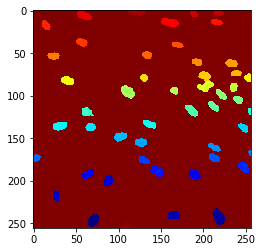

In [33]:
test_labels = wt_seeds(img = all_pred_masks[batch][idx],
                       seed = all_seeds[batch][idx],
                       threshold = 0.9)

test_labels_coloured = cv2.applyColorMap((test_labels / test_labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET)  

print(test_labels.max())
plt.imshow(test_labels_coloured)
plt.show()

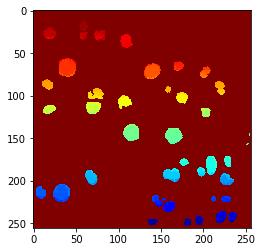

In [34]:
test_labels = wt_seeds(img = all_pred_masks[batch][idx],
                       seed = all_seeds[batch][idx],
                       threshold = 0.9)

test_labels_coloured = cv2.applyColorMap((test_labels / test_labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET)  

plt.imshow(test_labels_coloured)
plt.show()

In [49]:
import glob
import numpy as np

from scipy import ndimage as ndi

import skimage
from skimage.morphology import square
from skimage.morphology import dilation
from skimage.morphology import watershed
from skimage.morphology import binary_erosion
from skimage.feature import peak_local_max
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from skimage.filters import sobel
from skimage.measure import label,regionprops

from scipy import ndimage as ndi

def wt_seeds(img = None,
             seed = None,
             threshold = 0.5):

    # img and seed are 0-255 images

    # threshold the img
    img = 1 * (img > 255 * threshold)
    
    # filter low confidence values for the seed
    # seed[seed < 255 * threshold] = 0
    seed = 1 * (seed > 255 * threshold)
    
    seed_labels = label(seed)
    
    # remove the background label and count seed objects
    seeds = []
    # ignore the background
    for i in range(1,seed_labels.max()):
        seeds.append((seed_labels==i)*1)

    # find nuclei centers by measuring mass center
    seed_center_coords = [(ndi.measurements.center_of_mass(_) ) for _ in seeds]
    seed_center_coords = [(int(_[0]),int(_[1])) for _ in seed_center_coords]

    seed_centers = np.zeros((img.shape[0], img.shape[1]), dtype=bool)
    
    # create a mask with seed centers
    for coord in seed_center_coords:
        seed_centers[coord[0],coord[1]] = True

    # pad 10 pixels to masks
    # border objects are found better this way
    
    img_mask = skimage.util.pad(array=img,
                                pad_width=10,
                                mode='constant')
    seed_centers = skimage.util.pad(array=seed_centers,
                                    pad_width=10,
                                    mode='constant',
                                    constant_values=[True])


    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(img_mask)

    markers = ndi.label(seed_centers)[0]

    labels = watershed(-distance,
                       markers,
                       mask=img_mask)

    labels = labels[10:-10,10:-10]
    img_mask = img_mask[10:-10,10:-10]
    
    return labels

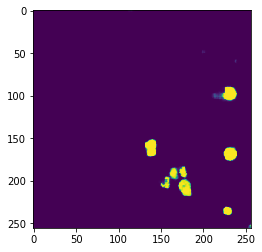

In [11]:
plt.imshow(all_pred_masks[batch][idx])

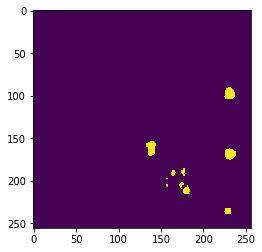

In [12]:
plt.imshow(all_seeds[batch][idx]>255*0.9)

In [ ]:
,,all_borders

In [8]:
y_pred_coloured.shape

(256, 256, 3)

In [9]:
gt_coloured.shape

(256, 256, 3)

Current score is ([0.9166666666666666, 0.9166666666666666, 0.9166666666666666, 0.7692307692307693, 0.5333333333333333, 0.2777777777777778, 0.09523809523809523, 0.0, 0.0, 0.0], 0.4425579975579976)


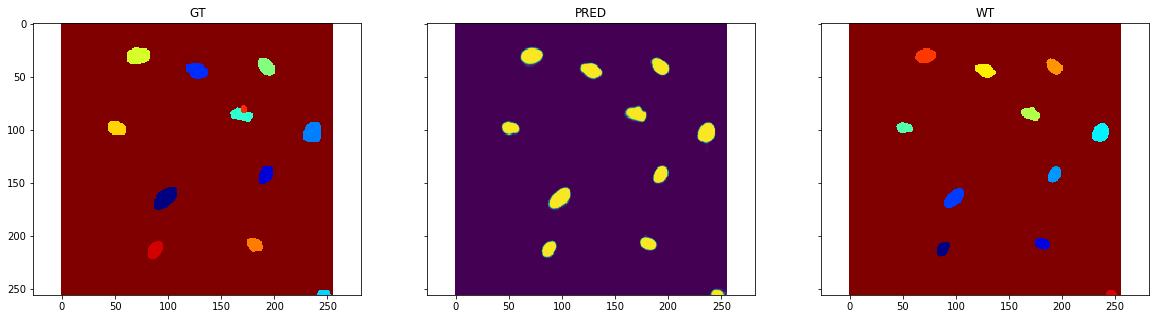

In [37]:
import matplotlib.pyplot as plt

batch = 0
idx = 1

fig, axes = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
ax = axes.ravel()

gts = all_gts[batch][idx]
            
gt_coloured = np.zeros((gts.shape[1], gts.shape[2]), np.uint16)
for index in range(0, gts.shape[0]):
    gt_coloured[gts[index] > 0] = index + 1          

    
print('Current score is {}'.format(calculate_ap(all_y_preds[batch][idx], gts)))

gt_coloured = cv2.applyColorMap((gt_coloured / gt_coloured.max() * 255).astype('uint8'), cv2.COLORMAP_JET)    
y_pred_coloured = cv2.applyColorMap((all_y_preds[batch][idx] / all_y_preds[batch][idx].max() * 255).astype('uint8'), cv2.COLORMAP_JET)   


ax[0].imshow(gt_coloured)
ax[0].set_title('GT')

ax[1].imshow(all_pred_masks[batch][idx])
ax[1].set_title('PRED')

ax[2].imshow(y_pred_coloured)
ax[2].set_title('WT')

plt.show()



Basic watershed
```
thick weights,     use mask, ths 0.9,  no_dil, no_rec, no_fill 0.48492274045638323
thick weights,     use mask, ths 0.9,  no_dil, no_rec, no_fill 0.4967501243699535 (wo 1024x1024)
thick weights,     use mask, ths 0.9,  no_dil, no_rec, no_fill 0.49163375500488815 (wo 1024x1024, play with markers)

wt + edges from the CNN - worse
wt + seed from the CNN - worse 0.39

thick weights,     use mask, ths 0.9,  no_dil, no_rec, no_fill 0.44824622345448245 (wo 1024x1024, edges from the CNN) 


thick weights,     use mask, ths 0.9,  no_dil, no_rec, no_fill 0.48845751575511465 (wo 1024x1024 + remove border)

thick weights,     use mask, ths 0.9,  w_dil,  no_rec, no_fill 0.39603568924461174

thick weights,     use mask, ths 0.8,  no_dil, no_rec, no_fill 0.48073736753786506
thick weights,     use mask, ths 0.95, no_dil, no_rec, no_fill 0.48443790875155174
thick weights,     use mask, ths 0.99, no_dil, no_rec, no_fill 0.46956063212846366
thick weights,     use mask, ths 0.7,  no_dil, no_rec, no_fill 0.47678539715587814

non thick weights, use mask, ths 0.8,  no_dil, no_rec, no_fill 0.48073736753786517
non thick weights, use mask, ths 0.9,  no_dil, no_rec, no_fill 0.4849227404563833 


```

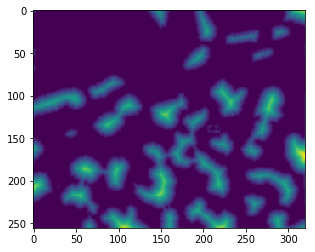

In [247]:
distance = ndi.distance_transform_edt(all_pred_masks[batch][idx]>0.9)

plt.imshow(distance)
plt.show()

In [243]:
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),
                        labels=all_pred_masks[batch][idx])

markers = ndi.label(local_maxi)[0]

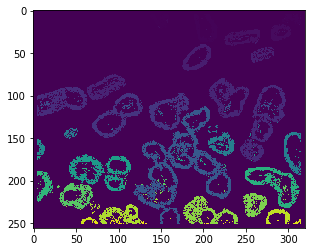

In [245]:
plt.imshow(markers)
plt.show()

In [268]:
all_borders[batch][idx]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

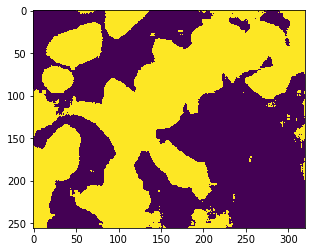

In [293]:
plt.imshow(all_pred_masks[batch][idx])
plt.show()

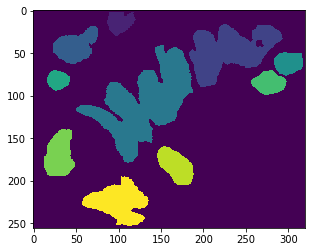

In [291]:
plt.imshow(simple_wt_seeds(all_pred_masks[batch][idx],
                all_seeds[batch][idx]))

plt.show()

In [289]:
def simple_wt_seeds(img = None,
              seed = None,
              threshold = 0.5):

    # Make segmentation using edge-detection and watershed.
    edges = sobel(img)

    # Identify some background and foreground pixels from the intensity values.
    # These pixels are used as seeds for watershed.
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[seed < threshold * 255 // 2] = background
    markers[seed > 0.99 * 255] = foreground

    ws = watershed(edges, markers, mask = img)
    labels = label(ws == foreground)
    
    return labels

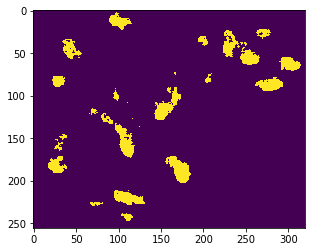

In [288]:
plt.imshow(all_seeds[batch][idx] > 255* 0.99)
plt.show()

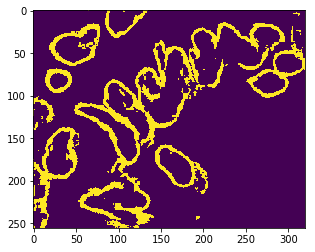

In [284]:
plt.imshow(all_borders[batch][idx] > 255 * 0.1)
plt.show()

In [252]:
def wt_distance(img = None):
    
    edges = sobel(img)    

    distance = ndi.distance_transform_edt(img)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),
                            labels=img)
    
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=edges)


    return labels

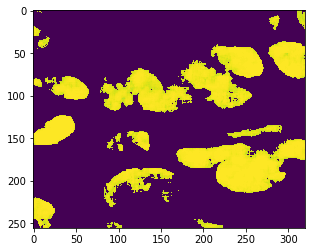

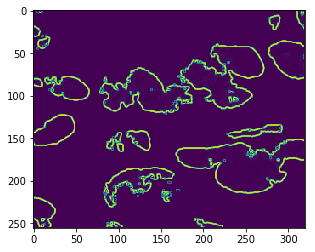

In [316]:
temp_img = np.copy(all_pred_masks[batch][idx])

temp_img[temp_img < 255 * 0.9] = 0 

plt.imshow(temp_img)
plt.show()

plt.imshow(sobel(temp_img) )
plt.show()

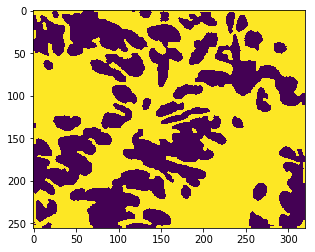

In [12]:
plt.imshow(all_y_preds[batch][idx] == 0)

Current score is ([0.13333333333333333, 0.12396694214876033, 0.11475409836065574, 0.0967741935483871, 0.05426356589147287, 0.05426356589147287, 0.05426356589147287, 0.022556390977443608, 0.0, 0.0], 0.06541756560429987)


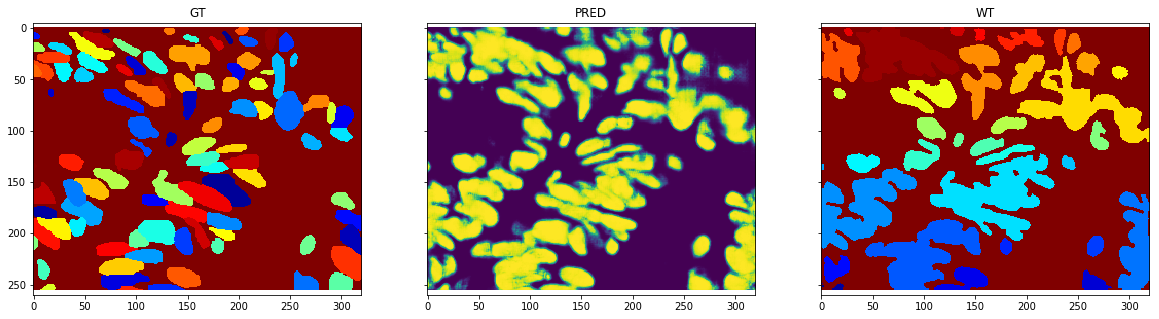

In [11]:
import matplotlib.pyplot as plt

batch = 0
idx = 3

fig, axes = plt.subplots(ncols=3, figsize=(20, 5), sharex=True, sharey=True)
ax = axes.ravel()

gts = all_gts[batch][idx]
            
gt_coloured = np.zeros((gts.shape[1], gts.shape[2]), np.uint16)
for index in range(0, gts.shape[0]):
    gt_coloured[gts[index] > 0] = index + 1          

    
print('Current score is {}'.format(calculate_ap(all_y_preds[batch][idx], gts)))

gt_coloured = cv2.applyColorMap((gt_coloured / gt_coloured.max() * 255).astype('uint8'), cv2.COLORMAP_JET)    
y_pred_coloured = cv2.applyColorMap((all_y_preds[batch][idx] / all_y_preds[batch][idx].max() * 255).astype('uint8'), cv2.COLORMAP_JET)   


ax[0].imshow(gt_coloured)
ax[0].set_title('GT')

ax[1].imshow(all_pred_masks[batch][idx])
ax[1].set_title('PRED')

ax[2].imshow(y_pred_coloured)
ax[2].set_title('WT')

plt.show()



In [6]:
from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data
from scipy import ndimage as ndi
from skimage.feature import peak_local_max

def simple_wt(img = None,
              threshold = 0.5):

    # Make segmentation using edge-detection and watershed.
    edges = sobel(img)

    # Identify some background and foreground pixels from the intensity values.
    # These pixels are used as seeds for watershed.
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[img < threshold * 255 // 2] = background
    markers[img > threshold * 255] = foreground

    ws = watershed(edges, markers)
    labels = label(ws == foreground)
    
    return labels

def simple_wt_edges(img = None,
               edges = None,
               threshold = 0.5):

    # Identify some background and foreground pixels from the intensity values.
    # These pixels are used as seeds for watershed.
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[img < threshold * 255 // 2] = background
    markers[img > threshold * 255] = foreground

    ws = watershed(edges, markers)
    labels = label(ws == foreground)
    
    return labels

def simple_wt_seeds(img = None,
              seed = None,
              threshold = 0.5):

    # Make segmentation using edge-detection and watershed.
    edges = sobel(img)

    # Identify some background and foreground pixels from the intensity values.
    # These pixels are used as seeds for watershed.
    markers = np.zeros_like(img)
    foreground, background = 1, 2
    markers[seed < threshold * 255 // 2] = background
    markers[seed > threshold * 255] = foreground

    ws = watershed(edges, markers, mask = img)
    labels = label(ws == foreground)
    
    return labels

def wt_distance(img = None):

    distance = ndi.distance_transform_edt(img)
    local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((10, 10)),
                            labels=img)
    
    markers = ndi.label(local_maxi)[0]
    labels = watershed(-distance, markers, mask=img)

    return labels

In [ ]:

local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),
                            labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint64 to float64
  .format(dtypeobj_in, dtypeobj_out))


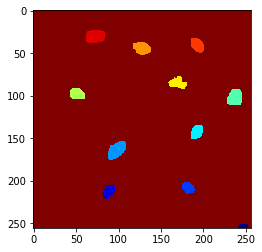

In [92]:
batch = 2
idx = 4

labels = simple_wt(np.sum(all_gts[batch][idx], 0))
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET)

plt.imshow(labels)
plt.show()

/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from uint64 to float64
  .format(dtypeobj_in, dtypeobj_out))


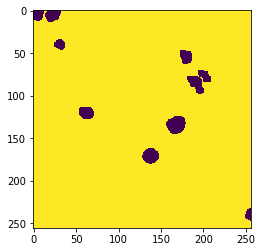

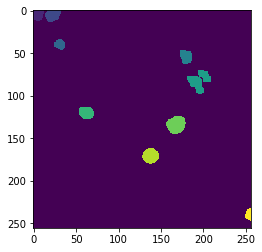

In [69]:
import numpy as np
import matplotlib.pyplot as plt

from skimage.filters import sobel
from skimage.measure import label
from skimage.segmentation import slic, join_segmentations
from skimage.morphology import watershed
from skimage.color import label2rgb
from skimage import data


coins = data.coins()
coins =  np.sum(all_gts[batch][idx], 0)

# Make segmentation using edge-detection and watershed.
edges = sobel(coins)

# Identify some background and foreground pixels from the intensity values.
# These pixels are used as seeds for watershed.
markers = np.zeros_like(coins)
foreground, background = 1, 2
markers[coins < 30.0] = background
markers[coins > 150.0] = foreground

ws = watershed(edges, markers)
seg1 = label(ws == foreground)

plt.imshow(ws)
plt.show()
plt.imshow(seg1)
plt.show()

# seg1 = cv2.applyColorMap((seg1 / seg1.max() * 255).astype('uint8'), cv2.COLORMAP_JET)




In [ ]:
# Make segmentation using SLIC superpixels.
seg2 = slic(coins, n_segments=117, max_iter=160, sigma=1, compactness=0.75,
            multichannel=False)

# Combine the two.
segj = join_segmentations(seg1, seg2)

# Show the segmentations.
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(9, 5),
                         sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(coins, cmap='gray')
ax[0].set_title('Image')

color1 = label2rgb(seg1, image=coins, bg_label=0)
ax[1].imshow(color1)
ax[1].set_title('Sobel+Watershed')

color2 = label2rgb(seg2, image=coins, image_alpha=0.5)
ax[2].imshow(color2)
ax[2].set_title('SLIC superpixels')

color3 = label2rgb(segj, image=coins, image_alpha=0.5)
ax[3].imshow(color3)
ax[3].set_title('Join')

for a in ax:
    a.axis('off')
fig.tight_layout()
plt.show()

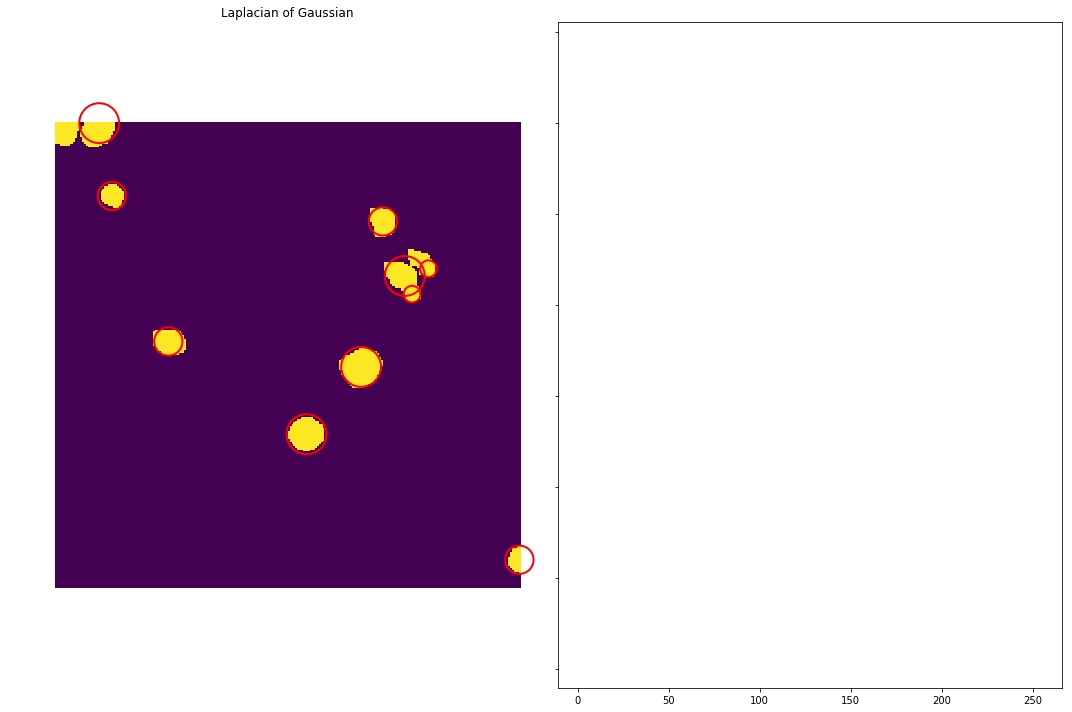

In [41]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt


image = np.sum(all_gts[batch][idx], 0)/255.0 
image_gray = rgb2gray(np.sum(all_gts[batch][idx], 0)/255.0 )

blobs_log = blob_log(image_gray, max_sigma=10, num_sigma=5, threshold=.5)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_list = [blobs_log]
colors = ['red']
titles = ['Laplacian of Gaussian']

sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(15, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

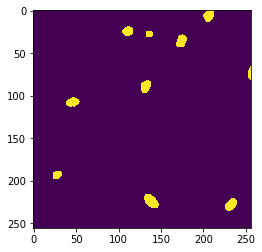

In [13]:
import matplotlib.pyplot as plt

plt.
plt.show()

In [29]:
len(all_y_preds)

14

In [10]:
all_y_preds[0][1].max()

255

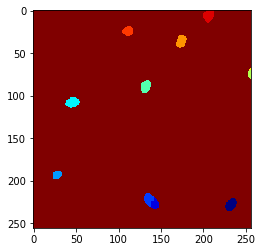

In [14]:
import matplotlib.pyplot as plt

plt.imshow(all_y_preds[0][1])
plt.show()

In [5]:
all_gts[0][0].shape

(15, 256, 256)

In [15]:
np.unique(all_y_preds[0][0])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [14]:
all_y_preds[0][0]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [18]:
all_y_preds[]

SyntaxError: invalid syntax (<ipython-input-18-37da028a6453>, line 1)

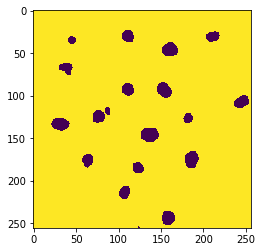

# Try additional wt variants

In [1]:
from utils.watershed import wt_baseline,wt_seeds,wt_seeds2

In [2]:
from skimage.io import imread
mask = imread('mask.png')
seed = imread('seed.png')

In [9]:
mask_ths = (mask > 255 * 0.9) * 1

In [14]:
np.all(mask_ths == 1, axis=-1)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [28]:
indices = np.where(mask_ths == 1)
coords = list(zip(indices[0], indices[1]))
coords = np.asarray(coords)

In [30]:
coords.shape,X.shape

((42284, 2), (10000, 2))

number of estimated clusters : 18


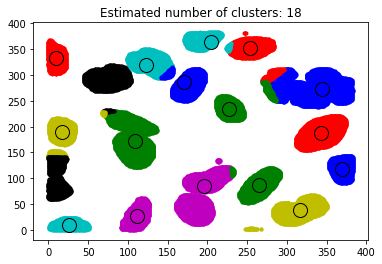

In [35]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
from sklearn.datasets.samples_generator import make_blobs

X = coords

# #############################################################################
# Compute clustering with MeanShift

# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.05, n_samples=256)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

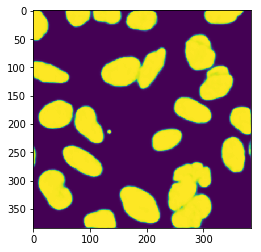

In [6]:
plt.imshow(mask)
plt.show()

In [4]:
def wt_seeds2(img = None,
             seed = None,
             threshold = 0.5):

    # img and seed are 0-255 images

    # threshold the img
    img_ths = 1 * (img > 255 * threshold)
    
    # filter low confidence values for the seed
    seed_ths = 1 * (seed > 255 * threshold)

    # pad 10 pixels to masks
    # border objects are found better this way
    
    img_ths = skimage.util.pad(array=img_ths,
                                pad_width=10,
                                mode='constant')
    
    seed_ths = skimage.util.pad(array=seed_ths,
                                pad_width=10,
                                mode='constant')    


    # Now we want to separate the two objects in image
    # Generate the markers as local maxima of the distance to the background
    distance = ndi.distance_transform_edt(seed_ths)

    # also threshold the distance
    markers = ndi.label(distance>0.5*distance.max())[0]

    labels = watershed(-distance,
                       markers,
                       mask=img_mask)

    labels = labels[10:-10,10:-10]
    img_mask = img_mask[10:-10,10:-10]
    
    return labels

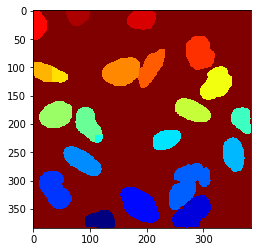

In [4]:
import cv2
from matplotlib import pyplot as plt

wt1 = wt_seeds2(mask,seed,0.9)
wt1 = cv2.applyColorMap((wt1 / wt1.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.imshow(wt1)
plt.show()

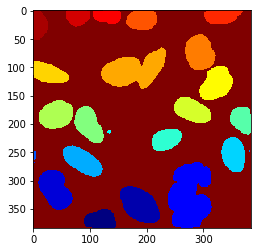

In [77]:
import cv2

wt1 = wt_baseline(mask,0.9)
wt1 = cv2.applyColorMap((wt1 / wt1.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.imshow(wt1)
plt.show()

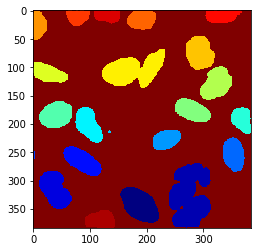

In [78]:
import cv2

wt1 = wt_seeds(mask,seed,0.9)
wt1 = cv2.applyColorMap((wt1 / wt1.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.imshow(wt1)
plt.show()

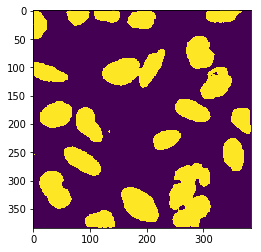

In [4]:
seed_ths = seed>255*0.9

plt.imshow(seed_ths)
plt.show()

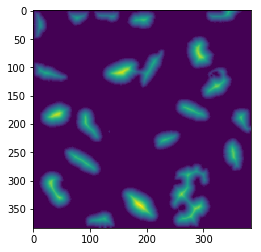

In [6]:
from scipy import ndimage as ndi

seed_ths = seed>255*0.9
plt.imshow(ndi.distance_transform_edt(seed_ths))
plt.show()

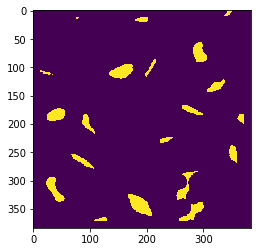

In [7]:
distance = ndi.distance_transform_edt(seed_ths)
plt.imshow(distance>0.5*distance.max())
plt.show()

In [8]:
markers = ndi.label(distance>0.5*distance.max())[0]

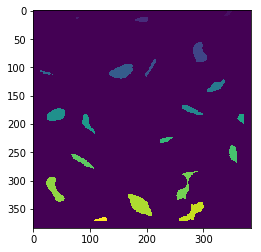

In [9]:
plt.imshow(markers)

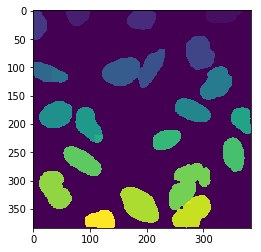

In [11]:
from skimage.morphology import watershed

mask_ths = mask>255*0.9
labels = watershed(-distance,
                   markers,
                   mask=mask_ths)

plt.imshow(labels)
plt.show()

In [27]:
from skimage.measure import label,regionprops
from scipy import ndimage as ndi

seed = 1 * (seed > 255 * 0.9)

seed_labels = label(seed)

# remove the background label and count seed objects
seeds = []
# ignore the background
for i in range(1,seed_labels.max()):
    seeds.append((seed_labels==i)*1)

# find nuclei centers by measuring mass center
seed_center_coords = [(ndi.measurements.center_of_mass(_) ) for _ in seeds]
seed_center_coords = [(int(_[0]),int(_[1])) for _ in seed_center_coords]

seed_centers = np.zeros((mask.shape[0], mask.shape[1]), dtype=bool)

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

In [50]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

In [58]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

In [60]:
markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

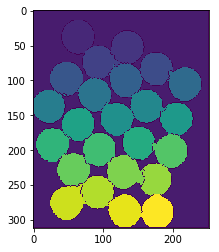

In [61]:
plt.imshow(markers)
plt.show()

In [23]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

[]

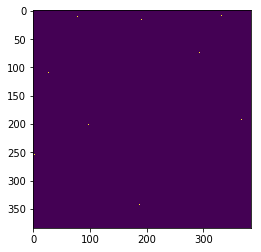

In [28]:
# create a mask with seed centers
for coord in seed_center_coords:
    seed_centers[coord[0],coord[1]] = True



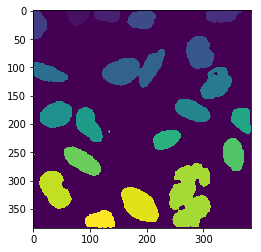

In [29]:
plt.imshow(seed_labels)
plt.show()

In [36]:
local_maxi = peak_local_max(distance,
                            indices=False, footprint=np.ones((10, 10)),
                            labels=image)
markers = ndi.label(local_maxi)[0]

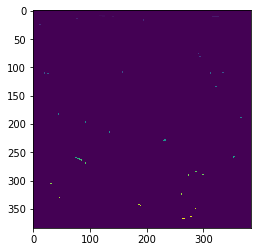

In [42]:
from skimage.morphology import dilation
plt.imshow(dilation(markers))
plt.show()

/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:118: UserWarning: Possible sign loss when converting negative image of type int64 to positive image of type uint8.
  .format(dtypeobj_in, dtypeobj_out))
/opt/conda/lib/python3.5/site-packages/skimage/util/dtype.py:171: UserWarning: Downcasting int64 to uint8 without scaling because max value 1 fits in uint8
  "value {} fits in {}".format(a.dtype, dtype, a.max(), dtype))


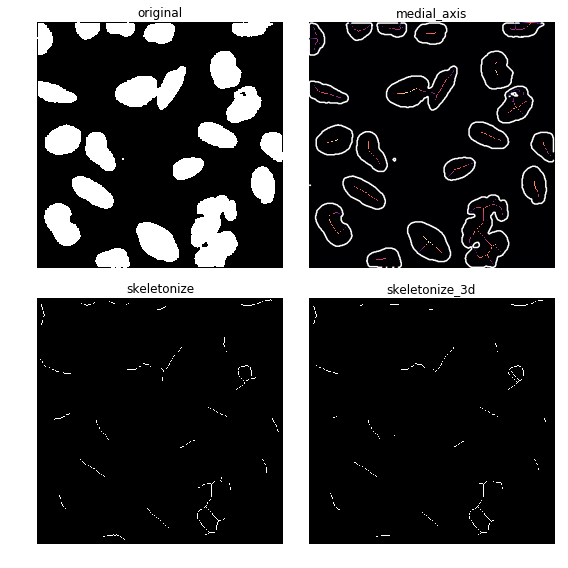

In [32]:
from skimage.morphology import medial_axis, skeletonize, skeletonize_3d
import matplotlib.pyplot as plt
from skimage.morphology import skeletonize, skeletonize_3d
from skimage.data import binary_blobs


# Generate the data
data = seed

# Compute the medial axis (skeleton) and the distance transform
skel, distance = medial_axis(data, return_distance=True)

# Compare with other skeletonization algorithms
skeleton = skeletonize(data)
skeleton3d = skeletonize_3d(data)

# Distance to the background for pixels of the skeleton
dist_on_skel = distance * skel

from skimage.util.colormap import magma

fig, axes = plt.subplots(2, 2, figsize=(8, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(data, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('original')
ax[0].axis('off')

ax[1].imshow(dist_on_skel, cmap=magma, interpolation='nearest')
ax[1].contour(data, [0.5], colors='w')
ax[1].set_title('medial_axis')
ax[1].axis('off')

ax[2].imshow(skeleton, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('skeletonize')
ax[2].axis('off')

ax[3].imshow(skeleton3d, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('skeletonize_3d')
ax[3].axis('off')

fig.tight_layout()
plt.show()

# OpenCV wt

In [1]:
def wt_seeds2(img = None,
             seed = None,
             threshold = 0.5):
    
    mask = (img>255*threshold) * 1

    mask = skimage.util.pad(array=mask,
                            pad_width=10,
                            mode='constant')

    seed = skimage.util.pad(array=seed,
                            pad_width=10,
                            mode='constant')

    ret, thresh = cv2.threshold(seed,0,255,cv2.THRESH_OTSU)

    # noise removal
    kernel = np.ones((3,3),np.uint8)
    opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
    # sure background area
    sure_bg = cv2.dilate(opening,kernel,iterations=3)

    # Finding sure foreground area
    dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)

    # adaptive hist for distance transform
    dist_transform = exposure.equalize_adapthist(((dist_transform / dist_transform.max()) * 255).astype('uint8'), clip_limit=0.03)

    ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

    # Finding unknown region
    sure_fg = np.uint8(sure_fg)
    unknown = cv2.subtract(sure_bg,sure_fg)

    # Marker labelling
    ret, markers = cv2.connectedComponents(sure_fg)

    distance = ndi.distance_transform_edt(mask)

    labels = watershed(-distance,
                       markers,
                       mask=mask)
    
    return labels[10:-10,10:-10]


In [45]:
from skimage.morphology import thin
import cv2
from skimage.segmentation import clear_border

In [75]:
def bench1(gt):
    _ = thin(gt,max_iter=1)
    _ = thin(gt,max_iter=3)
    _ = thin(gt,max_iter=5)
    return 1
    
def bench2(gt):
    kernel = np.ones((3,3),np.uint8)
    
    _ = cv2.erode(gt,kernel,iterations = 3)
    _ = cv2.erode(gt,kernel,iterations = 3)
    _ = cv2.erode(gt,kernel,iterations = 3)
    return 1

def bench3(gt):
    _ = remove_boundary(gt,1)
    _ = remove_boundary(gt,3)
    _ = remove_boundary(gt,5)
    return 1

In [1]:
import glob
from skimage.io import imread_collection

mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format('00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552'))
masks = imread_collection(mask_glob).concatenate()

import scipy.ndimage as ndi
import numpy as np
from skimage.draw import circle

nuclei_centers_coord = [(ndi.measurements.center_of_mass(_) ) for _ in masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)

for coord in nuclei_centers_coord: 
    rr, cc = circle(coord[0], coord[1], 2, mask.shape)
    nuclei_centers[rr, cc] = 1

In [7]:
import scipy.ndimage as ndi
import numpy as np
from skimage.draw import circle

nuclei_centers_coord = [(ndi.measurements.center_of_mass(_) ) for _ in masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)

for coord in nuclei_centers_coord: 
    rr, cc = circle(coord[0], coord[1], 2, mask.shape)
    nuclei_centers[rr, cc] = 1

NameError: name 'self' is not defined

In [27]:
from skimage.morphology import thin

def thin_region_fast(mask,
                    iterations):
    
    min_x, max_x = np.argwhere(mask > 0)[:,0].min(),np.argwhere(mask > 0)[:,0].max()
    min_y, max_y = np.argwhere(mask > 0)[:,1].min(),np.argwhere(mask > 0)[:,1].max()
   
    empty = np.zeros_like(mask)
    empty[min_x:max_x,min_y:max_y] = thin(mask[min_x:max_x,min_y:max_y],max_iter=iterations)
    
    return empty

In [129]:
thin_region_fast(masks[0],5).max()

1

In [126]:
%timeit thin_region_fast(masks[1],5)

820 µs ± 134 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


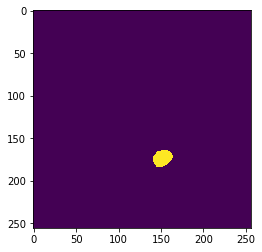

In [25]:
plt.imshow(masks[17])

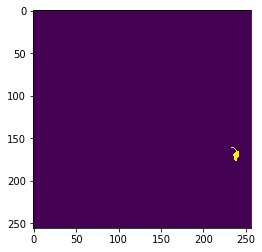

In [35]:
import numpy as np

plt.imshow(thin_region_fast(masks[9],7))

In [94]:
gt = masks[0]

In [103]:
gt = gt[229:237,122:132]

(229, 122)

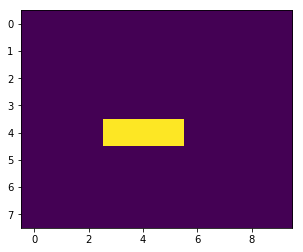

In [108]:
plt.imshow(thin(gt,max_iter=5))

In [90]:
masks.shape

(27, 256, 256)

In [56]:
gt = (gt/255).astype('uint8')

In [81]:
gt = gt>150

In [105]:
%timeit bench1(gt)

359 µs ± 11.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [247]:
%timeit bench2(gt)

229 µs ± 31.9 ns per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [248]:
%timeit bench3(gt)

31.3 ms ± 683 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


(-0.5, 383.5, 383.5, -0.5)

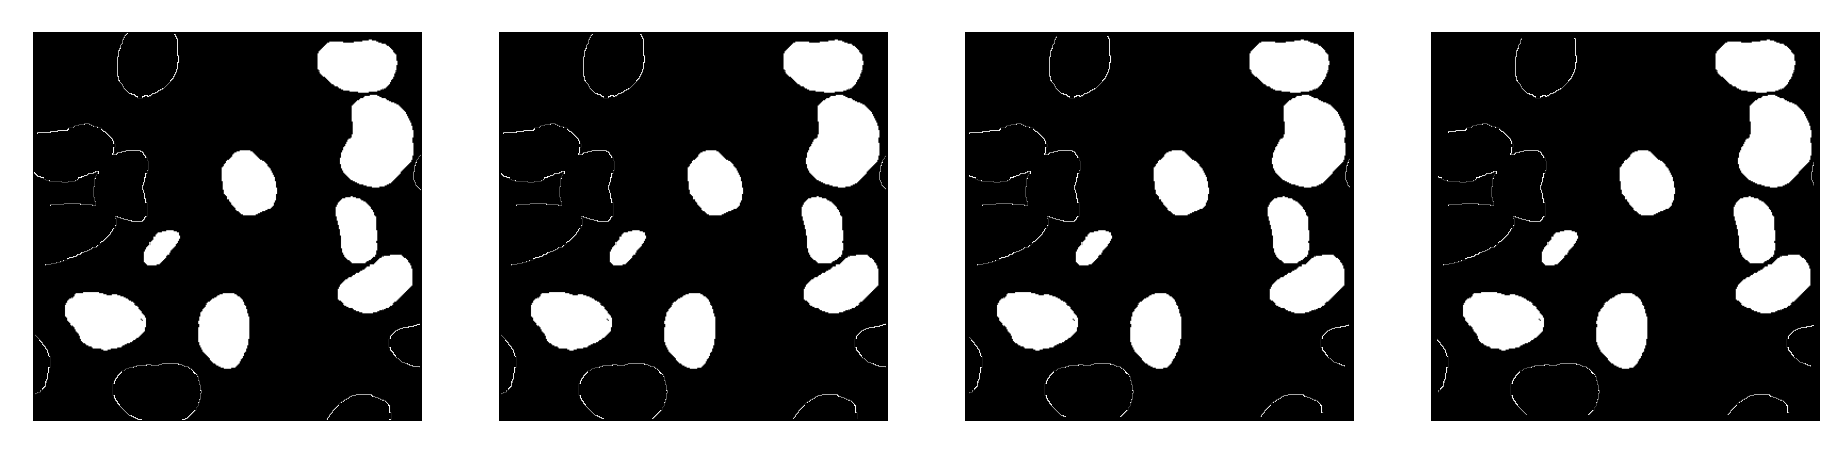

In [46]:
% matplotlib inline

kernel = np.ones((3,3),np.uint8)


fig, axes = plt.subplots(1, 4, figsize=(32, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(clear_border(gt,buffer_size  = 0), cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')

ax[1].imshow(clear_border(gt,buffer_size  = 1), cmap=plt.cm.gray, interpolation='nearest')
ax[1].axis('off')

ax[2].imshow(clear_border(gt,buffer_size  = 3), cmap=plt.cm.gray, interpolation='nearest')
ax[2].axis('off')

ax[3].imshow(clear_border(gt,buffer_size  = 5), cmap=plt.cm.gray, interpolation='nearest')
ax[3].axis('off')



In [256]:
gt.dtype

dtype('float64')

(-0.5, 255.5, 255.5, -0.5)

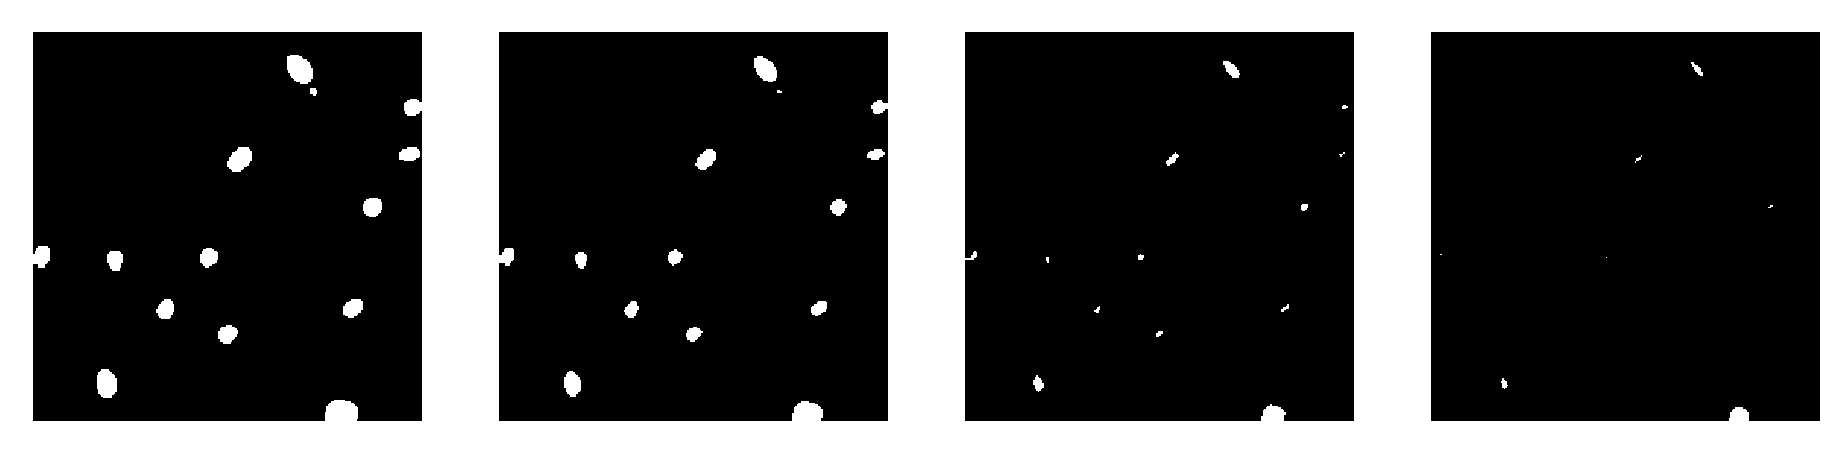

In [260]:
% matplotlib inline
gt = imread('gt2.png')
gt = gt/255

fig, axes = plt.subplots(1, 4, figsize=(32, 8), sharex=True, sharey=True)
ax = axes.ravel()


ax[0].imshow(gt, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')

kernel = np.ones((3,3),np.uint8)

ax[1].imshow(cv2.erode(gt,kernel,iterations = 1), cmap=plt.cm.gray, interpolation='nearest')
ax[1].axis('off')

ax[2].imshow(cv2.erode(gt,kernel,iterations = 3), cmap=plt.cm.gray, interpolation='nearest')
ax[2].axis('off')

ax[3].imshow(cv2.erode(gt,kernel,iterations = 4), cmap=plt.cm.gray, interpolation='nearest')
ax[3].axis('off')


In [229]:
(gt-remove_boundary(gt,5)).sum()

0

NameError: name 'remove_boundary' is not defined

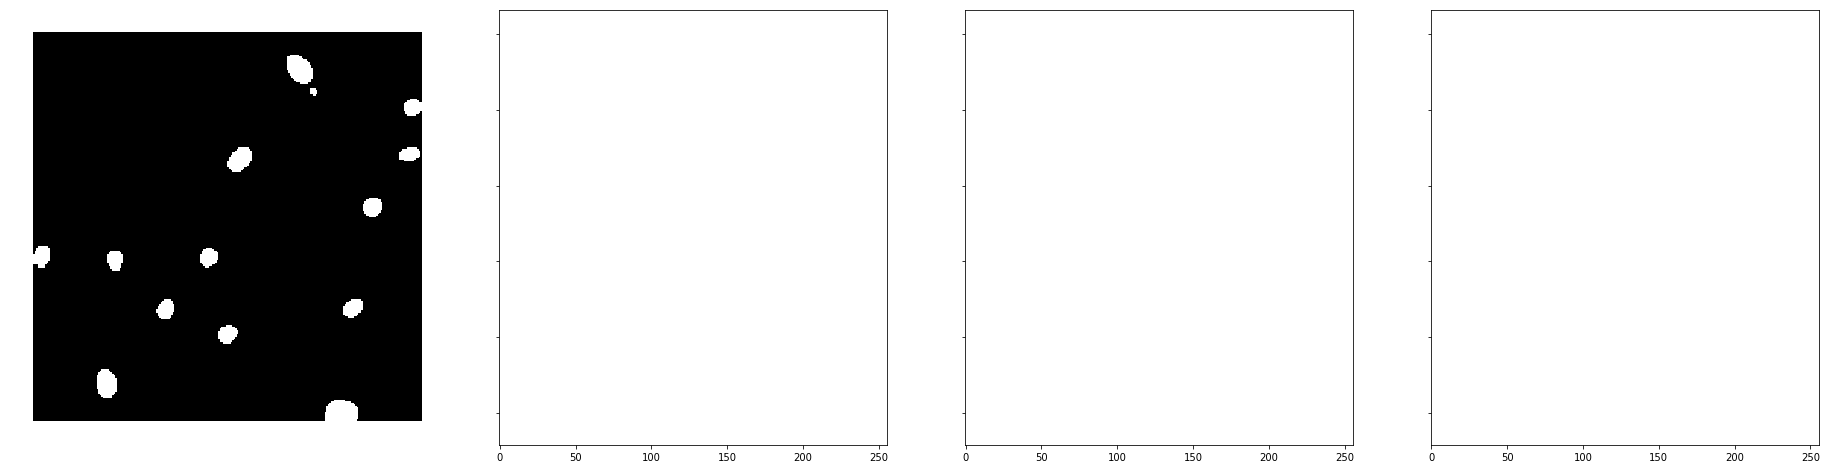

In [63]:
% matplotlib inline


fig, axes = plt.subplots(1, 4, figsize=(32, 8), sharex=True, sharey=True)
ax = axes.ravel()


ax[0].imshow(gt, cmap=plt.cm.gray, interpolation='nearest')
ax[0].axis('off')

ax[1].imshow(remove_boundary(gt,1), cmap=plt.cm.gray, interpolation='nearest')
ax[1].axis('off')

ax[2].imshow(remove_boundary(gt,3), cmap=plt.cm.gray, interpolation='nearest')
ax[2].axis('off')

ax[3].imshow(remove_boundary(gt,5), cmap=plt.cm.gray, interpolation='nearest')
ax[3].axis('off')


In [244]:
def remove_boundary(img,
                    boundary_width):
    image = np.copy(img)

    for i in (range(0,boundary_width)):
        image[find_boundaries(image,mode='inner')] = 0
        
    return image

In [243]:
remove_boundary(gt,).sum()

8432340

In [235]:
find_boundaries(gt,mode='outer').sum()

2432

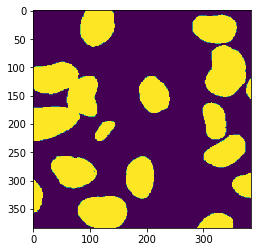

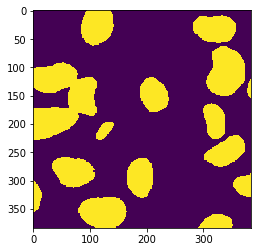

In [220]:
gt = imread('gt.png')
plt.imshow(gt)
plt.show()
gt[find_boundaries(gt,mode='outer')] = 0
gt[find_boundaries(gt,mode='outer')] = 0
gt[find_boundaries(gt,mode='outer')] = 0

plt.imshow(gt)
plt.show()

TypeError: Invalid dimensions for image data

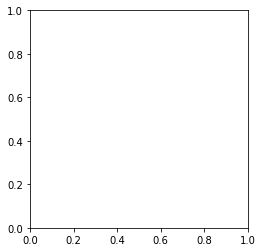

In [198]:
plt.imshow()

In [ ]:
find_boundaries(gt,mode='outer') * 255

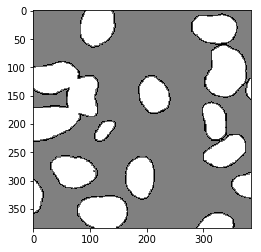

In [175]:
plt.imshow(gt-find_boundaries(gt,mode='outer') * 255, cmap=plt.cm.gray)

In [154]:
gt = gt / 255

11302976
10208670
10208670
10208670
10208670
10208670


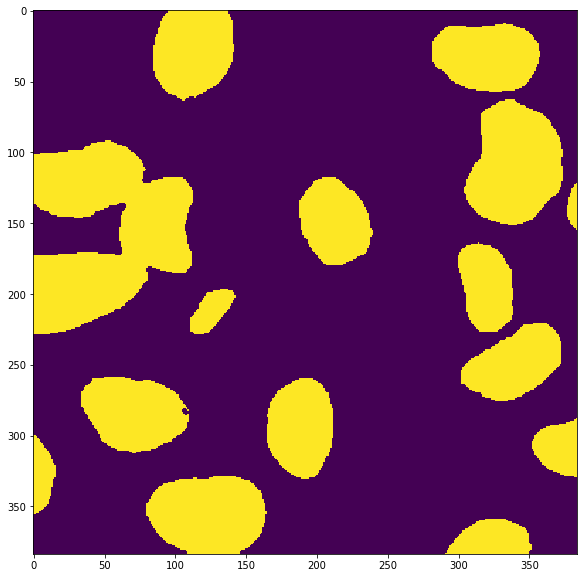

In [197]:
from skimage.segmentation import find_boundaries
gt = imread('gt.png')

plt.figure(figsize=(10, 10))
plt.imshow(remove_boundary(gt,5))

In [66]:
thin(gt,max_iter=1)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

(-0.5, 255.5, 255.5, -0.5)

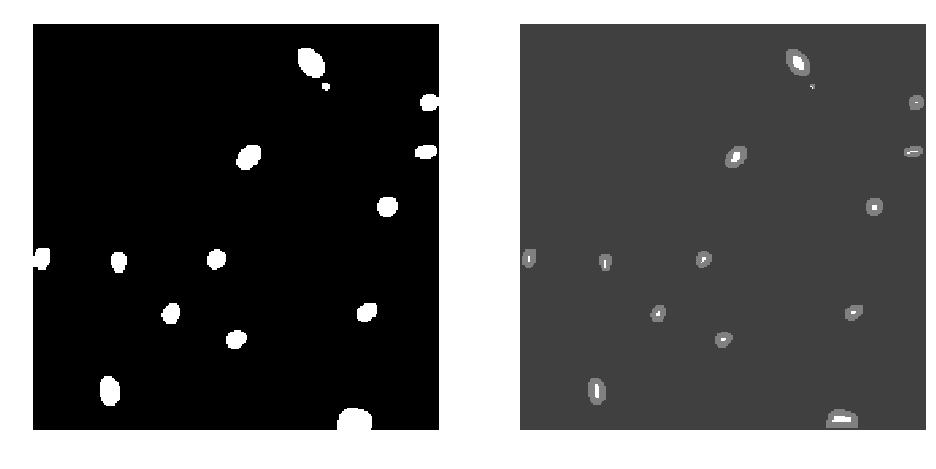

In [73]:
% matplotlib inline
from skimage.morphology import thin

gt = imread('gt2.png')

fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(gt,cmap=plt.cm.gray, )
ax[0].axis('off')

ax[1].imshow(thin(gt,max_iter=1), cmap=plt.cm.gray, interpolation='nearest', alpha=0.5)
ax[1].axis('off')

# ax[1].imshow(thin(gt,max_iter=3), cmap=plt.cm.gray, interpolation='nearest', alpha=0.5)
# ax[1].axis('off')

ax[1].imshow(thin(gt,max_iter=5),cmap=plt.cm.gray, interpolation='nearest', alpha=0.5)
ax[1].axis('off')



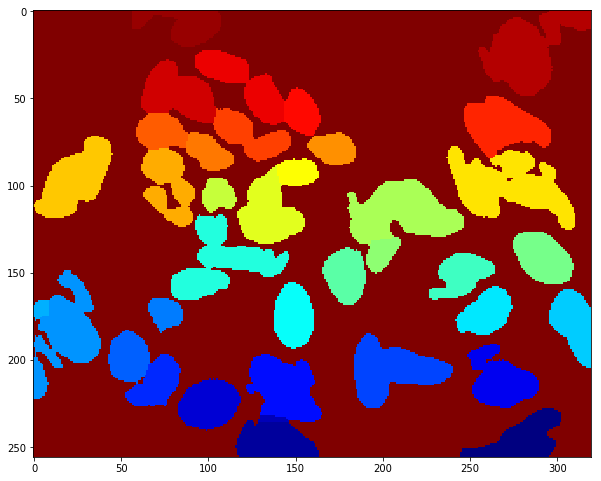

In [160]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import skimage
from skimage.io import imread
from skimage import exposure
from scipy import ndimage as ndi
from skimage.morphology import watershed

mask = imread('mask.png')
seed = imread('seed.png')
image = imread('image.png')
gt = imread('gt.png')

threshold = 0.5

labels =  wt_seeds2(img = mask,
             seed = seed,
             threshold = 0.7)


wt4 = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(wt4)
plt.show()

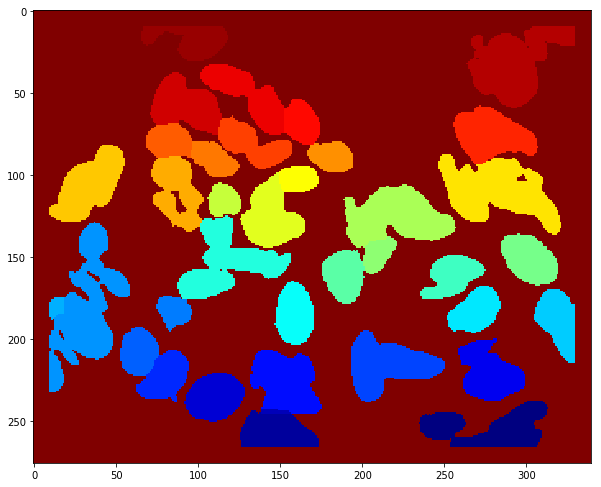

In [10]:
wt4 = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(wt4)
plt.show()

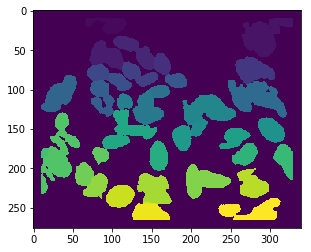

In [9]:
plt.imshow(labels)
plt.show()

In [292]:
mask.shape

(256, 320)

In [ ]:
mask

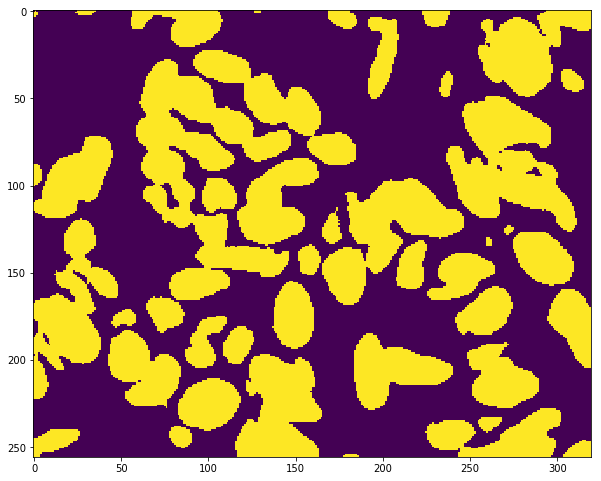

In [335]:
plt.figure(figsize=(10,10))
plt.imshow(seed>255*0.5)

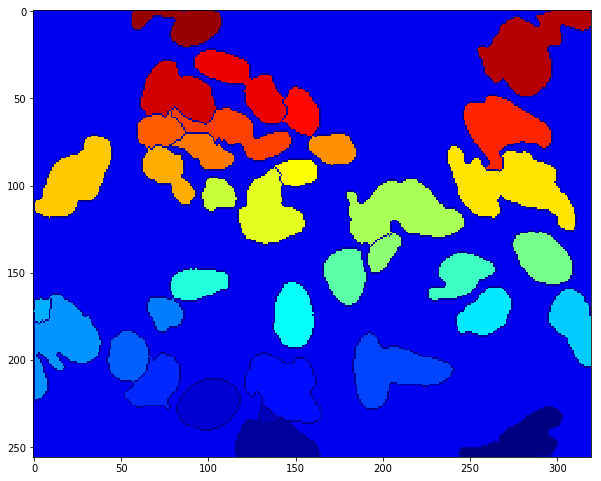

In [337]:
wt4 = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(wt4)
plt.show()

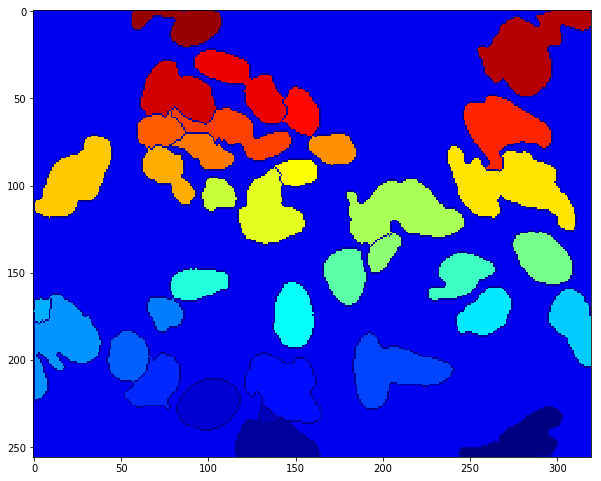

In [304]:
wt4 = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(wt4)
plt.show()

In [ ]:
markers[markers<2] = 

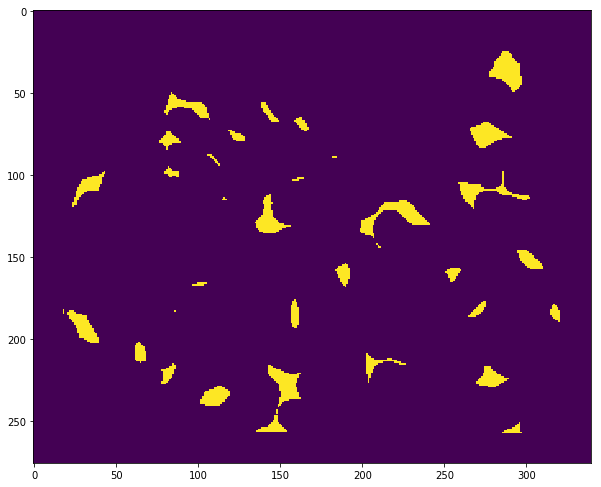

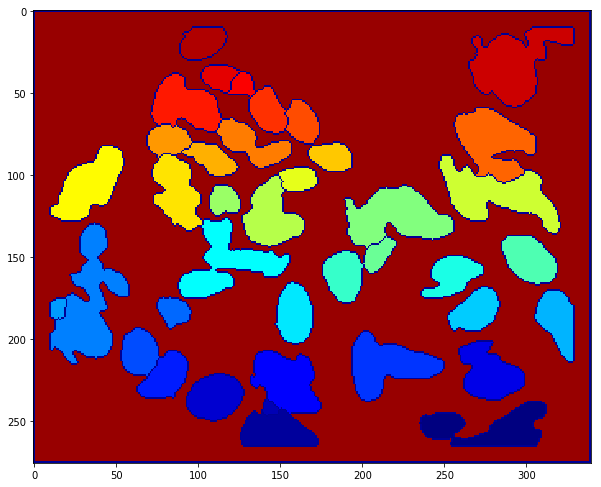

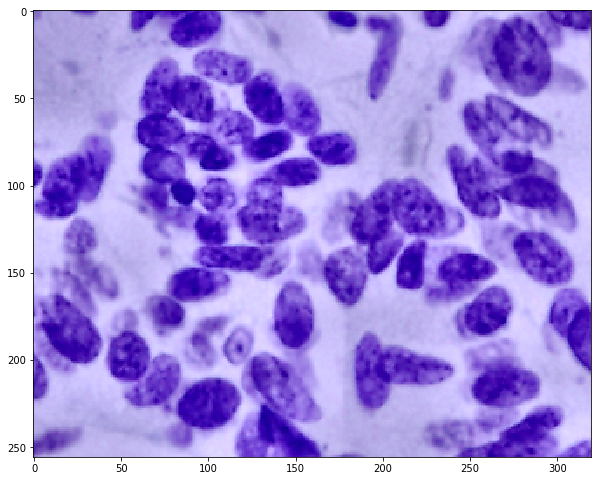

In [256]:
wt3 = cv2.applyColorMap((markers / markers.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(wt3)
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(image)
plt.show()


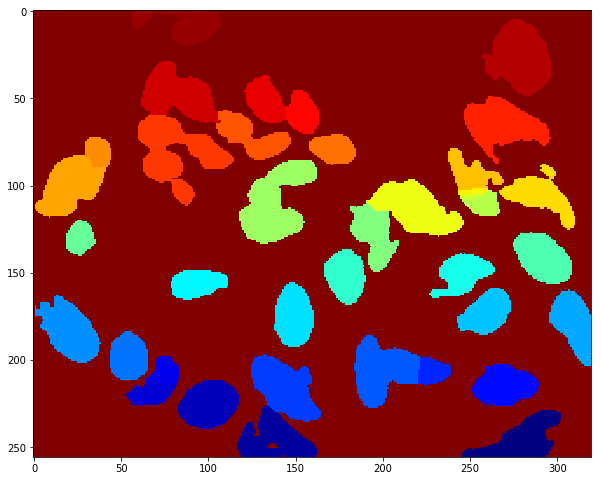

In [236]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
wt1 = wt_seeds2(mask,seed,0.9)
wt1 = cv2.applyColorMap((wt1 / wt1.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.imshow(wt1)
plt.show()

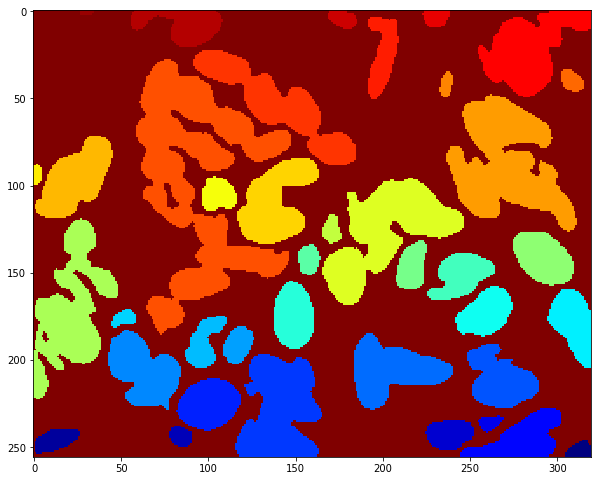

In [237]:
import cv2
from matplotlib import pyplot as plt

plt.figure(figsize=(10,10))
wt1 = wt_baseline(mask,0.9)
wt1 = cv2.applyColorMap((wt1 / wt1.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.imshow(wt1)
plt.show()

In [111]:
from skimage.morphology import watershed
from skimage.filters import sobel

labels = watershed(sobel(gray), markers)

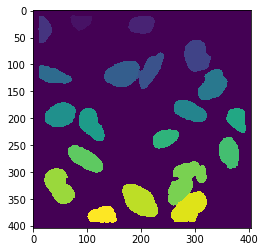

In [113]:
plt.imshow(labels)
plt.show()

In [ ]:
labels = watershed(-distance,
                   markers,
                   mask=img_mask)

error: /io/opencv/modules/imgproc/src/segmentation.cpp:161: error: (-215) src.type() == (((0) & ((1 << 3) - 1)) + (((3)-1) << 3)) && dst.type() == (((4) & ((1 << 3) - 1)) + (((1)-1) << 3)) in function watershed


In [177]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# sure background area
sure_bg = cv2.dilate(opening,kernel,iterations=3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)

# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
# Now, mark the region of unknown with zero
markers[unknown==255] = 0

markers = cv2.watershed(img,markers)
img[markers == -1] = [255,0,0]

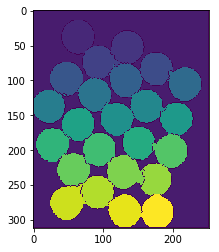

In [178]:
plt.imshow(markers)
plt.show()

# Wt for erosion masks

In [13]:
from skimage.io import imread
msk1 = imread('msk1.png')
msk2 = imread('msk2.png')
msk3 = imread('msk3.png')

In [18]:
np.asarray([msk1,msk2,msk3]).mean(axis=0).shape

(384, 384)

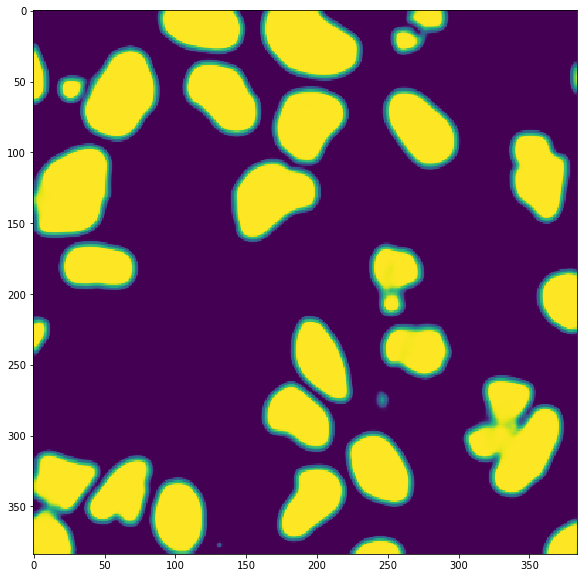

In [20]:
import matplotlib.pyplot as plt

energy = (msk1/255+msk2/255+msk3/255)/3*255
plt.figure(figsize=(10,10))
plt.imshow(energy)
plt.show()

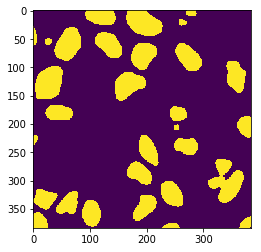

In [21]:
import matplotlib.pyplot as plt

plt.imshow(energy>255*0.9)
plt.show()

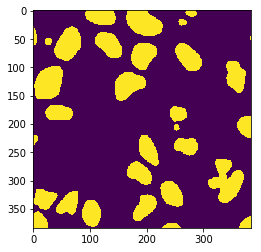

In [22]:
plt.imshow(msk3>255*0.5)
plt.show()

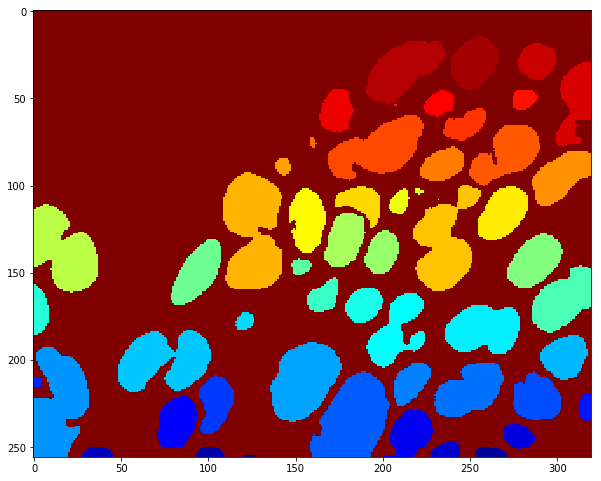

In [53]:
import numpy as np
import cv2

plt.figure(figsize=(10,10))
labels = label_baseline(msk1,0.5)
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
plt.imshow(labels)

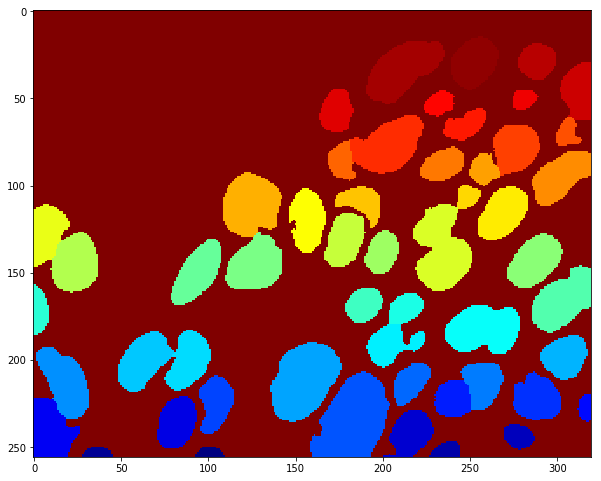

In [54]:
import numpy as np
import cv2
from scipy import ndimage as ndi
from skimage.morphology import watershed

plt.figure(figsize=(10,10))
labels = energy_baseline(msk1,msk3,0.5)
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
plt.imshow(labels)

In [35]:
label((np.copy(msk1)>255*0.5)*1)

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       [ 0,  0,  0, ...,  0,  0,  0],
       ...,
       [41, 41, 41, ...,  0,  0,  0],
       [41, 41, 41, ...,  0,  0,  0],
       [41, 41, 41, ...,  0,  0,  0]])

In [51]:
from skimage.measure import label

def label_baseline(msk1 =None,
                   threshold = 0.5):
    
    labels = (np.copy(img)>255*threshold)*1
    labels = label(labels)
    
    return labels

def energy_baseline(msk1 = None,
                    msk3 = None,
                    threshold = 0.5):

    msk1_ths = (np.copy(msk1)>255*threshold)*1
    msk3_ths = (np.copy(msk3)>255*threshold/2)*1

    distance = ndi.distance_transform_edt(msk1_ths)
    
    # Marker labelling
    markers = label(msk3_ths)    

    labels = watershed(-distance,
                       markers,
                       mask=msk1_ths)
    
    return labels


# Debug energy dataset

In [1]:
import torch

from utils.RAugs import *
from utils.BAugs import BAugs,BAugsVal,BAugsNoResize,BAugsValNoResize,BAugsNoResizeCrop
import pandas as pd
from utils.BDataset import BDatasetResize,BDatasetResizeSeed,BDatasetResizeSeedErode

train_df = pd.read_pickle('../data/train_df_stage1_meta')
train_df = train_df.reset_index()

test_df = pd.read_pickle('../data/test_df_stage1_meta')
test_df = test_df.reset_index()



train_augs = BAugsNoResizeCrop(prob=0.5,
                   mean=(0.485, 0.456, 0.406),
                   std=(0.229, 0.224, 0.225))    

val_augs = BAugsValNoResize(mean=(0.485, 0.456, 0.406),
                            std=(0.229, 0.224, 0.225))   

train_dataset = BDatasetResizeSeedErode(df = train_df,
                 transforms = val_augs,
                 fold_num = 0,
                 mode = 'train',
                 dset_resl = '520x696'  ,
                 is_distance_transform = True
                 )

train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=1,        
    shuffle=False,
    num_workers=1,
    pin_memory=False,
    drop_last=False)

Using imgaugs is False


In [9]:
len(train_dataset.val_idx)

84

In [4]:
input, target, or_resl, target_resl,img_sample = train_dataset.__getitem__(10)

NameError: name 'mask' is not defined

In [21]:
target[:,:,5].max()

1.0

In [10]:
for i,(a,b) in enumerate(zip([0,1,2,3],range(0,4))):
    print(i,a,b)

0 0 0
1 1 1
2 2 2
3 3 3


In [7]:
for a,b in zip([0,1,2,3],range(0,4)):
    print(a,b)

0 0
1 1
2 2
3 3


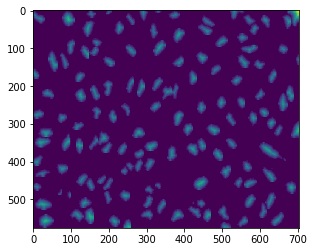

In [5]:
import matplotlib.pyplot as plt
plt.imshow(target[:,:,5])

In [3]:
target.shape

(256, 256, 6)

In [2]:
for i, (input, target, or_resl, target_resl,img_sample) in enumerate(train_loader):
    print(i)
    break

0


In [3]:
input.size()

torch.Size([1, 256, 256, 3])

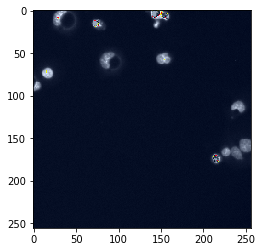

In [4]:
import matplotlib.pyplot as plt

img = input.cpu().numpy()[0]
img = (img - img.min()) / img.max()
plt.imshow(img)

In [5]:
target.size()

torch.Size([1, 256, 256, 5])

In [16]:
target.numpy()[0,:,:,0].max()

255

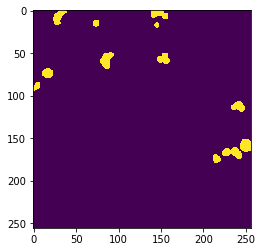

In [8]:
plt.imshow(target.numpy()[0,:,:,0])

# More experiments

In [6]:
from skimage.io import imread

energy = imread('energy.png')
mask = imread('mask.png')

In [1]:
import glob
import numpy as np

from scipy import ndimage as ndi
import cv2

import skimage
from skimage.morphology import square
from skimage.morphology import dilation
from skimage.morphology import watershed
from skimage.morphology import binary_erosion
from skimage.feature import peak_local_max
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from skimage.filters import sobel
from skimage.measure import label,regionprops
from skimage import exposure
from skimage.morphology import thin
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation
from skimage.morphology import disk
from skimage.feature import peak_local_max
from skimage.feature import blob_log

from scipy import ndimage as ndi

In [28]:
energy = imread('energy.png')
mask = imread('mask.png')

threshold = 0.5

msk_ths = (np.copy(mask)>255*threshold)*1
energy_ths = np.copy(energy)

distance = ndi.distance_transform_edt(msk_ths)

# add local maxima to markers as nuclei "centers"

energy[energy < 255 * energy_ths] = 0
energy = energy.astype('uint8')

regions = regionprops(label(msk_ths))

max_radius = 0
min_radius = 100

for props in regions:
    if props.equivalent_diameter/2 > max_radius:
        max_radius = props.equivalent_diameter/2
    if props.equivalent_diameter/2 < min_radius:
        min_radius = props.equivalent_diameter/2                

min_radius = max(min_radius,2)

blobs_log = blob_log(energy,
                     min_sigma=min_radius,
                     max_sigma=max_radius,
                     num_sigma=10,
                     threshold=.1)

markers = np.zeros_like(energy)

for blob in blobs_log:
    markers[int(blob[0]),int(blob[1])] = 1

markers = binary_dilation(markers, selem=disk(1))

# energy_ths = markers*255/7 + energy_ths*(6/7)
energy_ths = (energy_ths>255*0.45)*1  

# Marker labelling
markers = label(energy_ths)    

labels = watershed(-distance,
                   markers,
                   mask=msk_ths)

In [3]:
from utils.watershed import mixed_wt2

energy = imread('energy.png')
mask = imread('mask.png')

labels = mixed_wt2(mask,energy,0.5)

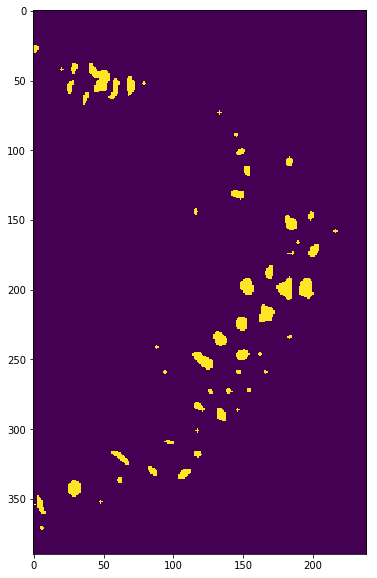

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(energy_ths)

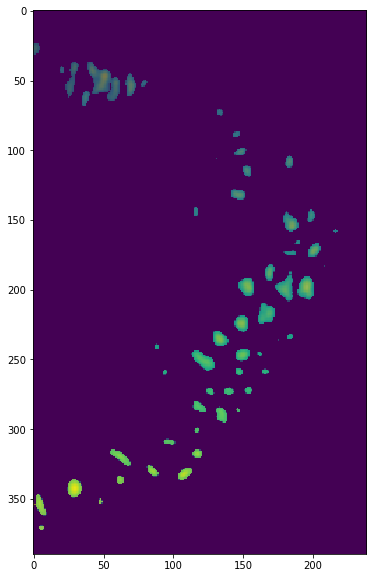

In [26]:
plt.figure(figsize=(10,10))
plt.imshow(energy)
plt.imshow(markers,alpha=0.5)

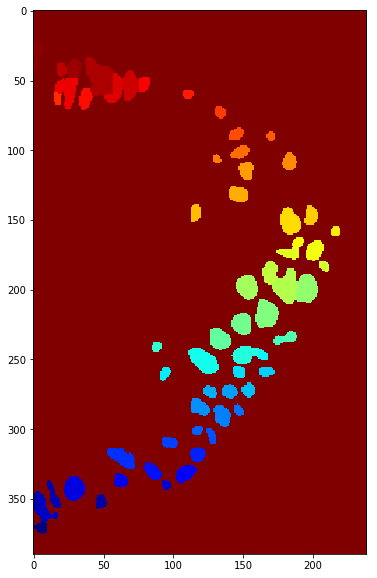

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
wt_mix2 = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
plt.imshow(wt_mix2)


In [43]:
def plot_img_and_hist(image, axes, bins=256):
    """Plot an image along with its histogram and cumulative histogram.

    """
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


Text(0.5,1,'Histogram equalization')

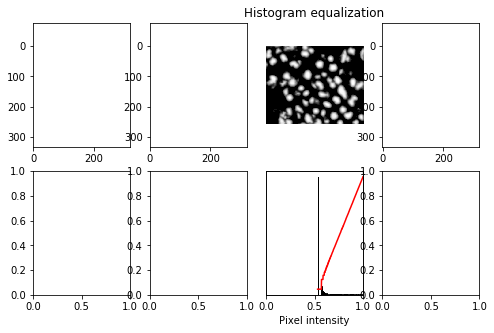

In [50]:
import numpy as np
from skimage import data, img_as_float
from skimage import exposure

fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)
    
ax_img, ax_hist, ax_cdf = plot_img_and_hist(energy_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

In [85]:
energy_eq.mean()

167.6697509765625

In [90]:
from skimage.filters import threshold_otsu

energy_ths = threshold_otsu(energy)

In [1]:
from skimage.segmentation import chan_vese

In [91]:
energy_ths

84

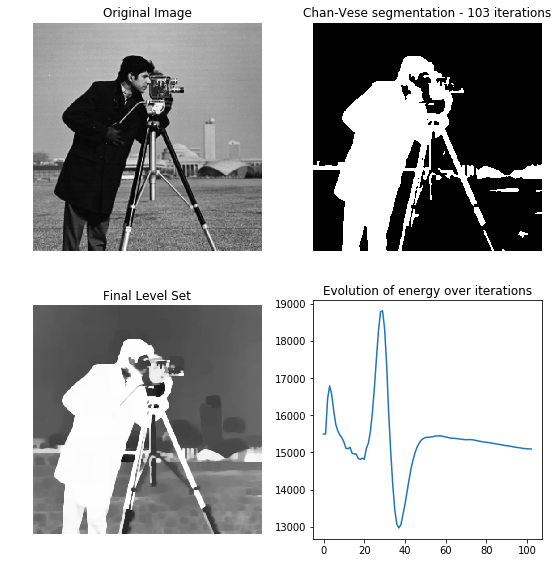

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

image = img_as_float(data.camera())
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(image, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(image, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

In [17]:
coordinates[0]

array([250, 242])

In [24]:
tuple(coord)

(250, 242)

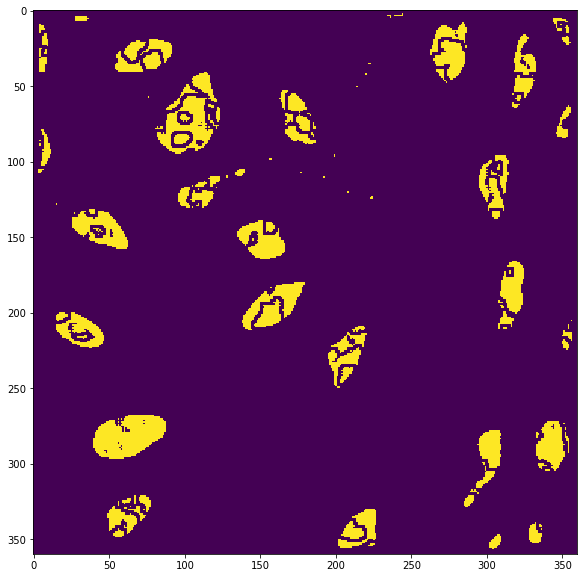

In [66]:
import cv2
from skimage.morphology import binary_dilation

markers = np.zeros_like(energy_ths)

for coord in coordinates:
    markers[coord[0],coord[1]] = 1

# markers = binary_dilation(markers, selem=disk(2)) 

plt.figure(figsize=(10,10))
plt.imshow(markers)

In [51]:
energy_ths

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [69]:
from skimage.measure import label
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.io import imread
import numpy as np
from skimage.morphology import binary_dilation
from skimage.morphology import disk

energy = imread('energy.png')
mask = imread('mask.png')
mask = cv2.resize(mask,(360,360))

energy_ths =  np.copy(energy)
energy_ths[energy_ths<255*0.4] = 0
# im = img_as_float(energy_ths)
coordinates = peak_local_max(energy_ths, min_distance=2)

markers = np.zeros_like(energy_ths)

for coord in coordinates:
    markers[coord[0],coord[1]] = 1

markers = binary_dilation(markers, selem=disk(1)) 
markers = label(markers)  

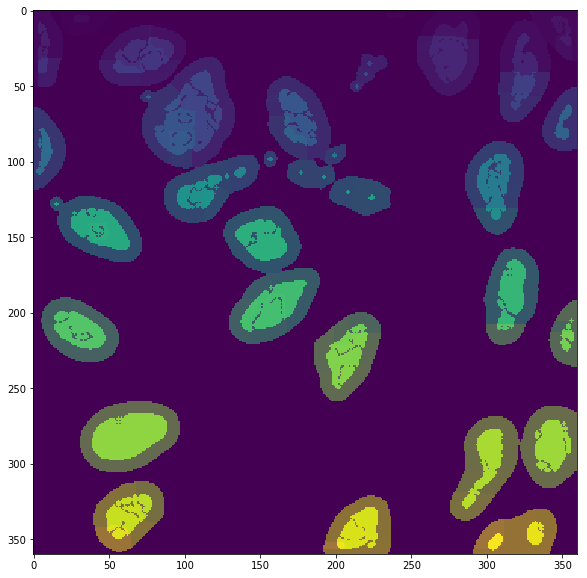

In [78]:
from skimage.morphology import watershed
import cv2

fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)

labels = energy_baseline_markers(mask,energy)
# labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
axes.imshow(labels)
axes.imshow(markers, alpha=0.5)

In [65]:
import glob
import numpy as np

from scipy import ndimage as ndi
import cv2

import skimage
from skimage.morphology import square
from skimage.morphology import dilation
from skimage.morphology import watershed
from skimage.morphology import binary_erosion
from skimage.feature import peak_local_max
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from skimage.filters import sobel
from skimage.measure import label,regionprops
from skimage import exposure
from skimage.morphology import thin
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation
from skimage.morphology import disk
from skimage.feature import peak_local_max

from scipy import ndimage as ndi3

In [63]:
msk_ths = (np.copy(mask)>255*0.5)*1
energy_ths = (np.copy(energy)>255*0.4)*1

distance = ndi.distance_transform_edt(msk_ths)

# Marker labelling
markers = label(energy_ths)    

labels = watershed(-distance,
                   markers,
                   mask=msk_ths)



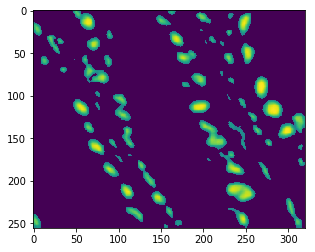

In [70]:
plt.imshow(energy_ths)

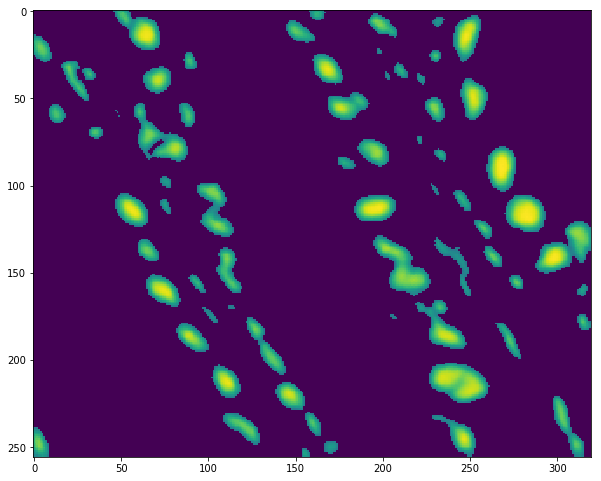

In [71]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
axes.imshow(energy_ths)

In [124]:
import math
import matplotlib.pyplot as plt
import numpy as np
from skimage.measure import label, regionprops

regions = regionprops(label((np.copy(mask)>255*0.5)*1))

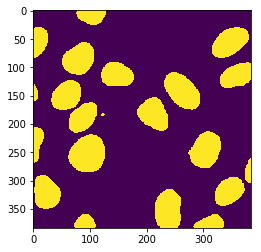

In [121]:
plt.imshow((np.copy(mask)>255*0.5)*1)

In [126]:
radius = 0
for props in regions:
    if props.equivalent_diameter/2 > radius:
        radius = props.equivalent_diameter/2
    

In [127]:
radius

32.747305332701664

In [80]:
for blob in blobs_log:
    print(blob)

[255.         156.           4.24264069]
[250.         170.           4.24264069]
[248.         311.           4.24264069]
[247.           0.           8.01387685]
[245.         246.           6.59966329]
[241.         124.           5.65685425]
[236.         160.           4.24264069]
[236.         117.           6.12825877]
[233.         232.           4.24264069]
[229.         302.           5.65685425]
[220.         147.           6.59966329]
[215.         251.           8.48528137]
[212.         110.           7.07106781]
[210.         236.           8.48528137]
[200.         137.           5.65685425]
[189.         273.           4.24264069]
[187.          90.           6.59966329]
[186.         236.           7.54247233]
[182.         127.           4.71404521]
[178.         315.           4.24264069]
[175.         206.           4.24264069]
[175.         102.           4.24264069]
[170.         222.           4.24264069]
[169.         233.           4.24264069]
[160.         31

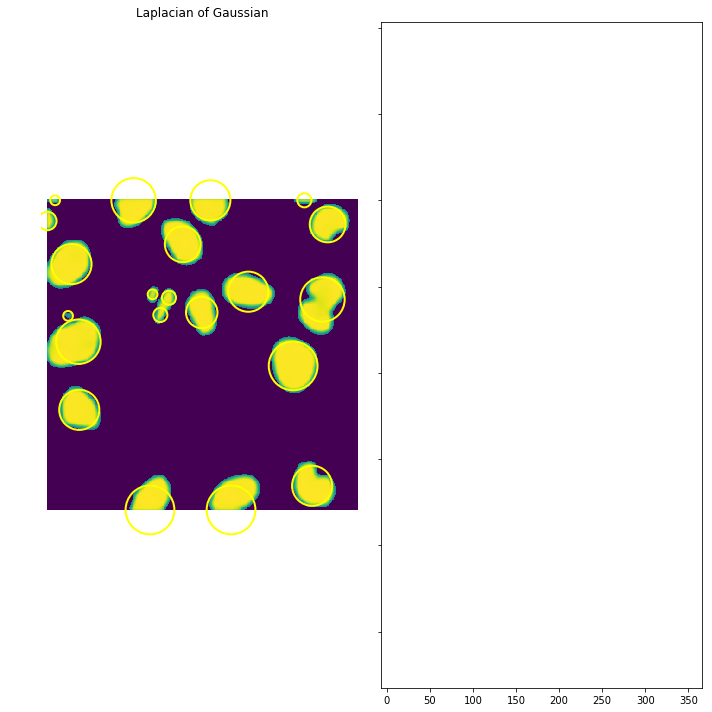

In [217]:
from math import sqrt
from skimage import data
from skimage.feature import blob_dog, blob_log, blob_doh
from skimage.color import rgb2gray

import matplotlib.pyplot as plt

energy_ths =  np.copy(energy)
energy_ths[energy_ths<255*0.4] = 0

image = energy_ths
image_gray = rgb2gray(image)

blobs_log = blob_log(image_gray, min_sigma=4, max_sigma=20, num_sigma=10, threshold=.1)

# Compute radii in the 3rd column.
blobs_log[:, 2] = blobs_log[:, 2] * sqrt(2)

blobs_list = [blobs_log]
colors = ['yellow']
titles = ['Laplacian of Gaussian']
sequence = zip(blobs_list, colors, titles)

fig, axes = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)
ax = axes.ravel()

for idx, (blobs, color, title) in enumerate(sequence):
    ax[idx].set_title(title)
    ax[idx].imshow(image, interpolation='nearest')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax[idx].add_patch(c)
    ax[idx].set_axis_off()

plt.tight_layout()
plt.show()

In [105]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 0
params.maxThreshold = 256

# Filter by Area.
params.filterByArea = True
params.minArea = 1

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.9

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

energy_ths = np.copy(energy)
energy_ths[energy_ths<255*0.4] = 0
# Detect blobs.
reversemask=255-energy_ths
keypoints = detector.detect(reversemask)

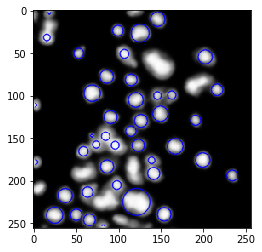

In [47]:
import cv2
import numpy as np
 
# Read image
im = energy
 
# Draw detected blobs as red circles.
# cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
im_with_keypoints = cv2.drawKeypoints(im, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
 
# Show keypoints
plt.imshow(im_with_keypoints)
plt.show()

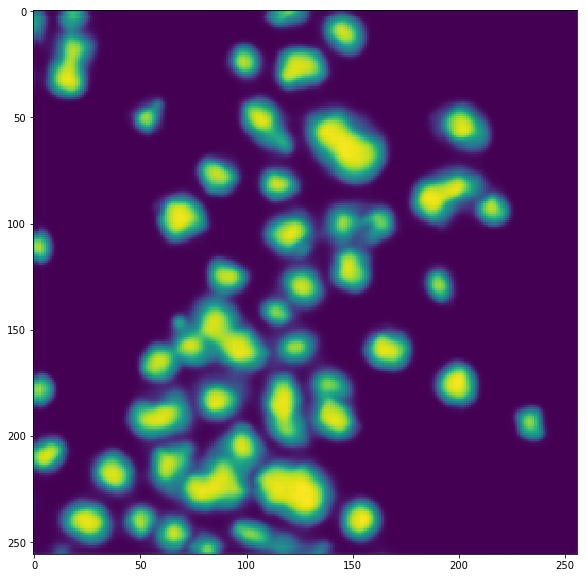

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)
axes.imshow(energy)

In [111]:
cv2.resize(energy,(360,360)).shape

(360, 360)

In [1]:
from skimage.io import imread

energy = imread('energy.png')
mask = imread('mask.png')

In [4]:
energy_ths =  np.copy(energy)
energy_ths[energy_ths < 255 * energy_ths] = 0

In [5]:
energy_ths.max()

255

In [6]:
def energy_baseline_blob(msk = None,
                    energy = None,
                    threshold = 0.5,
                    energy_ths = 0.4):

    msk_ths = (np.copy(msk)>255*threshold)*1
    
    regions = regionprops(label(msk_ths))
    
    max_radius = 0
    min_radius = 100
    
    for props in regions:
        if props.equivalent_diameter/2 > max_radius:
            max_radius = props.equivalent_diameter/2
        if props.equivalent_diameter/2 < min_radius:
            min_radius = props.equivalent_diameter/2                
    
    energy_ths =  np.copy(energy)
    energy_ths[energy_ths < 255 * energy_ths] = 0
                        
    min_radius = max(min_radius,5)        
        
    print(min_radius,max_radius)
    
    blobs_log = blob_log(energy_ths,
                         min_sigma=min_radius,
                         max_sigma=max_radius/1.5,
                         num_sigma=10,
                         threshold=.1)
    

    markers = np.zeros_like(energy_ths)
    

    for blob in blobs_log:
        markers[int(blob[0]),int(blob[1])] = 1

    # markers = binary_dilation(markers, selem=disk(1)) 
    markers = label(markers)  
    
   
    distance = ndi.distance_transform_edt(msk_ths)
    
    # Marker labelling 
    labels = watershed(-distance,
                       markers,
                       mask=msk_ths)
    return labels,markers


In [219]:
energy.shape

(360, 360)

In [227]:
labels

array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [225]:
labels,markers = energy_baseline_blob(msk=cv2.resize(mask,(360,360)),
                              energy=energy,
                              threshold=0.5,
                              energy_ths=0.4)

8.097643889049511 32.53275843762874


NameError: name 'markers' is not defined

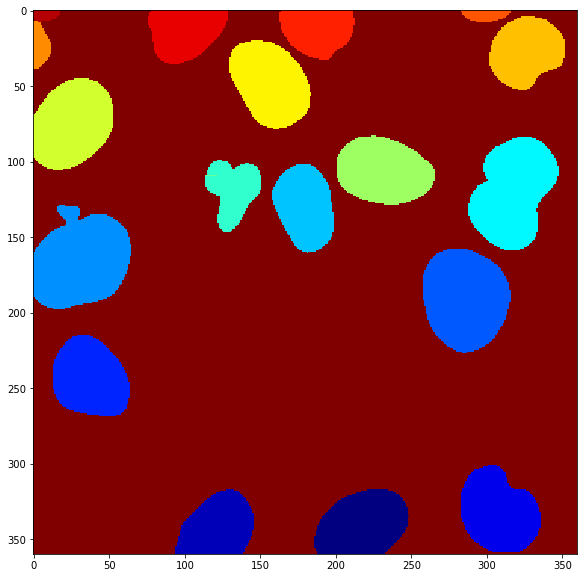

In [3]:
import numpy as np
from skimage.morphology import watershed
import cv2
from utils.watershed import energy_baseline_markers
from skimage.measure import label,regionprops
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage.feature import blob_log
from scipy import ndimage as ndi
from utils.watershed import energy_baseline_blob

fig, axes = plt.subplots(1, 1, figsize=(10, 10), sharex=True, sharey=True)

labels = energy_baseline_blob(cv2.resize(mask,(360,360)),energy,0.5,0.4)

labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
axes.imshow(labels)
axes.imshow(markers, alpha=0.5)
plt.show()

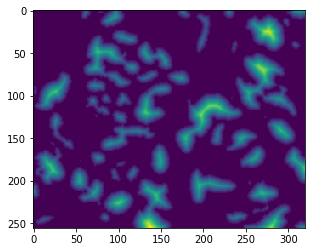

In [208]:
distance = ndi.distance_transform_edt(mask>255*0.7)
plt.imshow(distance)

In [178]:
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
axes.imshow(labels)
plt.show()

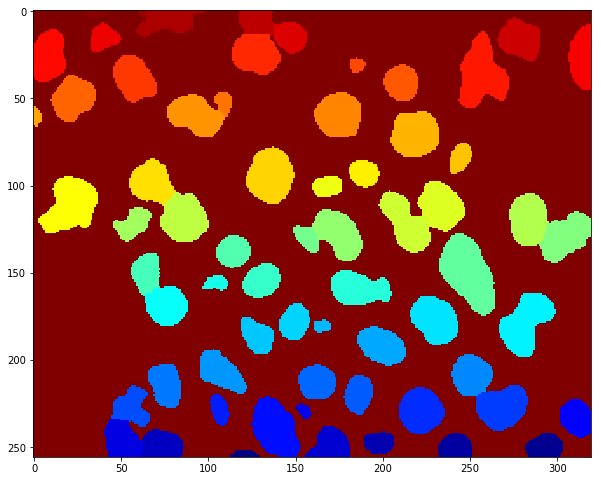

In [44]:
from skimage.morphology import watershed
import cv2
plt.figure(figsize=(10,10))

labels = energy_baseline(mask,energy)
labels = cv2.applyColorMap((labels / labels.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 
plt.imshow(labels)

In [96]:
test_img = imread('test_test.png')

In [98]:
test_img.max()

0

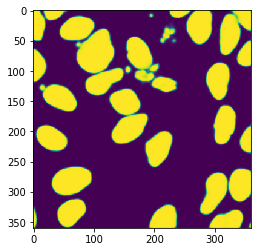

In [80]:
plt.imshow(mask)

In [83]:
distance = ndi.distance_transform_edt(mask)

In [94]:
mask.shape[0]

360

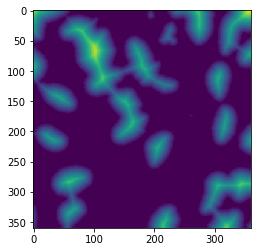

In [91]:
plt.imshow(distance/distance.max())

In [17]:
def energy_baseline(msk = None,
                    energy = None,
                    threshold = 0.5):

    msk_ths = (np.copy(msk)>255*threshold)*1
    energy_ths = (np.copy(energy)>255*0.4)*1

    distance = ndi.distance_transform_edt(msk_ths)
    
    # Marker labelling
    markers = label(energy_ths)    

    labels = watershed(-distance,
                       markers,
                       mask=msk_ths)
    
    return labels

In [42]:
def energy_baseline_markers(msk = None,
                    energy = None,
                    threshold = 0.5):

    msk_ths = (np.copy(msk)>255*threshold)*1
    
    energy_ths =  np.copy(energy)
    energy_ths[energy_ths<255*0.4] = 0
    coordinates = peak_local_max(energy_ths, min_distance=7)
    markers = np.zeros_like(energy_ths)

    for coord in coordinates:
        markers[coord[0],coord[1]] = 1

    markers = binary_dilation(markers, selem=disk(2)) 
    markers = label(markers)  

    distance = ndi.distance_transform_edt(msk_ths)
    
    # Marker labelling 
    labels = watershed(-distance,
                       markers,
                       mask=msk_ths)
    return labels

In [99]:
def distance_transform_fast(mask):
    
    min_x, max_x = np.argwhere(mask > 0)[:,0].min(),np.argwhere(mask > 0)[:,0].max()
    min_y, max_y = np.argwhere(mask > 0)[:,1].min(),np.argwhere(mask > 0)[:,1].max()
   
    empty = np.zeros_like(mask)
    try:
        empty[min_x:max_x,min_y:max_y] = ndimage.distance_transform_edt(mask[min_x:max_x,min_y:max_y])
        return empty
    except:
        return empty   

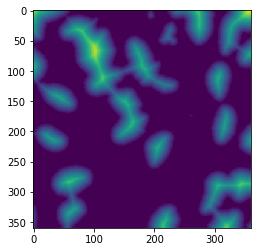

In [107]:
from scipy import ndimage
plt.imshow(ndimage.distance_transform_edt(mask))

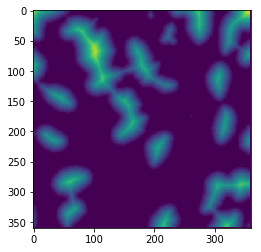

In [110]:
plt.imshow(distance_transform_fast(mask) / (mask.shape[0]**2 + mask.shape[1]**2)**0.5)

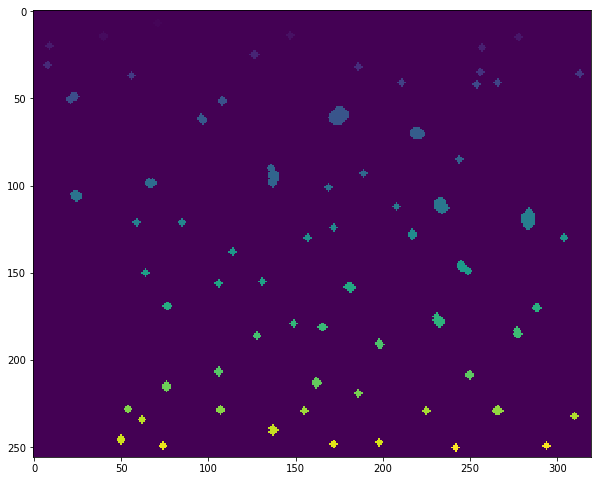

In [11]:
plt.figure(figsize=(10,10))
plt.imshow(markers)

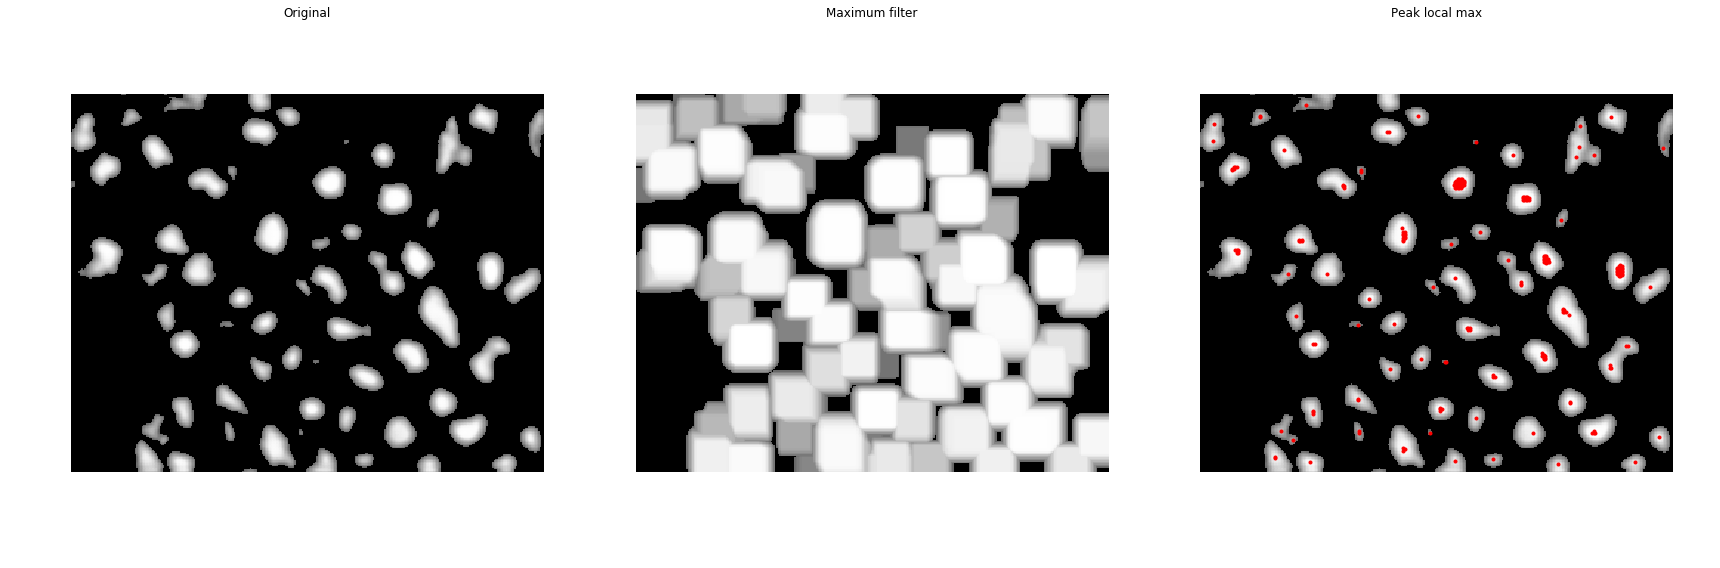

In [30]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

energy_ths =  np.copy(energy)
energy_ths[energy_ths<255*0.4] = 0
im = img_as_float(energy_ths)

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=5)

# display results
fig, axes = plt.subplots(1, 3, figsize=(24, 8), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')


fig.tight_layout()

plt.show()


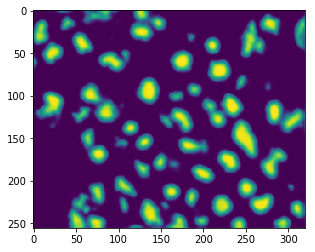

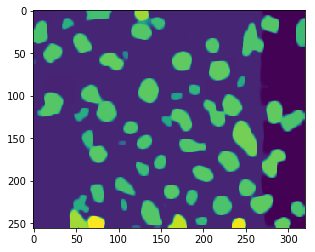

In [4]:
import matplotlib.pyplot as plt
from skimage.exposure import equalize_hist
from skimage.morphology import disk
from skimage.filters import rank


cv = chan_vese(energy, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_iter=200,
               dt=0.5, init_level_set="checkerboard", extended_output=True)


plt.imshow(energy)
plt.show()
plt.imshow(cv[1])
plt.show()

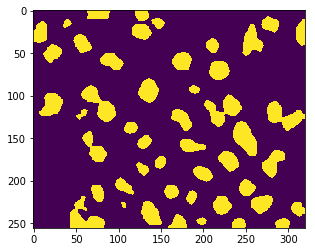

In [7]:
plt.imshow(cv[1]>0.55)

In [71]:
energy.std()/255

0.27766451827376043

In [72]:
0.16+0.27

0.43000000000000005

In [69]:
energy.mean()/255

0.16859973383884802

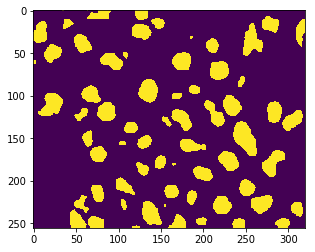

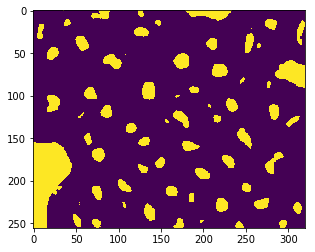

In [89]:
import matplotlib.pyplot as plt

plt.imshow(energy>255*0.4)
plt.show()
plt.imshow(energy_eq>255*0.9)
plt.show()

# Check preds

In [190]:
from skimage.morphology import opening,closing,disk
def clean_img(x):
    return opening(closing(x, disk(1)), disk(3))

In [1]:
import glob

g_mask = sorted(glob.glob('../examples/mask_*.png'))
g_energy = sorted(glob.glob('../examples/energy_*.png'))
g_labels = sorted(glob.glob('../examples/labels_*.png'))

g_imgs = glob.glob('../data/stage1_test/*/*/*')
g_img_ids = [(_.split('/')[-1].split('.')[0]) for _ in g_imgs]

In [2]:
len(g_imgs),len(g_mask),len(g_energy),len(g_labels)

(65, 65, 65, 65)

In [142]:
import cv2

gray = cv2.cvtColor(img[:, :, :3], cv2.COLOR_RGB2GRAY)
gray = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

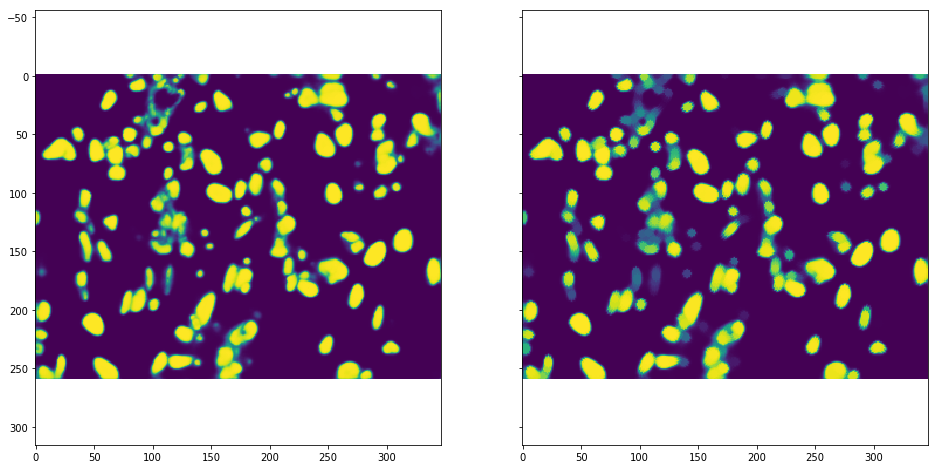

In [206]:
fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(mask)
ax[1].imshow(clean_img(mask))
ax[0].imshow(clean_img(mask),alpha=0.1)

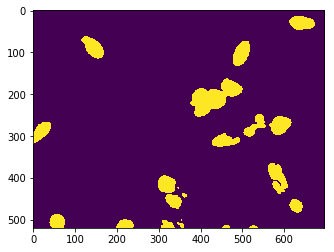

In [332]:
plt.imshow(mask>0.5*255)

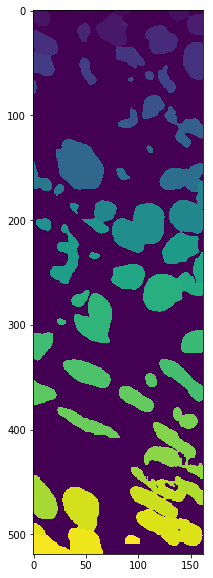

In [357]:
from utils.watershed import energy_baseline

lbls = energy_baseline(mask,energy,0.5)
# lbls = cv2.applyColorMap((lbls / lbls.max() * 255).astype('uint8'), cv2.COLORMAP_JET) 

plt.figure(figsize=(10,10))
plt.imshow(lbls)

In [306]:
import numpy as np
import matplotlib.pyplot as plt

from scipy.ndimage import gaussian_filter
from skimage import data
from skimage import img_as_float
from skimage.morphology import reconstruction

# Convert to float: Important for subtraction later which won't work with uint8
# image = img_as_float(data.coins())
image = energy
image = gaussian_filter(image, 1)

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(seed, mask, method='dilation')

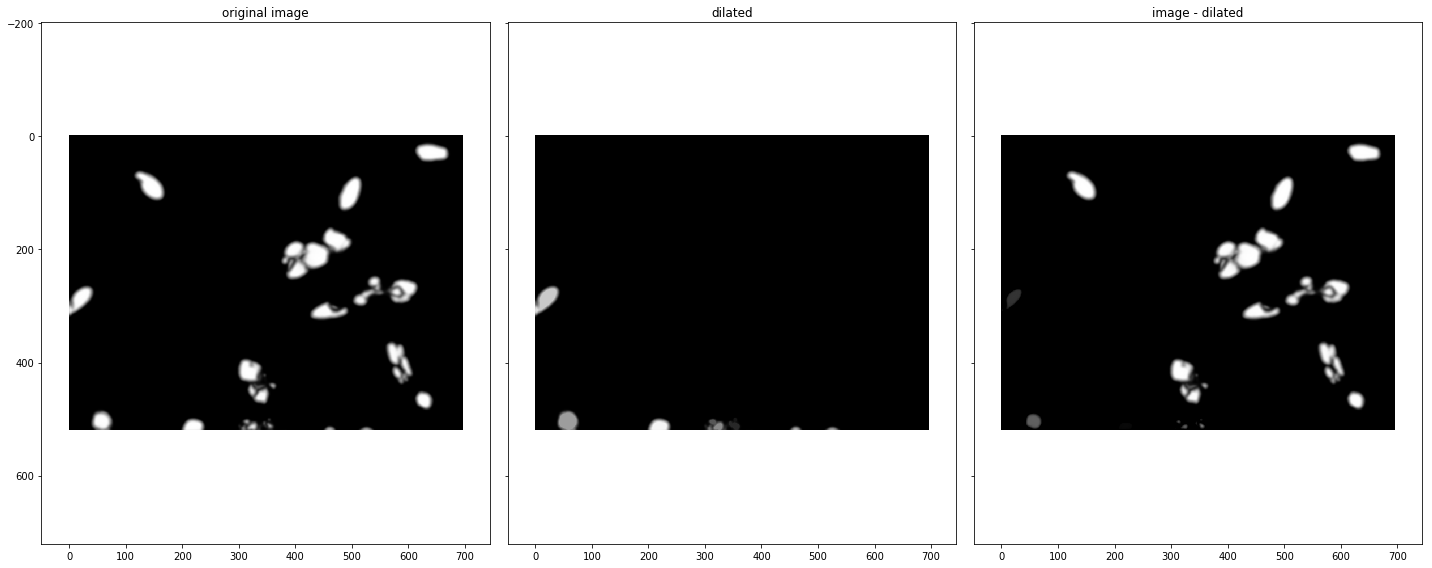

In [308]:
fig, (ax0, ax1, ax2) = plt.subplots(nrows=1,
                                    ncols=3,
                                    figsize=(20, 8),
                                    sharex=True,
                                    sharey=True)

ax0.imshow(image, cmap='gray')
ax0.set_title('original image')


ax1.imshow(dilated, vmin=image.min(), vmax=image.max(), cmap='gray')
ax1.set_title('dilated')


ax2.imshow(image - dilated, cmap='gray')
ax2.set_title('image - dilated')


fig.tight_layout()

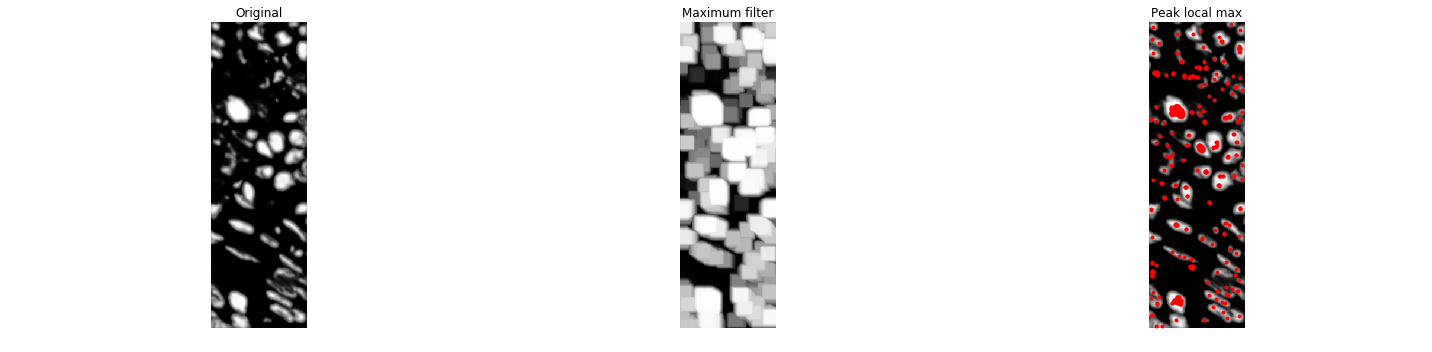

In [361]:
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.feature import peak_local_max
from skimage import data, img_as_float

im = energy

# image_max is the dilation of im with a 20*20 structuring element
# It is used within peak_local_max function
image_max = ndi.maximum_filter(im, size=20, mode='constant')

# Comparison between image_max and im to find the coordinates of local maxima
coordinates = peak_local_max(im, min_distance=3)

# display results
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharex=True, sharey=True)
ax = axes.ravel()
ax[0].imshow(im, cmap=plt.cm.gray)
ax[0].axis('off')
ax[0].set_title('Original')

ax[1].imshow(image_max, cmap=plt.cm.gray)
ax[1].axis('off')
ax[1].set_title('Maximum filter')

ax[2].imshow(im, cmap=plt.cm.gray)
ax[2].autoscale(False)
ax[2].plot(coordinates[:, 1], coordinates[:, 0], 'r.')
ax[2].axis('off')
ax[2].set_title('Peak local max')

fig.tight_layout()

plt.show()

In [373]:
import glob
import numpy as np

from scipy import ndimage as ndi
import cv2

import skimage
from skimage.morphology import square
from skimage.morphology import dilation
from skimage.morphology import watershed
from skimage.morphology import binary_erosion
from skimage.feature import peak_local_max
from skimage.io import imread,imread_collection
from skimage.segmentation import find_boundaries
from skimage.filters import sobel
from skimage.measure import label,regionprops
from skimage import exposure
from skimage.morphology import thin
from skimage.filters import threshold_otsu
from skimage.morphology import binary_dilation
from skimage.morphology import disk
from skimage.feature import peak_local_max

from scipy import ndimage as ndi

msk_ths = (np.copy(mask)>255*0.5)*1
energy_ths =  np.copy(energy)
energy_ths[energy_ths<255*0.1] = 0

coordinates = peak_local_max(energy_ths, min_distance=4)
markers = np.zeros_like(energy_ths)

for coord in coordinates:
    markers[coord[0],coord[1]] = 1

markers = binary_dilation(markers, selem=disk(1)) 
markers = label(markers)  

distance = ndi.distance_transform_edt(msk_ths)

# Marker labelling 
labels = watershed(-distance,
                   markers,
                   mask=msk_ths)


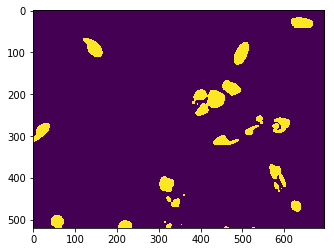

In [317]:
plt.imshow(np.copy(mask)>255*0.5)

In [374]:
labels.max()

59

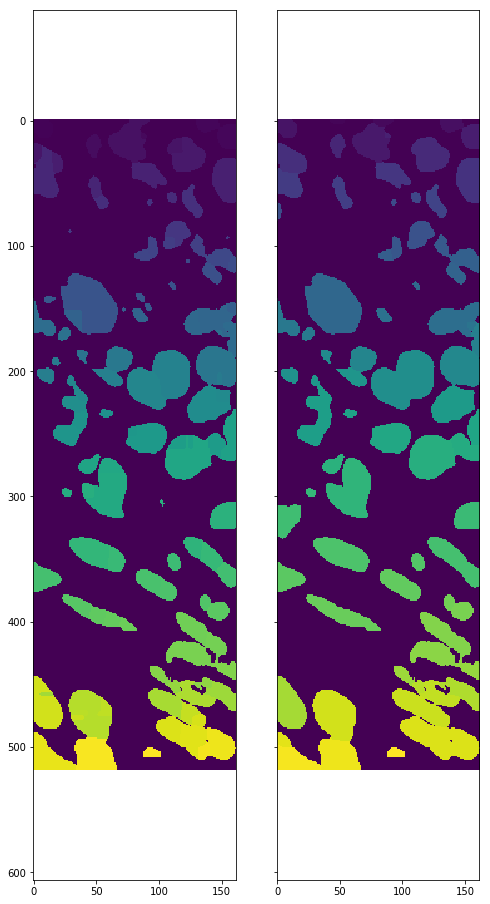

In [360]:
fig, axes = plt.subplots(1, 2, figsize=(8, 16), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(labels)
ax[1].imshow(lbls)



In [363]:
wt_areas = []

for j,label in enumerate(np.unique(lbls)):
    if j == 0:
        # pass the background
        pass
    else:
        wt_areas.append((lbls == label) * 1)

In [416]:
for i,label in enumerate(np.unique(lbls)):
    label = 25
    if i == 0:
        # pass the background
        pass
    else:
        current_label = (lbls==label) * 1
        thinned_label = thin(current_label,max_iter=1)
        lbls[lbls==label] = 0
        lbls[thinned_label] = label
        
        break

In [399]:
labels==label

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ...,
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]])

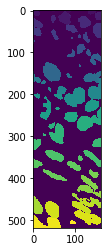

In [420]:
plt.imshow(lbls)

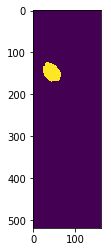

In [419]:
plt.imshow(thinned_label)

In [387]:
(labels==label).shape

(512, 640)

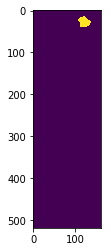

In [372]:
plt.imshow(thin(wt_areas[8],max_iter=1))

In [54]:
import glob

g_mask = sorted(glob.glob('../examples/mask_*.png'))
g_energy = sorted(glob.glob('../examples/energy_*.png'))
g_labels = sorted(glob.glob('../examples/labels_*.png'))

g_imgs = glob.glob('../data/stage1_test/*/*/*')
g_img_ids = [(_.split('/')[-1].split('.')[0]) for _ in g_imgs]

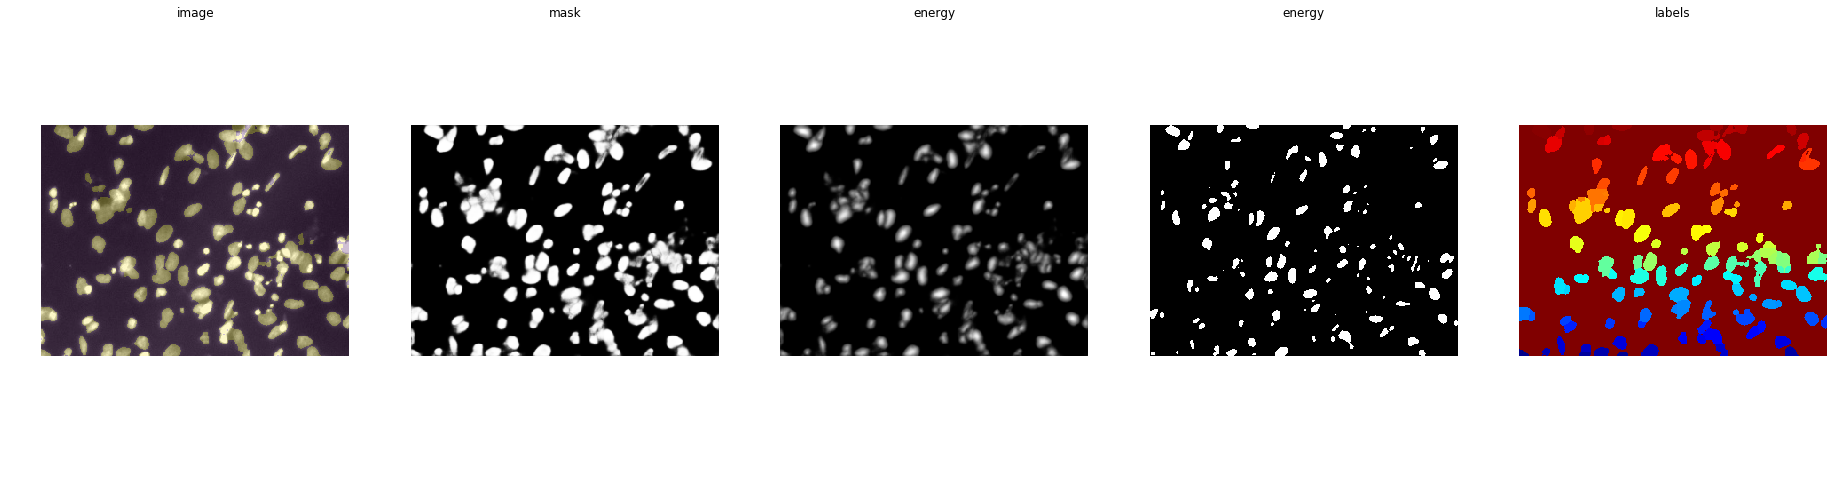

In [64]:
from skimage.io import imread
from skimage.morphology import thin
import matplotlib.pyplot as plt

idx = 30


# view results
labels = imread(g_labels[idx])
mask = imread(g_mask[idx])

energy = imread(g_energy[idx])
img = imread(g_imgs[g_img_ids.index(g_mask[idx].split('/')[-1].split('.png')[0].split('_')[1])])

fig, axes = plt.subplots(1, 5, figsize=(32, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('image')
ax[0].axis('off')

ax[0].imshow((mask>255*0.5), alpha=0.25)

ax[1].imshow(mask, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('mask')
ax[1].axis('off')

ax[2].imshow(energy, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('energy')
ax[2].axis('off')

ax[3].imshow(energy>255*0.4, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('energy')
ax[3].axis('off')

ax[4].imshow(labels)
ax[4].set_title('labels')
ax[4].axis('off')

plt.show()

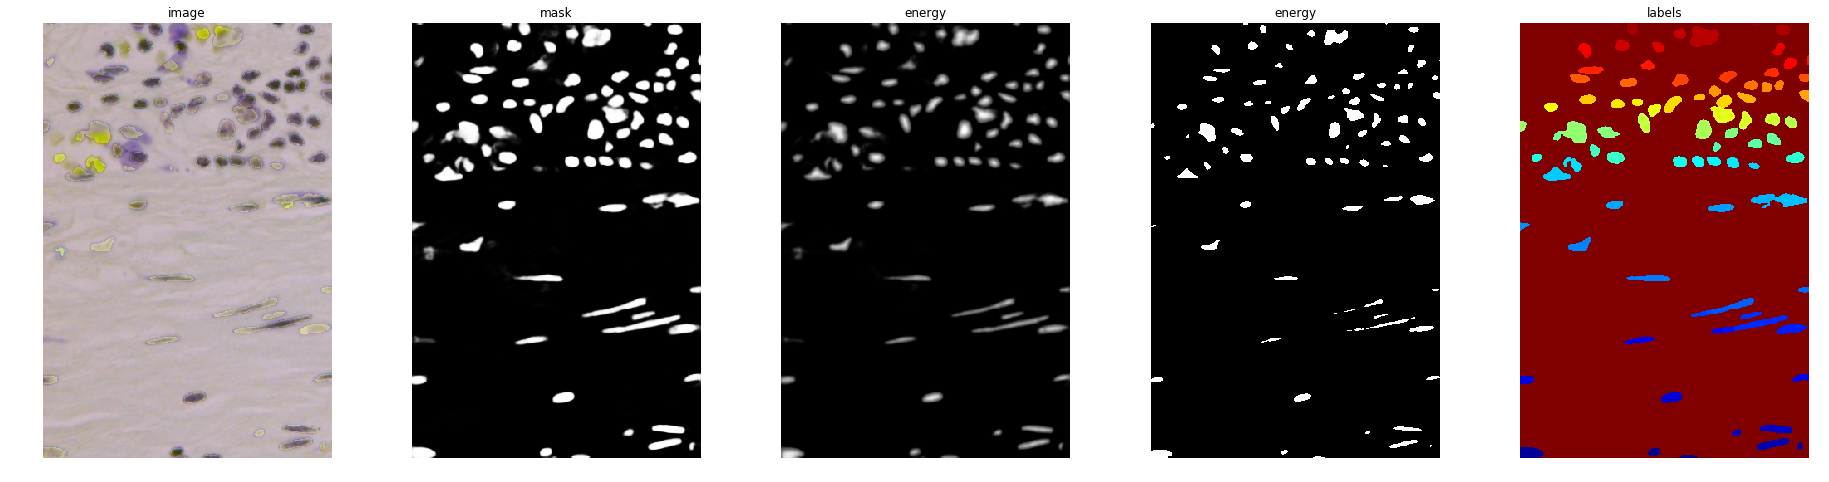

In [53]:
from skimage.io import imread
from skimage.morphology import thin
import matplotlib.pyplot as plt

idx = 51

# view results
labels = imread(g_labels[idx])
mask = imread(g_mask[idx])

energy = imread(g_energy[idx])
img = imread(g_imgs[g_img_ids.index(g_mask[idx].split('/')[-1].split('.png')[0].split('_')[1])])

fig, axes = plt.subplots(1, 5, figsize=(32, 8), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(img)
ax[0].set_title('image')
ax[0].axis('off')

ax[0].imshow((mask>255*0.5), alpha=0.25)

ax[1].imshow(mask, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('mask')
ax[1].axis('off')

ax[2].imshow(energy, cmap=plt.cm.gray, interpolation='nearest')
ax[2].set_title('energy')
ax[2].axis('off')

ax[3].imshow(energy>255*0.4, cmap=plt.cm.gray, interpolation='nearest')
ax[3].set_title('energy')
ax[3].axis('off')

ax[4].imshow(labels)
ax[4].set_title('labels')
ax[4].axis('off')

plt.show()

In [13]:
import glob
from skimage.io import imread_collection

mask_glob = glob.glob('../data/stage1_train/{}/masks/*.png'.format('00071198d059ba7f5914a526d124d28e6d010c92466da21d4a04cd5413362552'))
masks = imread_collection(mask_glob).concatenate()

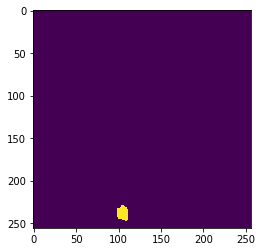

In [17]:
import matplotlib.pyplot as plt

plt.imshow(masks[2])

In [32]:
import scipy.ndimage as ndi
import numpy as np
from skimage.draw import circle
from skimage.morphology import binary_dilation

nuclei_centers_coord = [(ndi.measurements.center_of_mass(_) ) for _ in masks]
nuclei_centers_coord = [(int(_[0]),int(_[1])) for _ in nuclei_centers_coord]
nuclei_centers = np.zeros((masks.shape[1], masks.shape[2]), dtype=int)

for coord in nuclei_centers_coord: 
    nuclei_centers[coord[0],coord[1]] = 1
    
nuclei_centers = binary_dilation(nuclei_centers, selem=disk(1))
    

In [35]:
nuclei_centers * 1


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

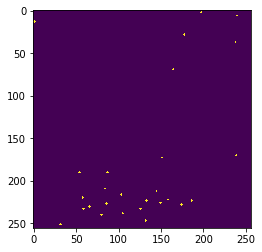

In [33]:
plt.imshow(nuclei_centers)

In [26]:
from skimage.morphology import disk
